# Desafio - Regressão
# Calculadora de Precificação de Imóveis

### Proposto por Marcus Oliveira da Silva (QuintoAndar)
### Resolução por Daniel Jullien

## Índice
* [Introdução](#introduction)
* [Metodologia](#methodology)
* [Aquisição de Dados](#data)
* [EDA](#EDA)
* [Modelo com interpretabilidade](#interpretabilidade)
* [Preprocessamento de Dados](#datacleaning)
* [Modelo preditivo](#preditivo)
* [Conclusão](#conclusão)
* [Referências](#references)

## 1. Introdução <a name="introduction"></a>

## 2. Metodologia<a name="methodology"></a>

## 3. Aquisição de Dados<a name="data"></a>

Importar bibliotecas que serão utilizadas e carregar base de dados.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Bibliotecas de estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import shapiro, skew
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bibliotecas de Pre Processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders.target_encoder import TargetEncoder

# Bibliotecas de Machine Learning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Feature importance
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df_raw = pd.read_csv('base.csv')
# df_raw = pd.read_csv("https://raw.githubusercontent.com/danieljullien/Precificacao-de-Imoveis_DesafioQuintoAndar/main/Database/base.csv")
df_raw.head()

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1            60         RL     65.0         8450  Pave  NaN       Reg   
1   2            20         RL     80.0         9600  Pave  NaN       Reg   
2   3            60         RL     68.0        11250  Pave  NaN       IR1   
3   4            70         RL     60.0         9550  Pave  NaN       IR1   
4   5            60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  \
0          1Fam          2Story          7         5           2003   
1          1Fam          1Story          6         8           1976   
2          1Fam          2Story          7         5           2001   
3          1Fam          2Story          7         5           1915   
4          1Fam          2Story          8         5           2000   

   AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0        2003       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1        1976       Gable         CompShg   MetalSd   MetalSd          None   
2        2002       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3        1970       Gable         CompShg   Wd Sdng   Wd Shng          None   
4        2000       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0        

In [3]:
df_raw.shape

(1460, 81)

Como visto, temos 79 features, um ID da casa e noso target PrecoVenda.

## 4. EDA <a name="EDA"></a>

A primeira etapa é realizar um EDA, buscando:
- Entender a distribuição da variável de interesse
- Verificar missing values
- Verificar a distribuição das variáveis explicativas e entender sua correlação com o preço de venda

Uma vez que temos muitas variáveis explicativas, uma função será criada para facilitar análise de forma automatizada.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

Vemos que a base de dados tem duas variáveis não traduzidas, portanto, corrigiremos o nome conforme encontrado no dicionário de dados.

Além disso, uma das variáveis tem o nome incorretamente escrito, que será corrigido.

In [5]:
df_raw.rename(columns={'BedroomAbvGr': 'Quartos', 
                       'KitchenAbvGr': 'Cozinha', 
                       'QualdiadeLareira':'QualidadeLareira'}, inplace=True)

#### Variável de interesse - Preço de Venda

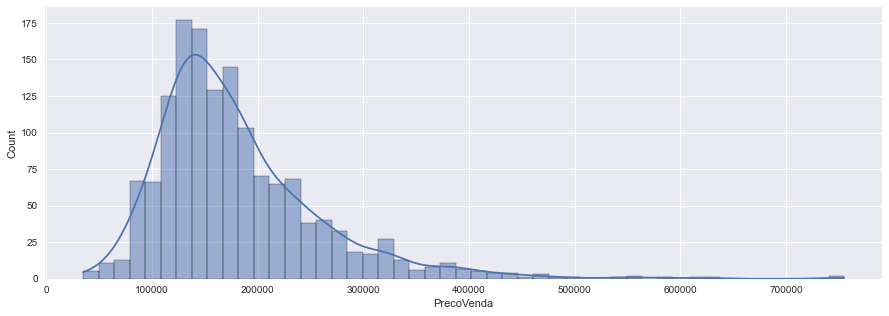

In [6]:
fig, eixo = plt.subplots(figsize=(15,5)) 
sns.histplot(df_raw,  x='PrecoVenda', kde=True)
plt.show()

In [7]:
df_raw['PrecoVenda'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: PrecoVenda, dtype: float64

Dado que ela tem uma distribuição 'highly skewed', pode ser interessante fazer a análise considerando o log da variável, de modo a ter uma distribuição com formato de sino (bell shaped), mais próxima à normal.

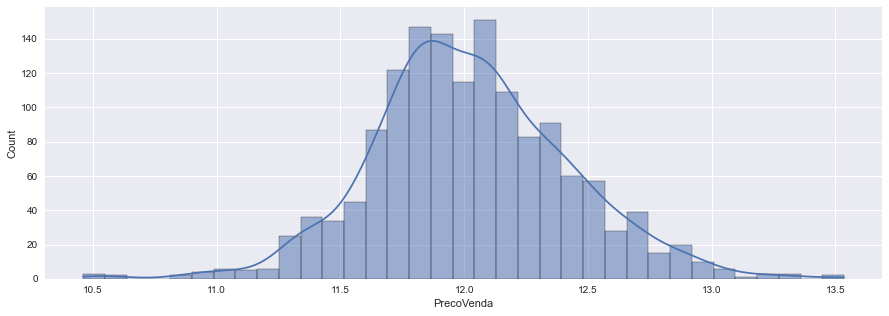

In [8]:
fig, eixo = plt.subplots(figsize=(15,5)) 
sns.histplot(np.log(df_raw['PrecoVenda']), kde=True)
plt.show()

Para uma rápida avaliação dos dados faltantes, utilizaremos uma função para listar as features, com sua quantidade e porcentagem de missing values.

In [9]:
def find_missing(data):
    '''
    Função para identificar e listar as variáveis com valores faltantes
    '''
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissing':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])), ignore_index=True)
        miss_df = miss_df[miss_df['PercentMissing']>0].sort_values('PercentMissing', ascending=False)
    return miss_df

In [10]:
find_missing(df_raw)

ColumnName  TotalMissing  PercentMissing
0     QualidadePiscina        1453.0           99.52
1               Outros        1406.0           96.30
2                 Beco        1369.0           93.77
3       QualidadeCerca        1179.0           80.75
4     QualidadeLareira         690.0           47.26
5              Fachada         259.0           17.74
8    AcabamentoGaragem          81.0            5.55
10        LocalGaragem          81.0            5.55
9           AnoGaragem          81.0            5.55
7      CondicaoGaragem          81.0            5.55
6     QualidadeGaragem          81.0            5.55
11      TipoAcabPorao2          38.0            2.60
12         ParedePorao          38.0            2.60
13         AlturaPorao          37.0            2.53
14       CondicaoPorao          37.0            2.53
15      TipoAcabPorao1          37.0            2.53
16       TipoAlvenaria           8.0            0.55
17       AreaAlvenaria           8.0            0.55
18  InstalacaoEletrica           1.0            0.07

Existem variáveis com uma enorme quantidade de dados faltando. Será necessário investigar na biblioteca dos dados se há alguma explicação para isso, uma vez que a ausência do dado por ser uma informação também. 

Antes, seguiremos com a análise exploratória.

In [11]:
df_raw.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99], include='all')

Id  ClasseImovel ClasseZona      Fachada    TamanhoLote  \
count   1460.000000   1460.000000       1460  1201.000000    1460.000000   
unique          NaN           NaN          5          NaN            NaN   
top             NaN           NaN         RL          NaN            NaN   
freq            NaN           NaN       1151          NaN            NaN   
mean     730.500000     56.897260        NaN    70.049958   10516.828082   
std      421.610009     42.300571        NaN    24.284752    9981.264932   
min        1.000000     20.000000        NaN    21.000000    1300.000000   
1%        15.590000     20.000000        NaN    21.000000    1680.000000   
5%        73.950000     20.000000        NaN    34.000000    3311.700000   
25%      365.750000     20.000000        NaN    59.000000    7553.500000   
50%      730.500000     50.000000        NaN    69.000000    9478.500000   
75%     1095.250000     70.000000        NaN    80.000000   11601.500000   
95%     1387.050000    160.000000        NaN   107.000000   17401.150000   
99%     1445.410000    190.000000        NaN   141.000000   37567.640000   
max     1460.000000    190.000000        NaN   313.000000  215245.000000   

         Rua  Beco FormaProp PlanoProp Servicos ConfigLote InclinacaoLote  \
count   1460    91      1460      1460     1460       1460           1460   
unique     2     2         4         4        2          5              3   
top     Pave  Grvl       Reg       Lvl   AllPub     Inside            Gtl   
freq    1454    50       925      1311     1459       1052           1382   
mean     NaN   NaN       NaN       NaN      NaN        NaN            NaN   
std      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
min      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
1%       NaN   NaN       NaN       NaN      NaN        NaN            NaN   
5%       NaN   NaN       NaN       NaN      NaN        NaN            NaN   
25%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
50%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
75%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
95%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
99%      NaN   NaN       NaN       NaN      NaN        NaN            NaN   
max      NaN   NaN       NaN       NaN      NaN        NaN            NaN   

       Bairro Estrada1 Estrada2 TipoHabitacao EstiloHabitacao    Qualidade  \
count    1460     1460     1460          1460            1460  1460.000000   
unique     25        9        8             5               8          NaN   
top     NAmes     Norm     Norm          1Fam          1Story          NaN   
freq      225     1260     1445          1220             726          NaN   
mean      NaN      NaN      NaN           NaN             NaN     6.099315   
std       NaN      NaN      NaN           NaN             NaN     1.382997   
min       NaN      NaN      NaN           NaN             NaN     1.000000   
1%        NaN      NaN      NaN           NaN             NaN     3.000000   
5%        NaN      NaN      NaN           NaN             NaN     4.000000   
25%       NaN      NaN      NaN           NaN             NaN     5.000000   
50%       NaN      NaN      NaN           NaN             NaN     6.000000   
75%       NaN      NaN      NaN           NaN             NaN     7.000000   
95%       NaN      NaN      NaN           NaN             NaN     8.000000   
99%       NaN      NaN      NaN           NaN             NaN    10.000000   
max       NaN      NaN      NaN           NaN             NaN    10.000000   

           Condicao  AnoConstrucao   AnoReforma TipoTelhado MaterialTelhado  \
count   1460.000000    1460.000000  1460.000000        1460            1460   
unique          NaN            NaN          NaN           6               8   
top             NaN            NaN          NaN       Gable         CompShg   
fr

Utilizarei listas separado as variáveis em categóricas nominais e ordinais, e numéricas discretas e contínuas, de modo a simplificar a plotagem de gráficos.

In [12]:
var_nominal = ['ClasseImovel', 'ClasseZona', 'Rua', 'Beco', 'PlanoProp', 'ConfigLote', 'Bairro', 'Estrada1', 'Estrada2', 
               'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 
               'TipoAlvenaria', 'TipoFundacao', 'Aquecimento', 'LocalGaragem', 'Outros', 'TipoVenda','MesVenda', 
               'CondicaoVenda']
              
var_ordinal = ['FormaProp', 'Servicos', 'InclinacaoLote', 'QualidadeCobertura', 'CondicaoExterna', 'AlturaPorao', 
               'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'QualidadeAquecimento', 'ArCentral',
               'QualidadeCozinha', 'Funcionalidade', 'QualidadeLareira', 'AcabamentoGaragem', 'QualidadeGaragem', 
               'CondicaoGaragem', 'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca', 'InstalacaoEletrica']

var_discreta = ['Qualidade', 'Condicao', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'Quartos', 'Cozinha', 
                'TotalQuartos', 'Lareira', 'CarrosGaragem', 'AnoVenda',  'ValorOutros']

var_continua = ['AnoConstrucao', 'AnoReforma', 'AnoGaragem',  'Fachada', 'TamanhoLote', 'AreaAlvenaria', 
                'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 
                'BaixaQualiAreaAcab', 'AreaConstruida', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 
                'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina'] 

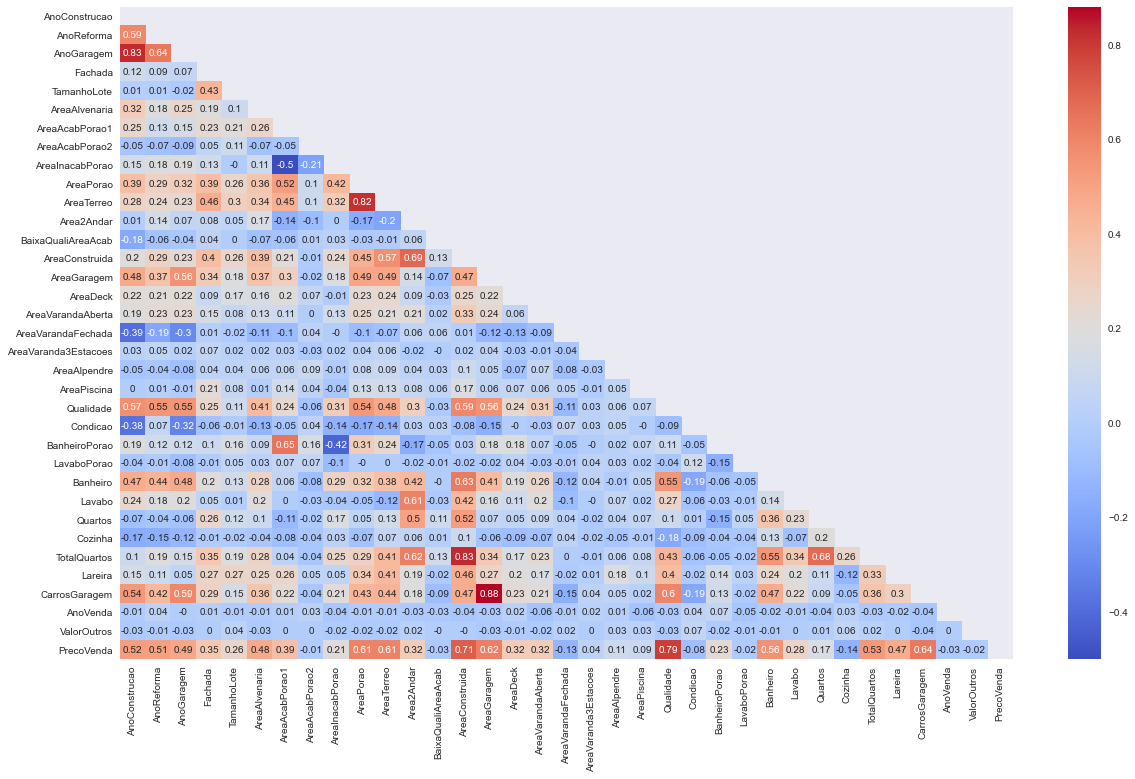

In [13]:
corr = df_raw[var_continua + var_discreta + ['PrecoVenda']].corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

É interessante observar que existem variáveis com alta correlação entre si, assim como com a variável de interesse. 

Para a regressão linear com propósito interpretativo, faremos uma seleção de variáveis que não apresentam forte correlação entre si. Vamos também ordernar abaixo as variáveis com maior correlação com o preço de venda.

In [14]:
corr['PrecoVenda'].sort_values(ascending=False)[1:]

Qualidade               0.79
AreaConstruida          0.71
CarrosGaragem           0.64
AreaGaragem             0.62
AreaPorao               0.61
AreaTerreo              0.61
Banheiro                0.56
TotalQuartos            0.53
AnoConstrucao           0.52
AnoReforma              0.51
AnoGaragem              0.49
AreaAlvenaria           0.48
Lareira                 0.47
AreaAcabPorao1          0.39
Fachada                 0.35
Area2Andar              0.32
AreaDeck                0.32
AreaVarandaAberta       0.32
Lavabo                  0.28
TamanhoLote             0.26
BanheiroPorao           0.23
AreaInacabPorao         0.21
Quartos                 0.17
AreaAlpendre            0.11
AreaPiscina             0.09
AreaVaranda3Estacoes    0.04
AreaAcabPorao2         -0.01
LavaboPorao            -0.02
ValorOutros            -0.02
AnoVenda               -0.03
BaixaQualiAreaAcab     -0.03
Condicao               -0.08
AreaVarandaFechada     -0.13
Cozinha                -0.14
Name: PrecoVen

In [15]:
def reg_hist_plot(dataframe, variavel_explicativa, target):
    '''
    Função para plotar um par de gráficos, que será utilizado para avaliar variáveis contínuas.
    O primeiro é um scatterplot com a linha de regressão/tendência entre a variável explicativa e o target selecionado.
    O segundo é um histograma com a distribuição da variável explicativa.
    '''
    
    fig, eixo = plt.subplots(1,2,figsize=(20,5)) 

    sns.regplot(data = dataframe, ax=eixo[0], x = variavel_explicativa, y = target)
    eixo[0].set_title('{} vs {}'.format(variavel_explicativa, target))
    
    sns.histplot(data = dataframe, ax=eixo[1], x=variavel_explicativa, kde=True)
    eixo[1].set_ylabel('Contagem')
    eixo[1].set_title('Distribuição da varável explicativa {}'.format(variavel_explicativa))
    
    plt.tight_layout()
    plt.show()
    
def box_hist_plot(dataframe, variavel_explicativa, target):
    '''
    Função para plotar um par de gráficos, que será usado para avaliar variáveis discretas.
    O primeiro é um boxplot entre a variável explicativa e o target selecionado.
    O segundo é um histograma com a distribuição da variável explicativa.
    '''
    
    fig, eixo = plt.subplots(1,2,figsize=(20,5)) 

    sns.boxplot(data = dataframe, ax=eixo[0], x = variavel_explicativa, y = target)
    eixo[0].set_title('{} vs {}'.format(variavel_explicativa, target))
    
    sns.histplot(data = dataframe, ax=eixo[1], x=variavel_explicativa, kde=True)
    eixo[1].set_ylabel('Contagem')
    eixo[1].set_title('Distribuição da varável explicativa {}'.format(variavel_explicativa))
    
    plt.tight_layout()
    plt.show()   

def box_count_plot(dataframe, variavel_explicativa, target):
    '''
    Função para plotar um par de gráficos, que será usado para avaliar variáveis nominais e ordinais.
    O primeiro é um boxplot entre a variável explicativa e o target selecionado.
    O segundo é um countplot da variável explicativa.
    '''
    
    fig, eixo = plt.subplots(1,2,figsize=(20,5)) 

    sns.boxplot(data = dataframe, ax=eixo[0], x = variavel_explicativa, y = target)
    eixo[0].set_title('{} vs {}'.format(variavel_explicativa, target))
    
    sns.countplot(data = dataframe, ax=eixo[1], x=variavel_explicativa)
    eixo[1].set_ylabel('Contagem')
    eixo[1].set_title('Distribuição da varável explicativa {}'.format(variavel_explicativa))
    
    plt.tight_layout()
    plt.show()

Finalmente, iremos plotar um par de gráficos para cada variável explicativo, mostrando sua distribuição (através de um histograma para variáveis numéricas ou um gráfico de barras de contagem para variáveis categóricas), assim como um gráfico demonstrando a relação entre a variável explicativa e o preço de venda (sendo um gráfico de dispersão no caso de numérico contínuo, e um boxplot para os demais casos).

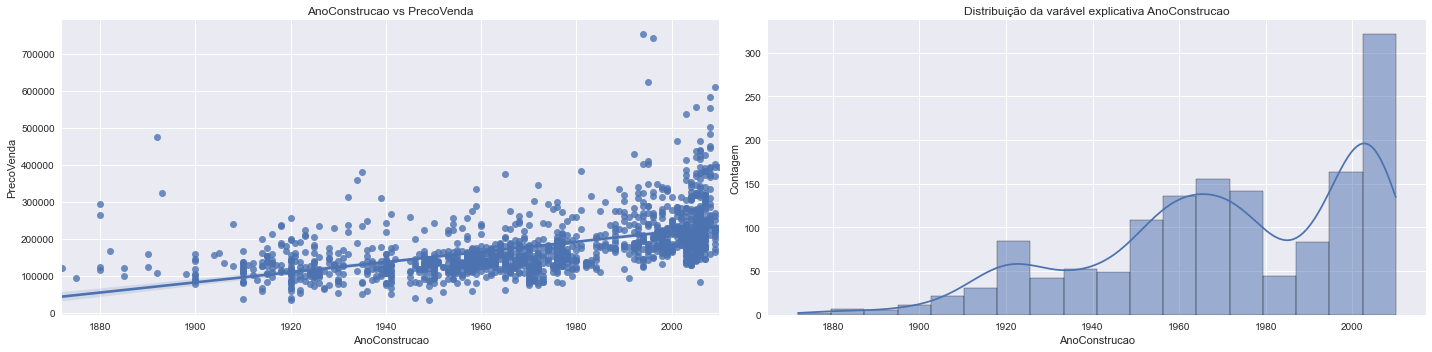

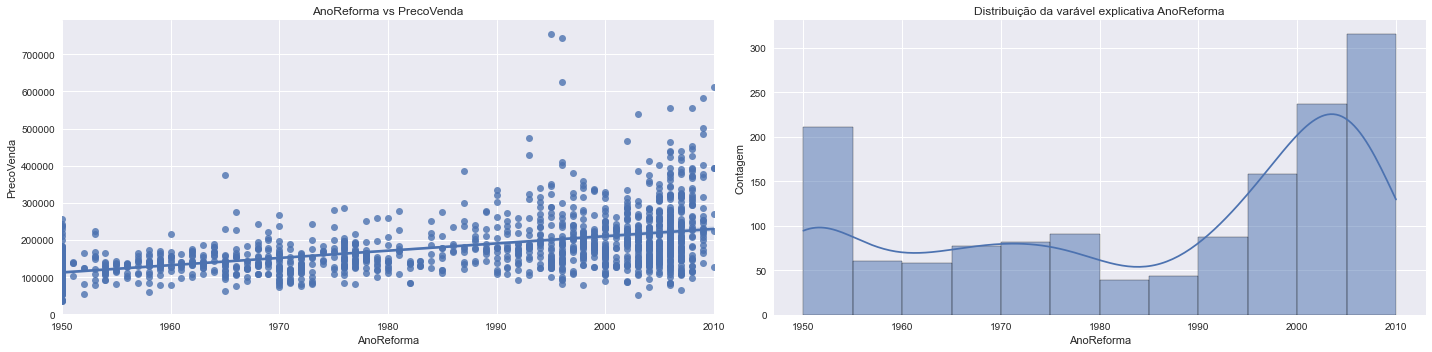

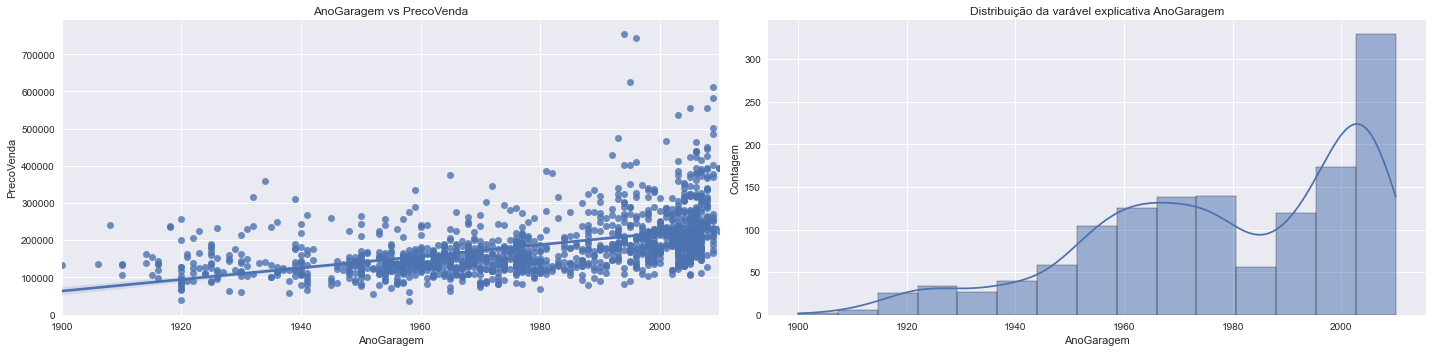

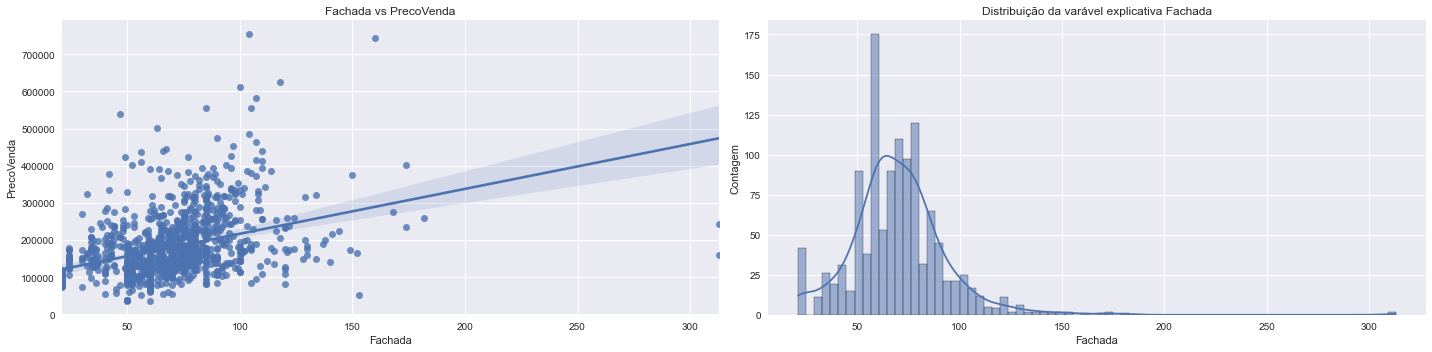

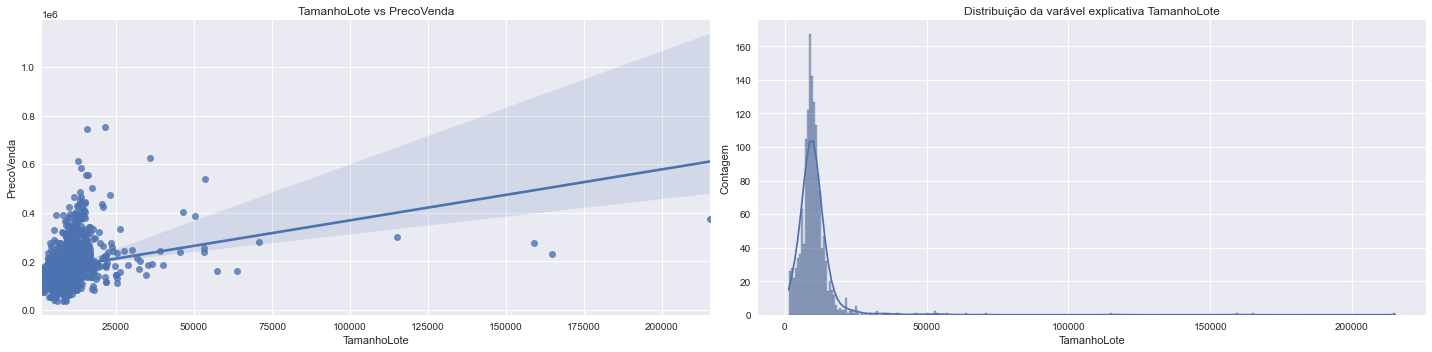

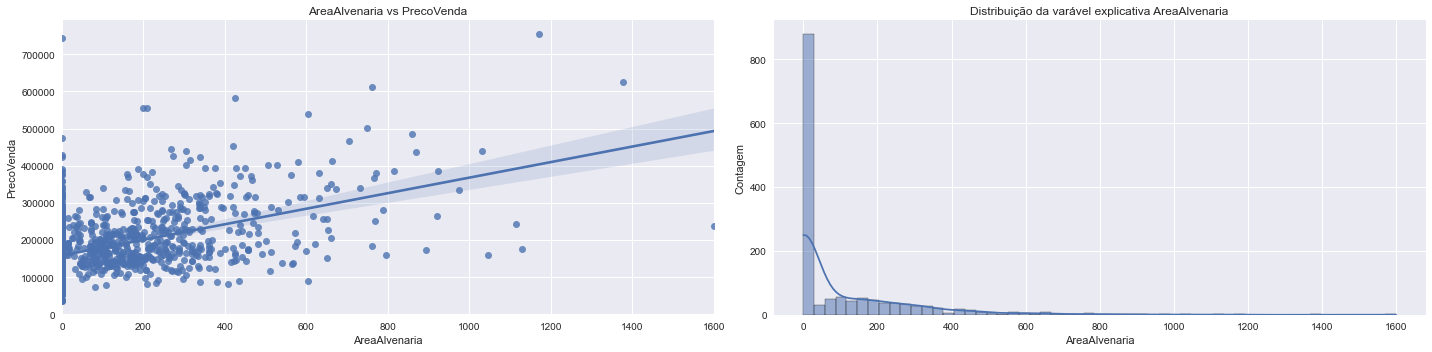

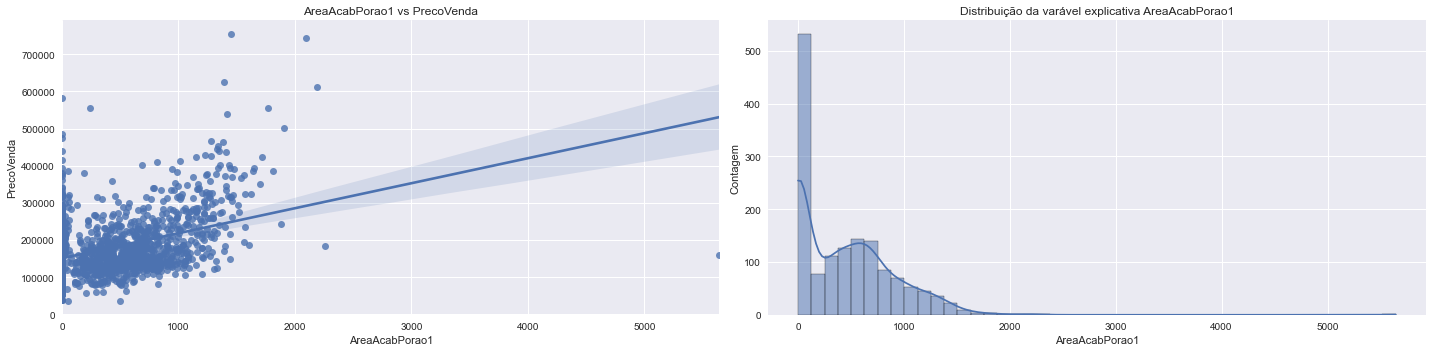

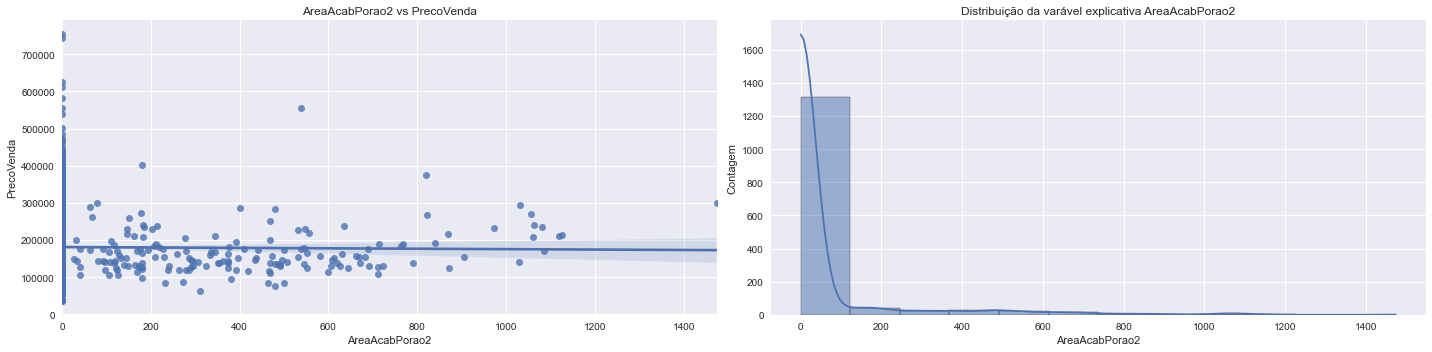

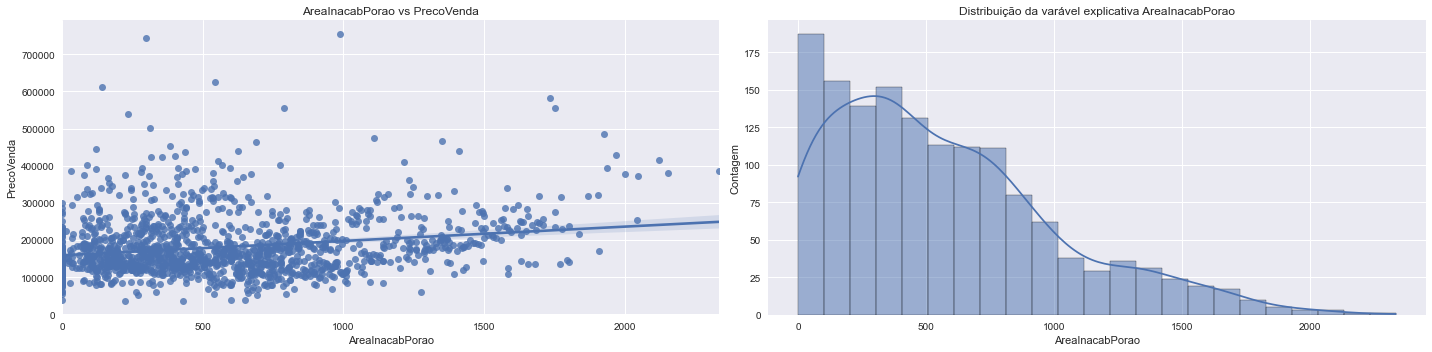

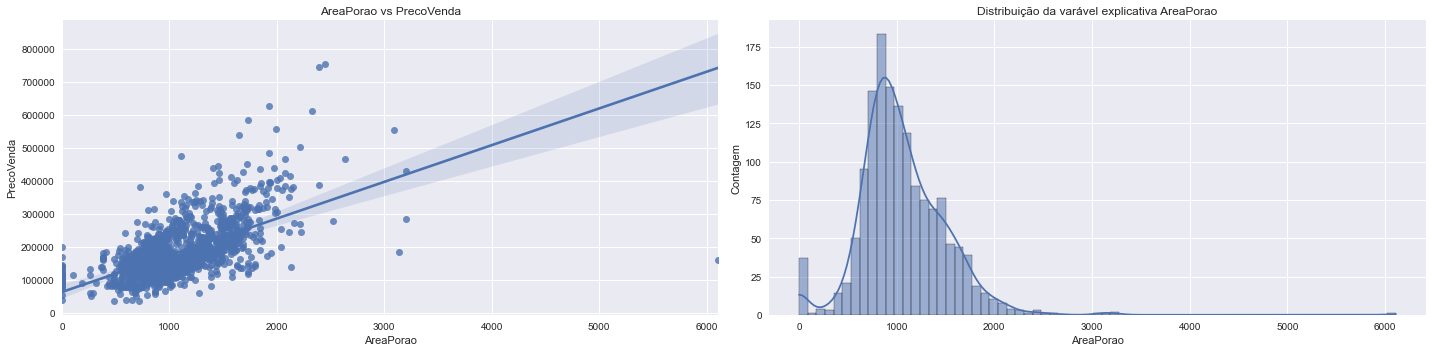

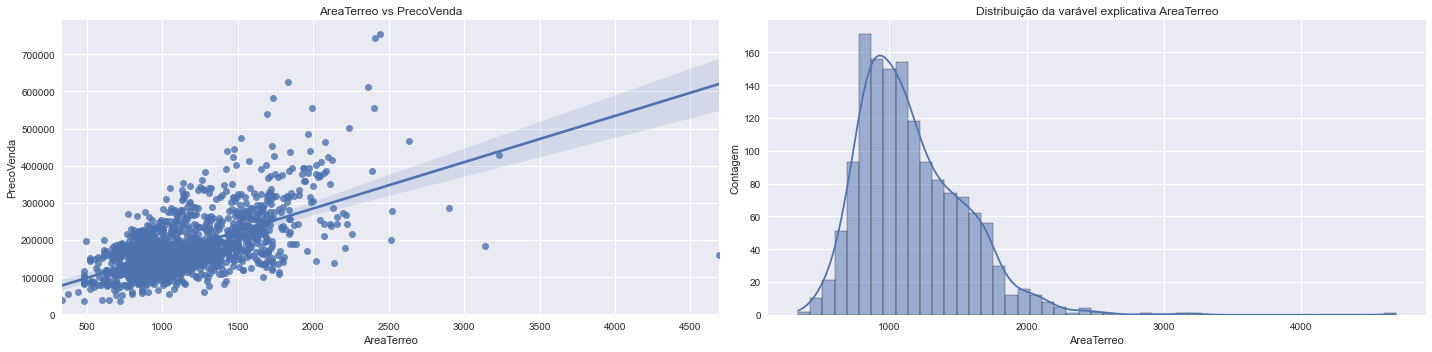

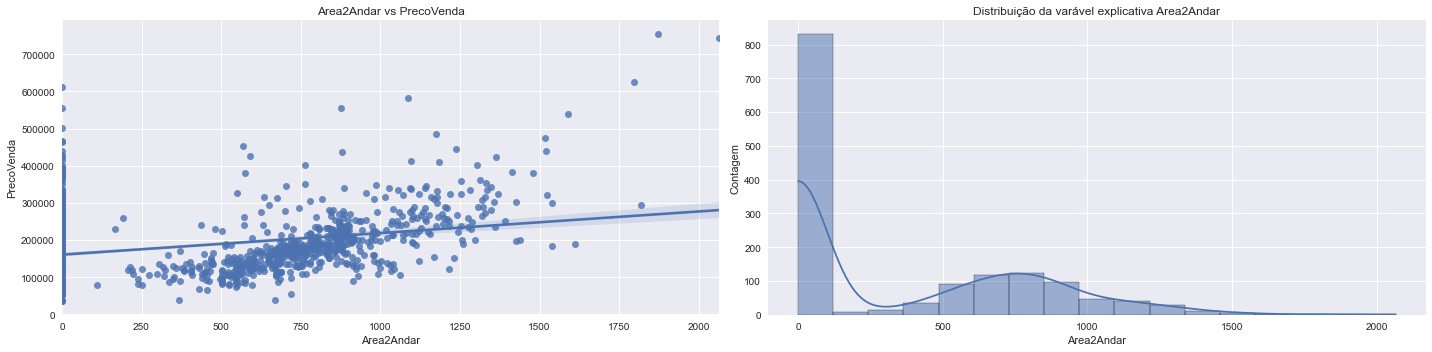

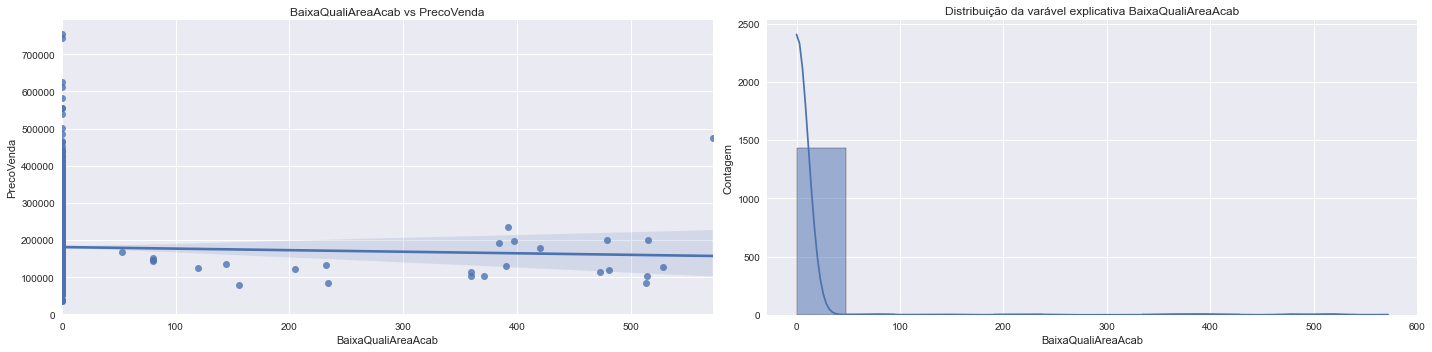

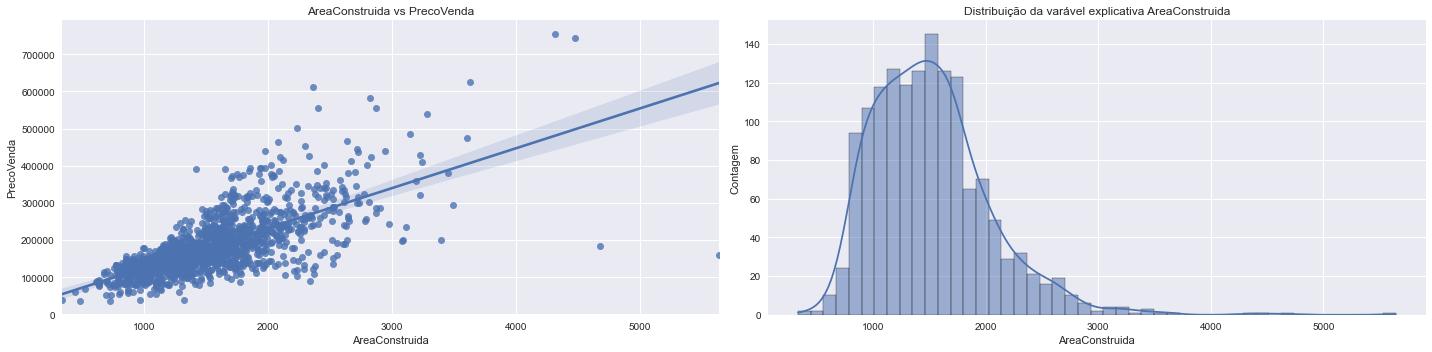

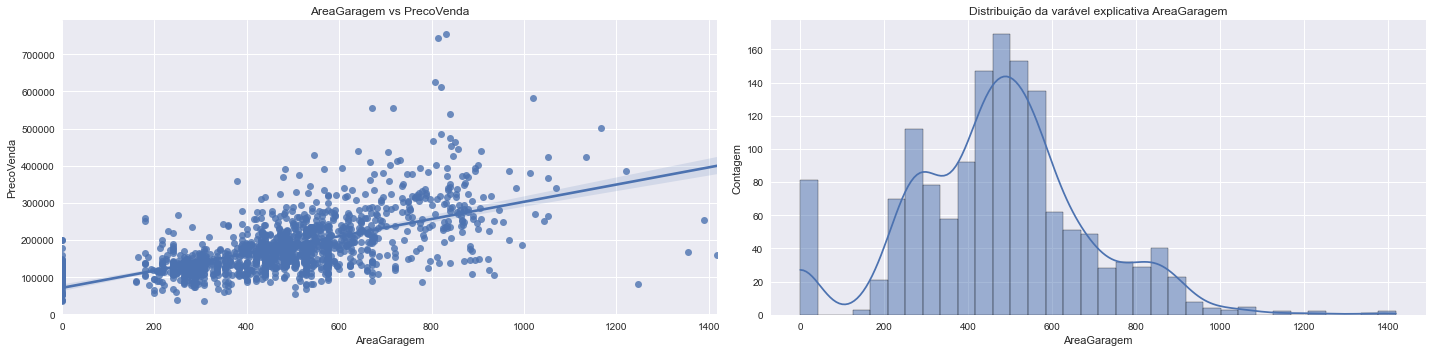

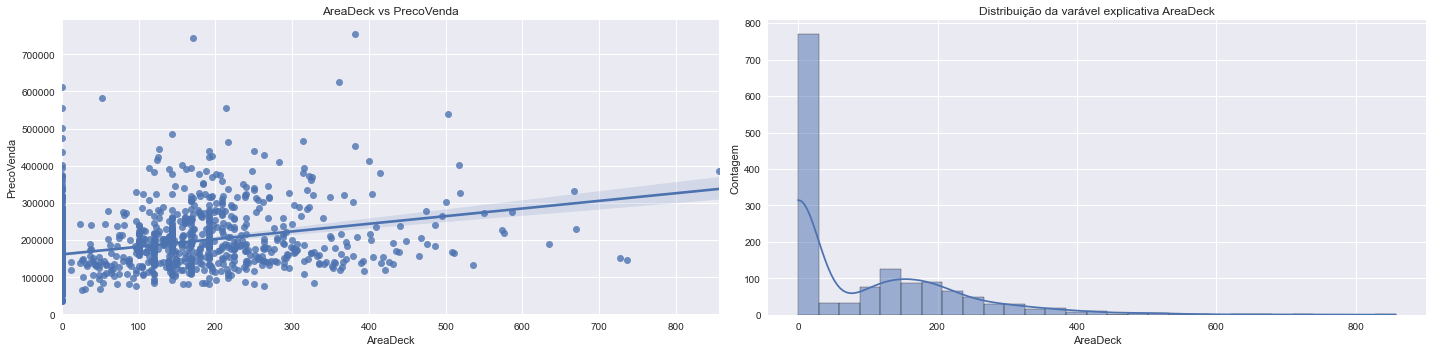

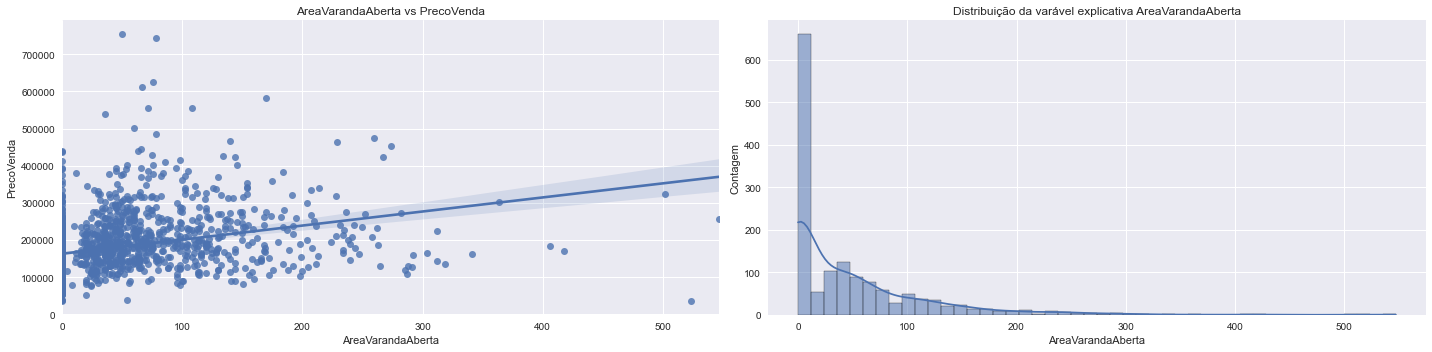

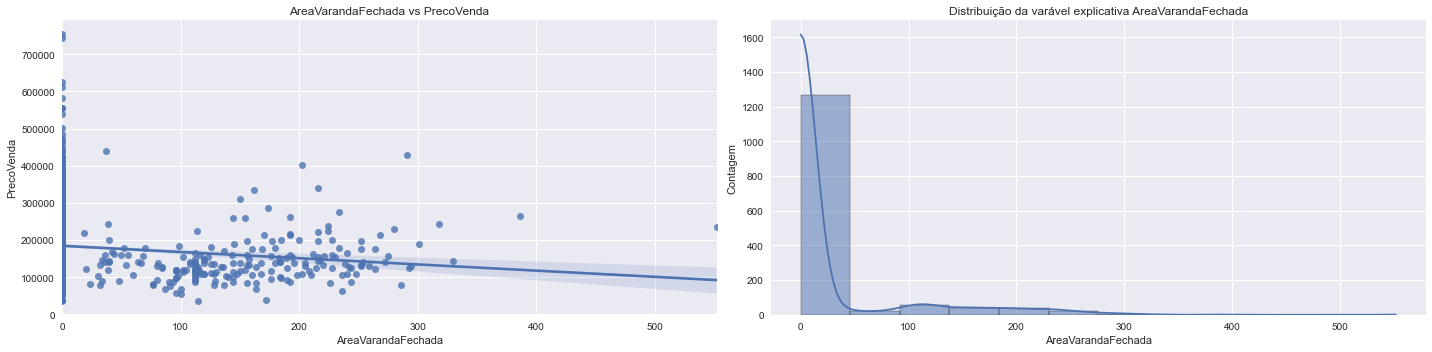

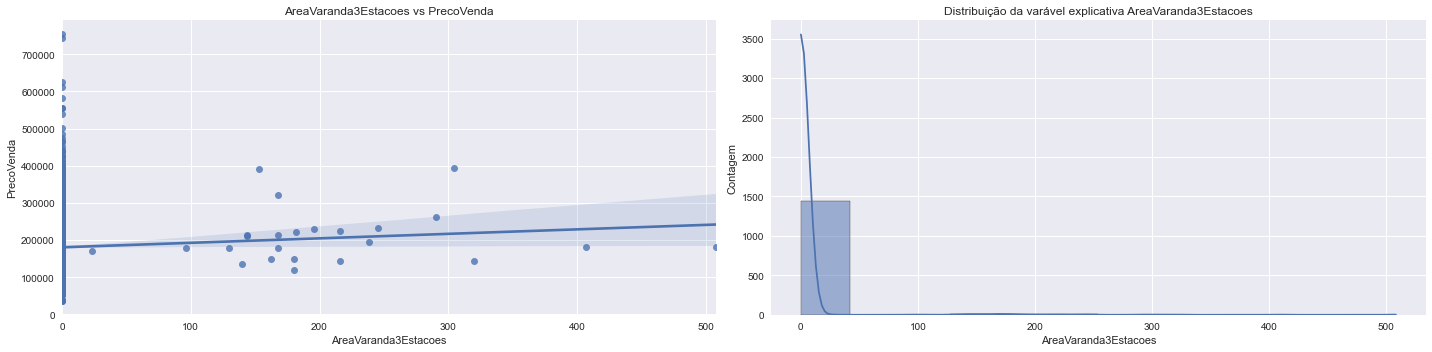

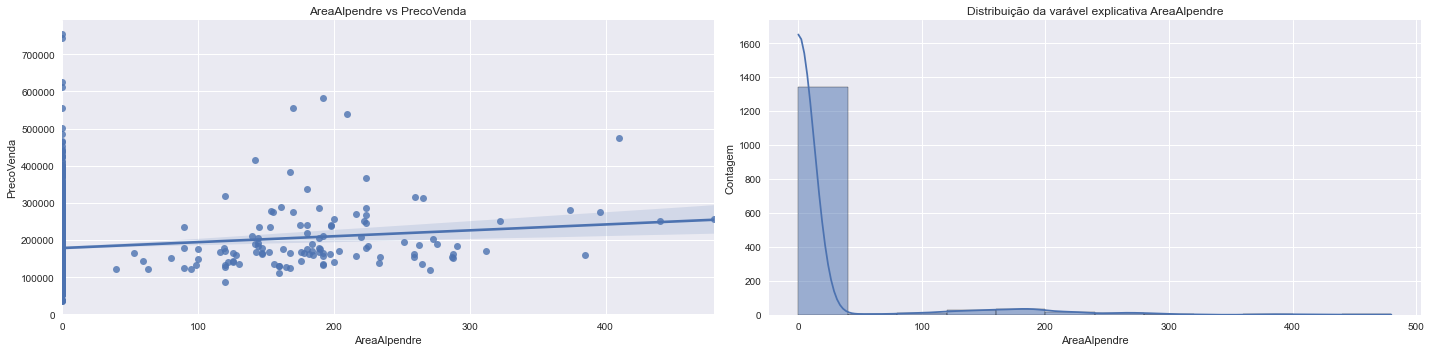

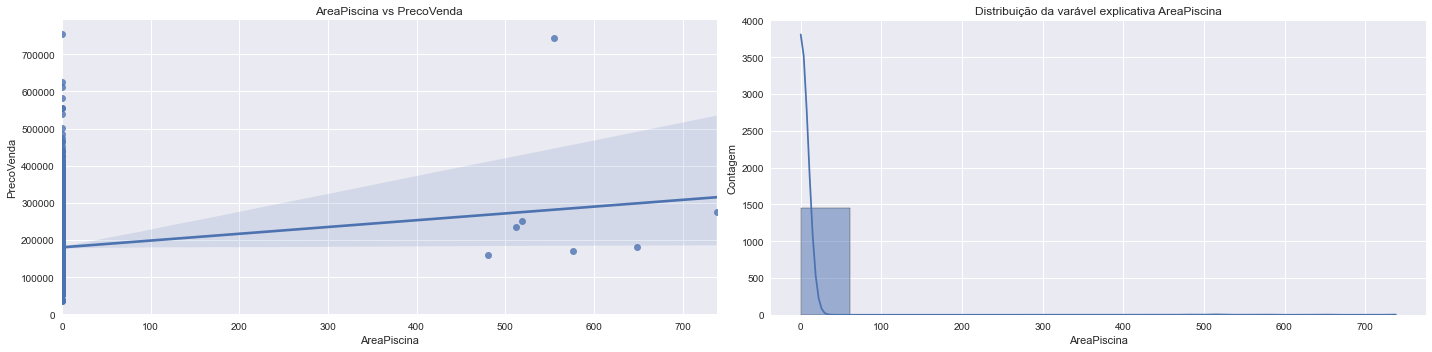

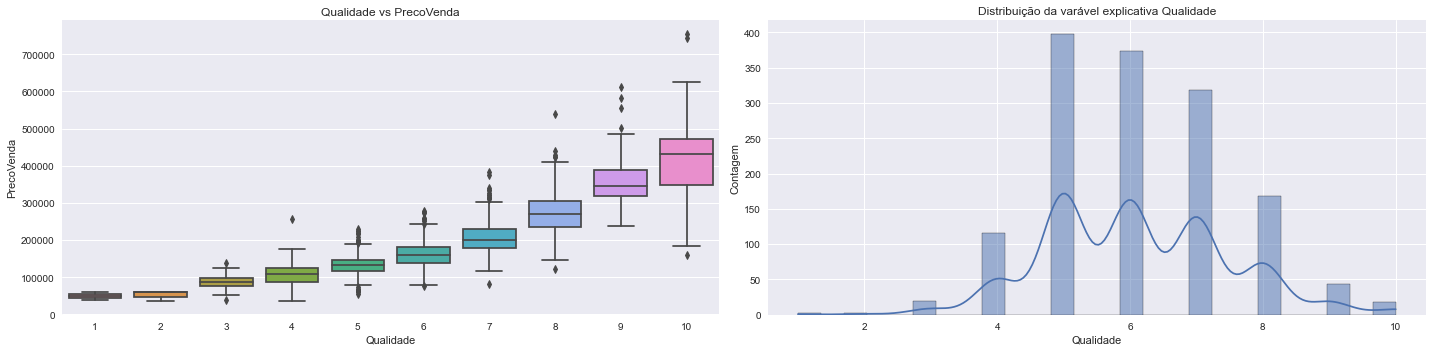

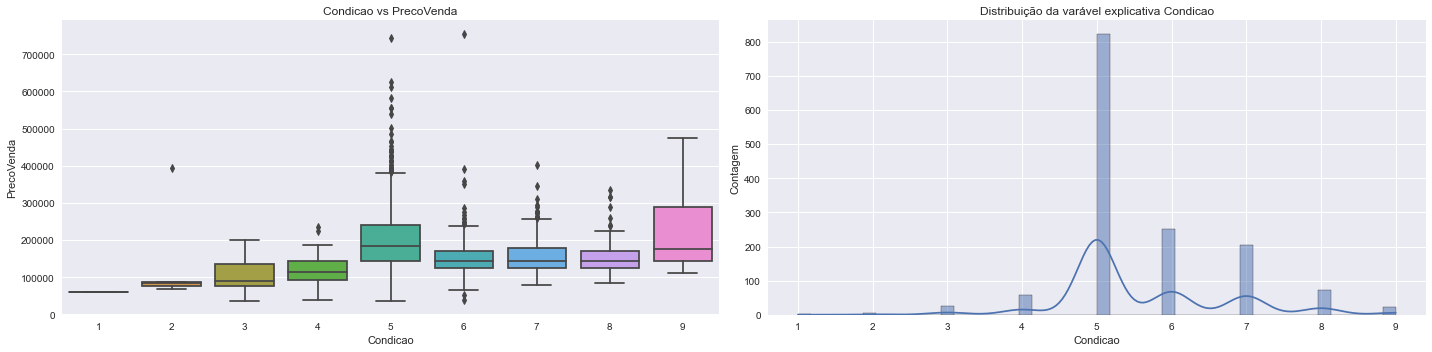

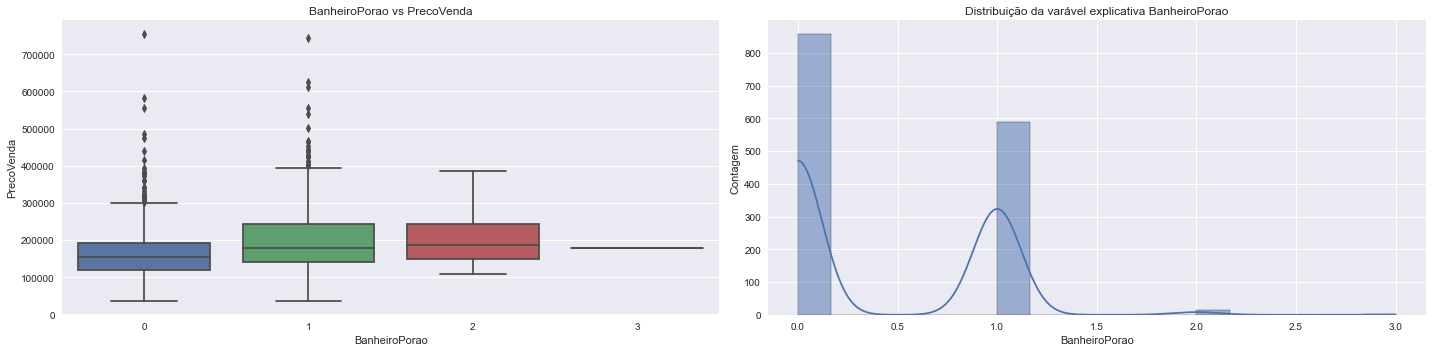

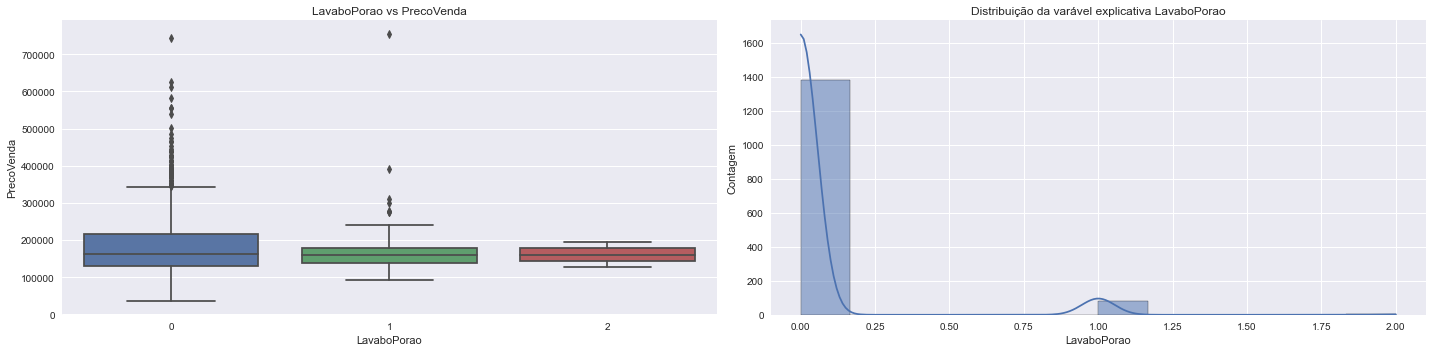

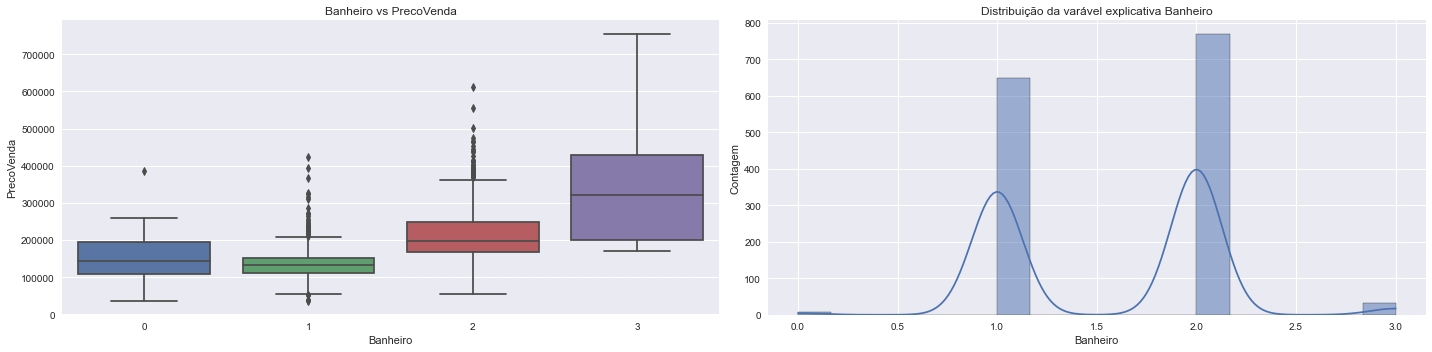

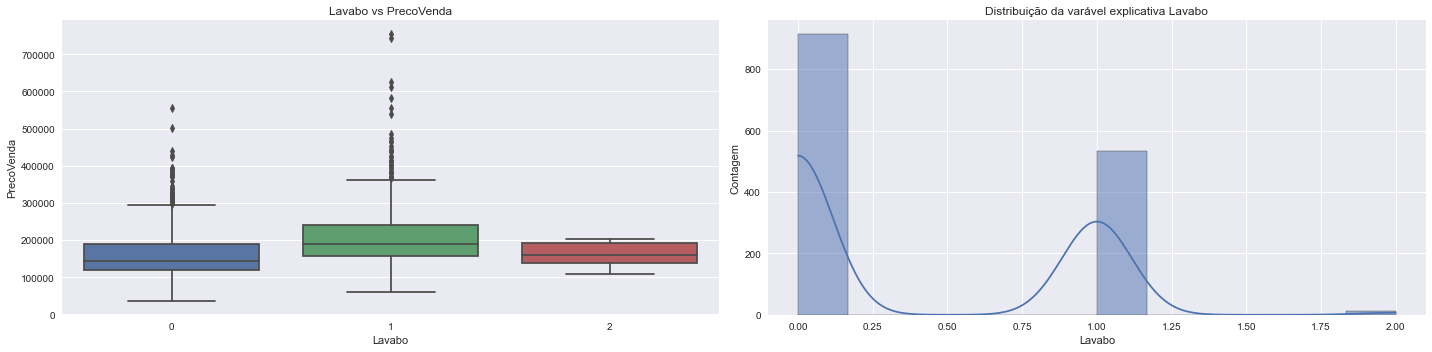

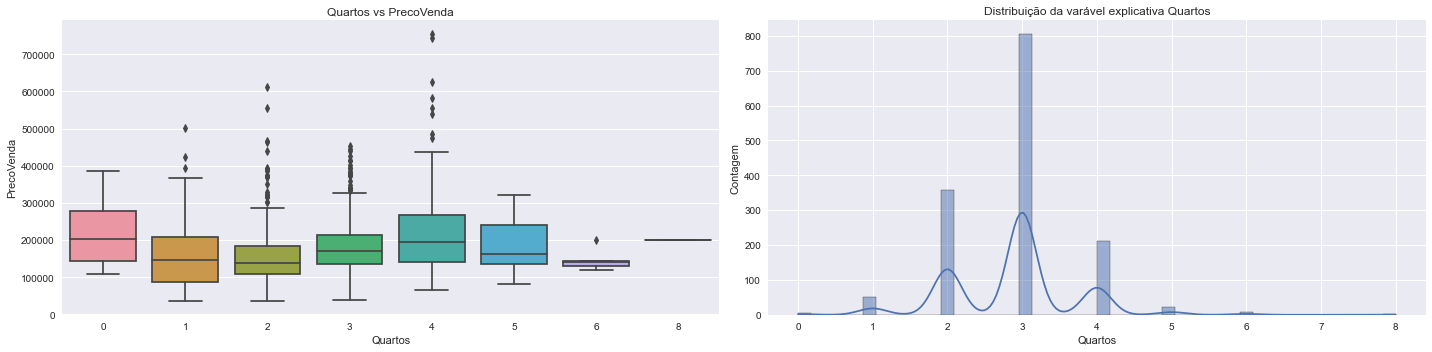

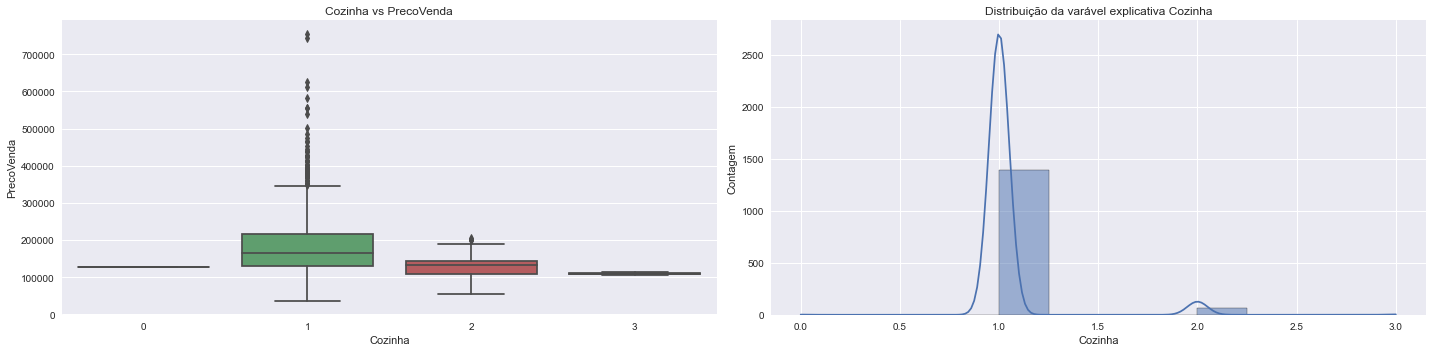

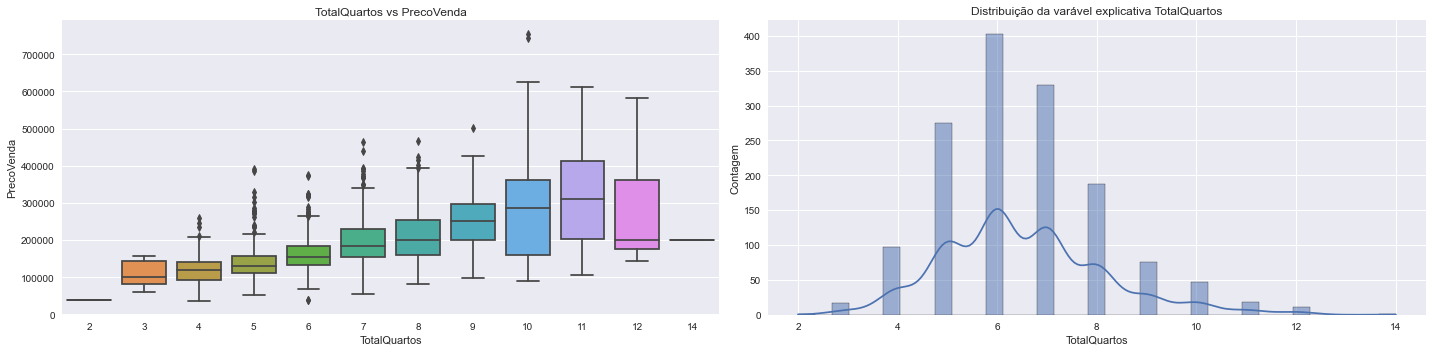

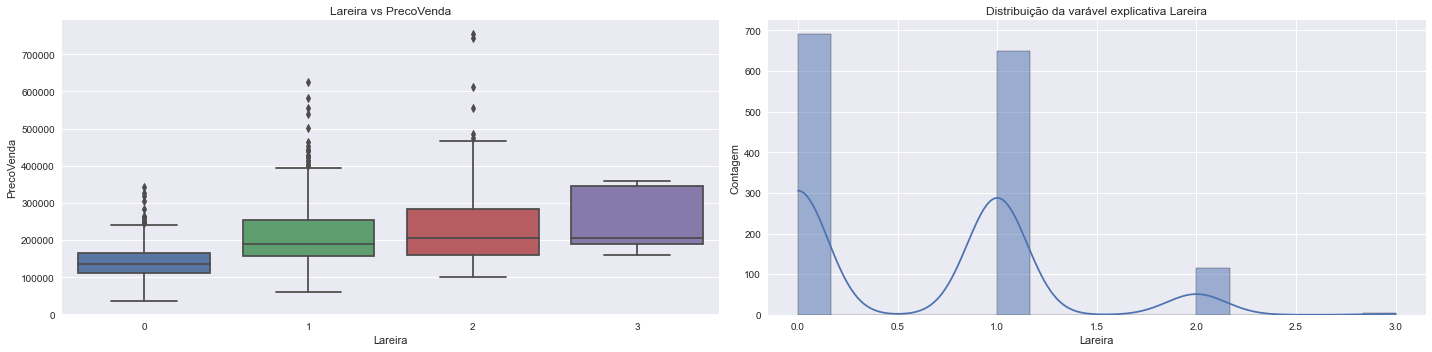

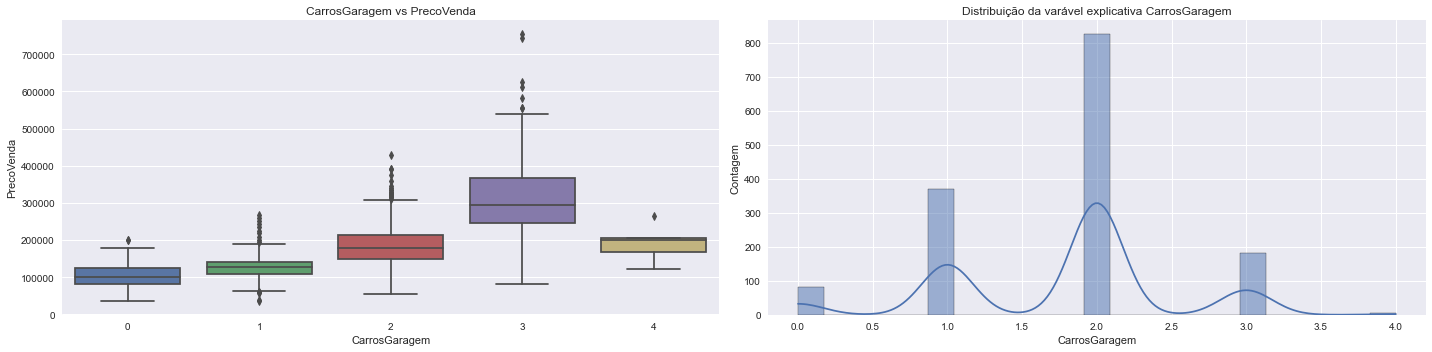

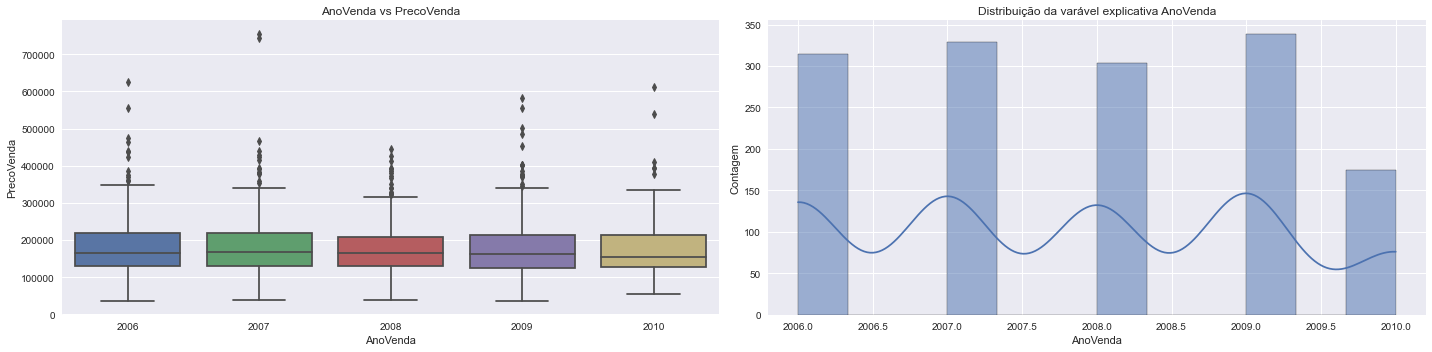

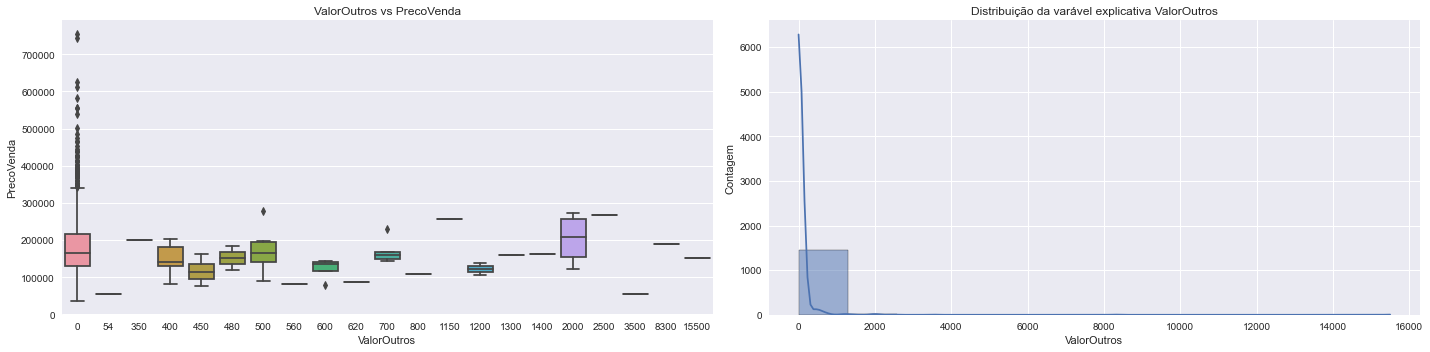

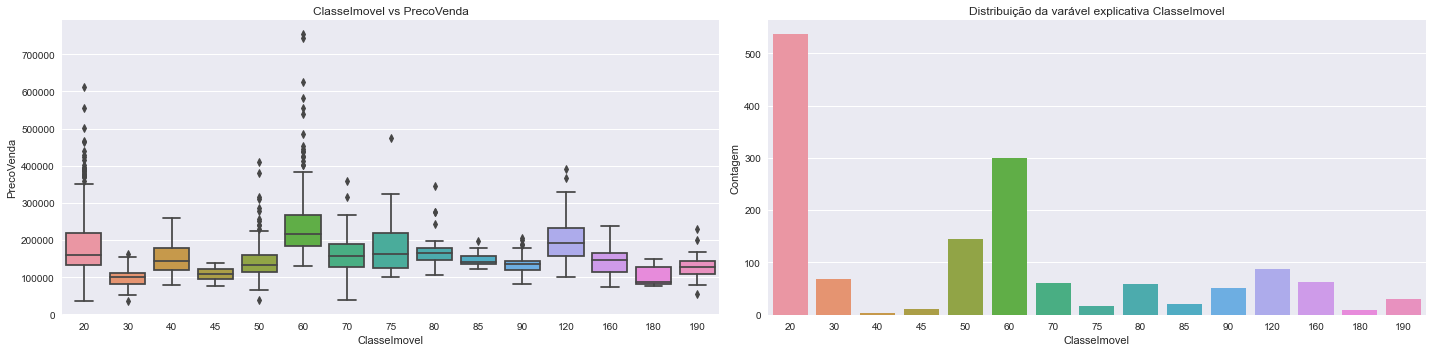

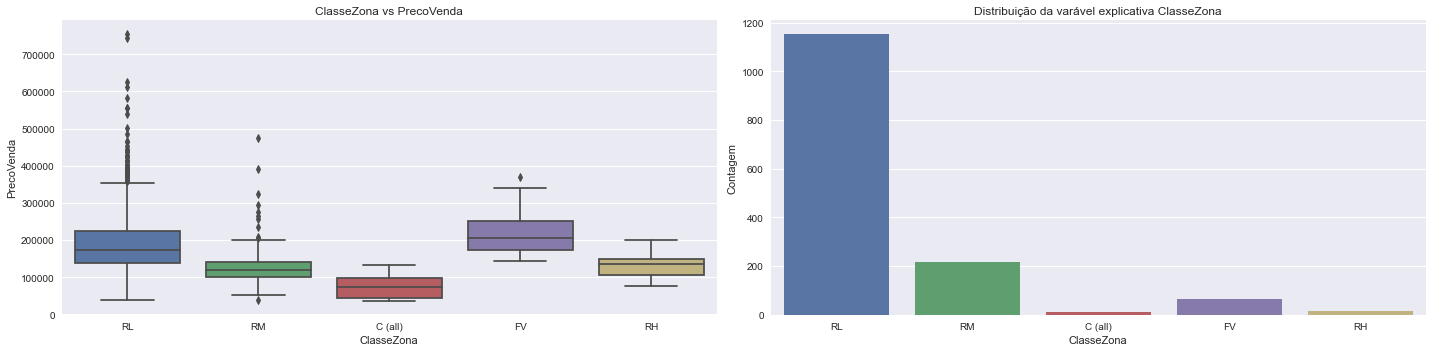

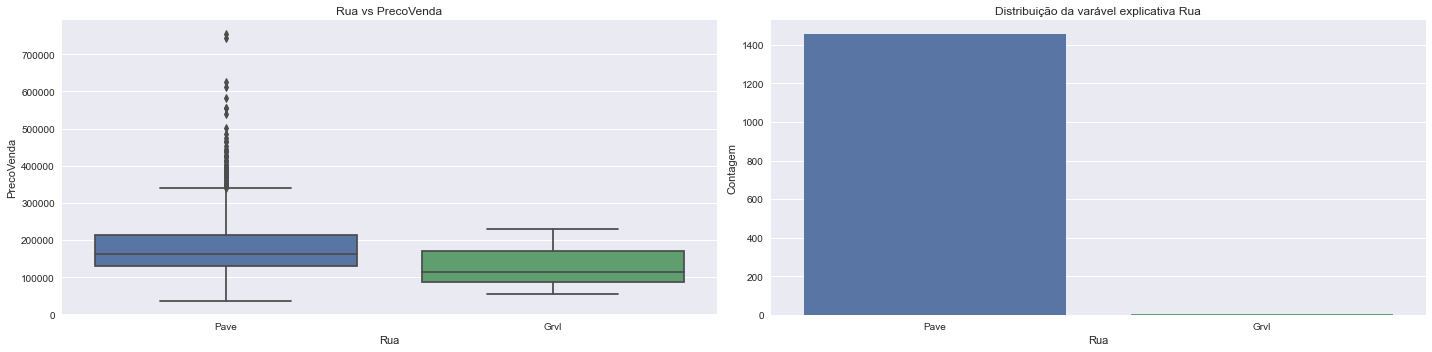

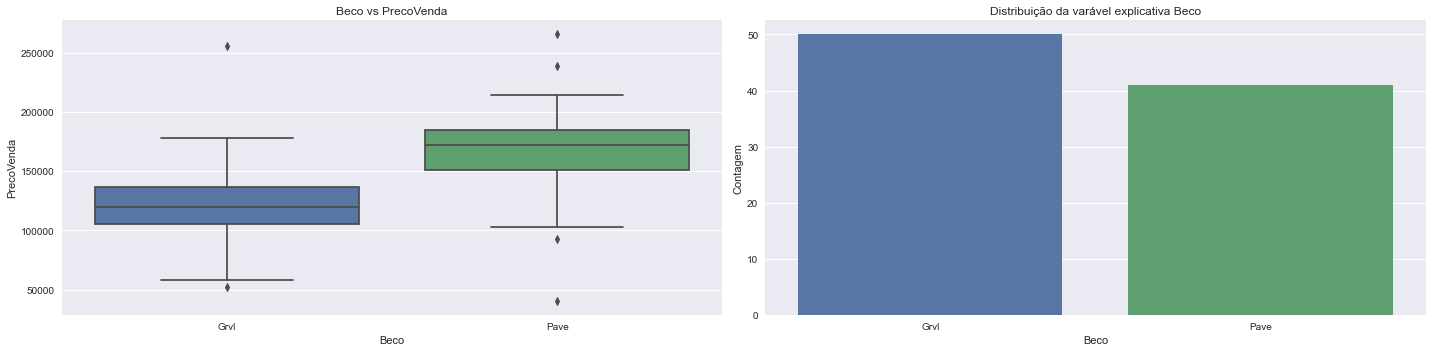

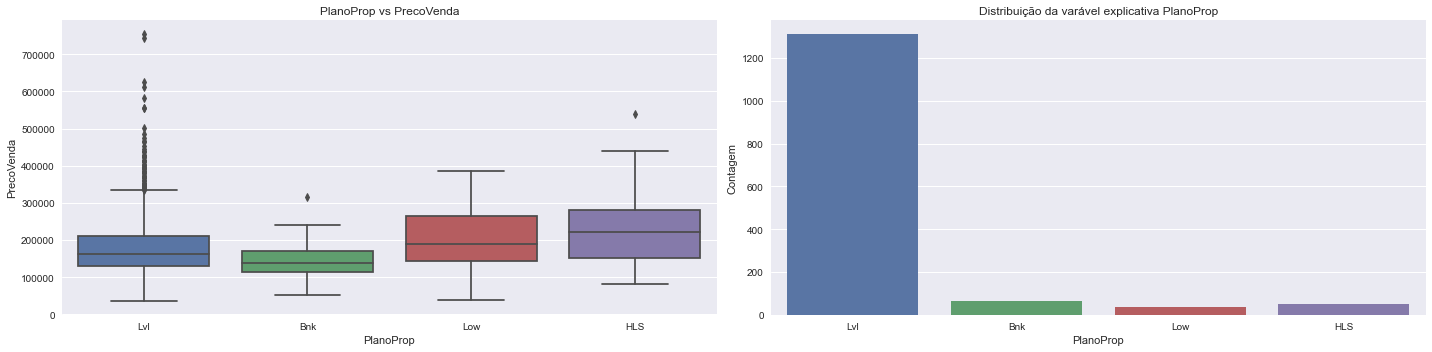

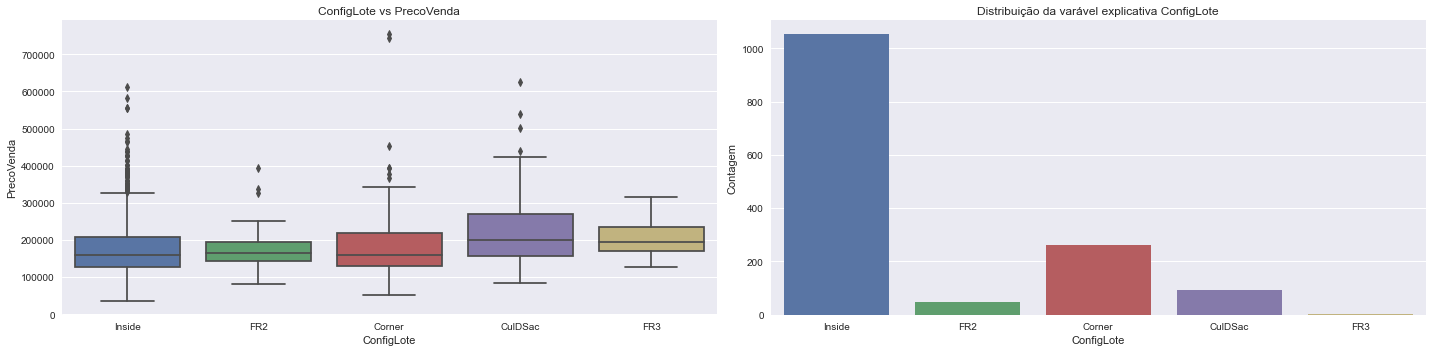

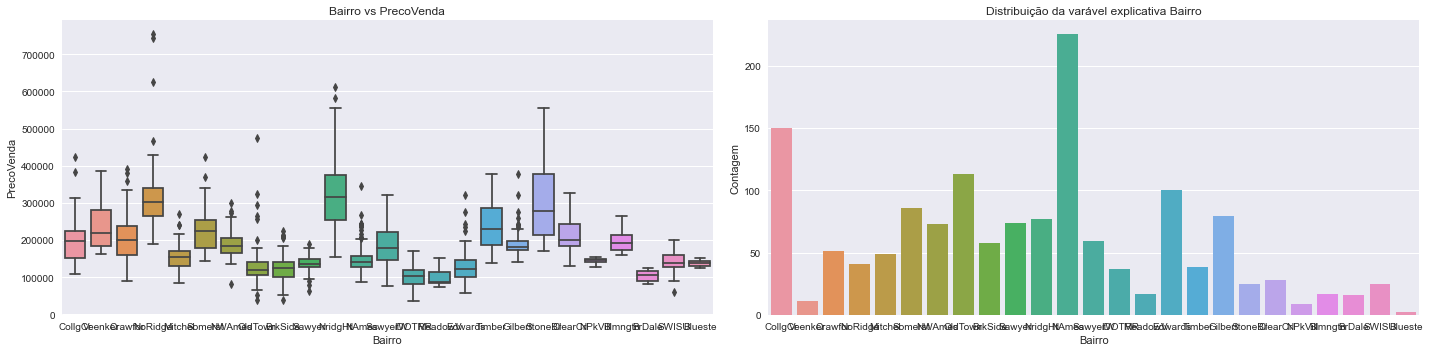

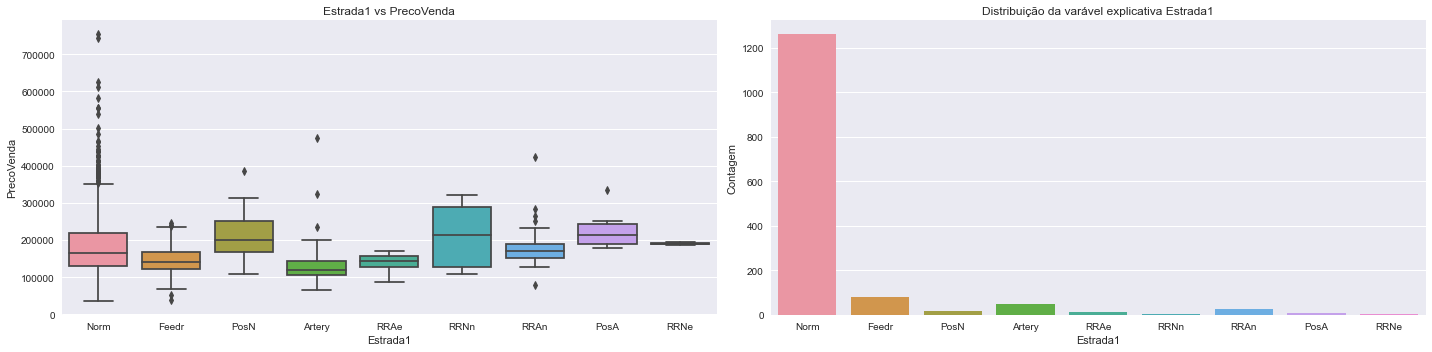

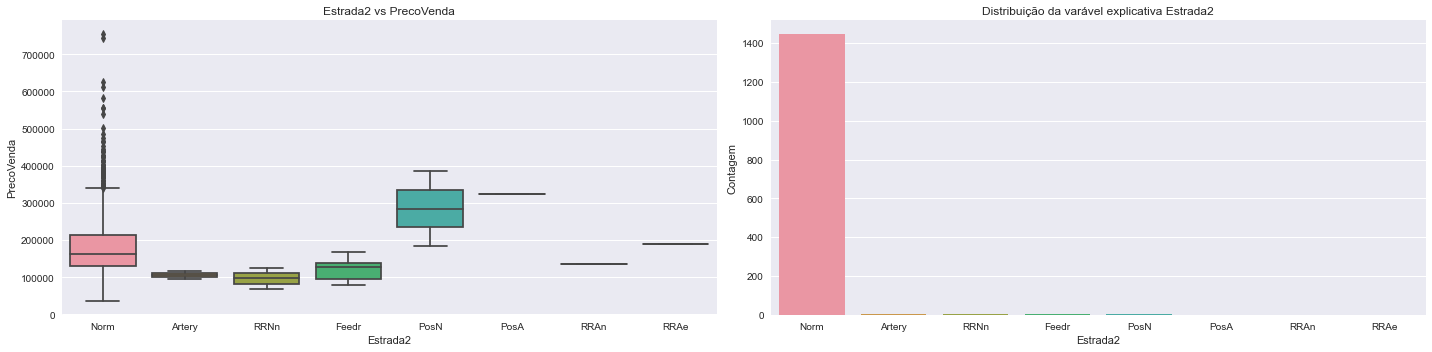

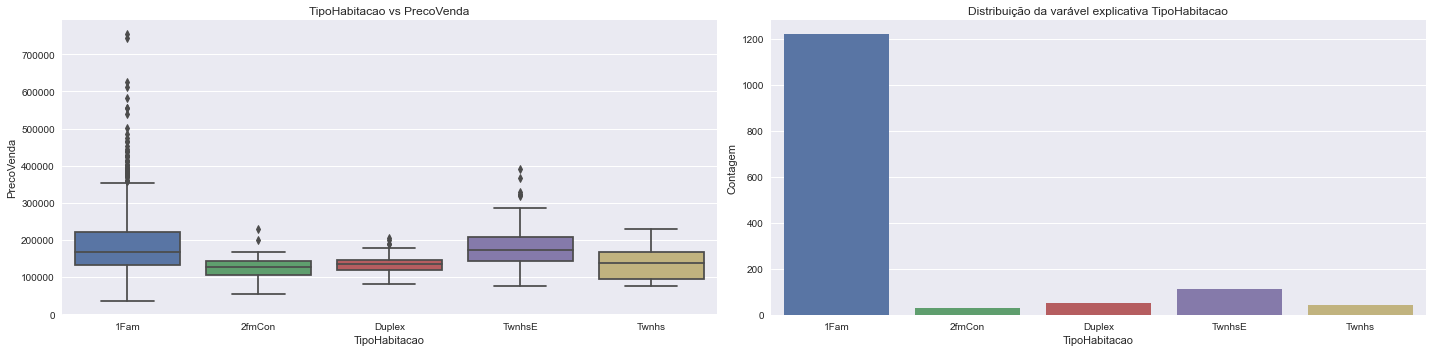

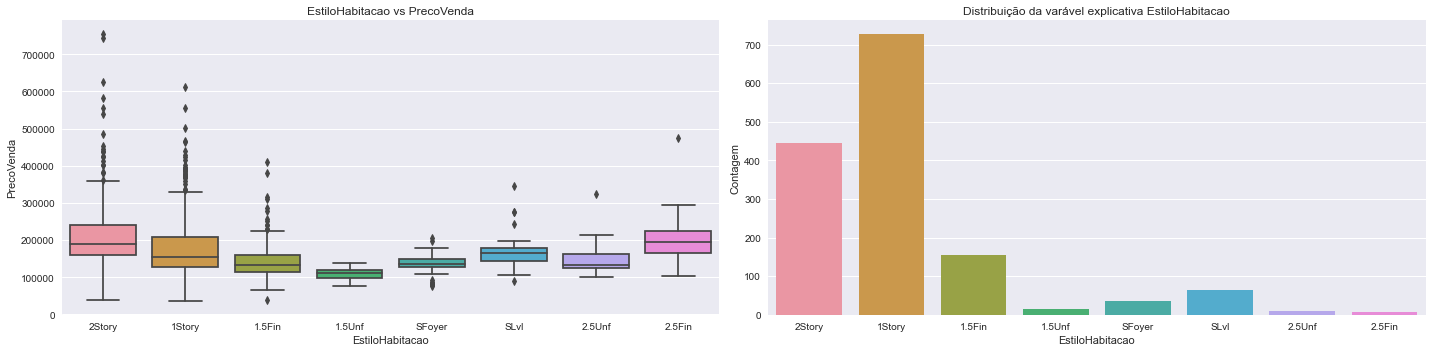

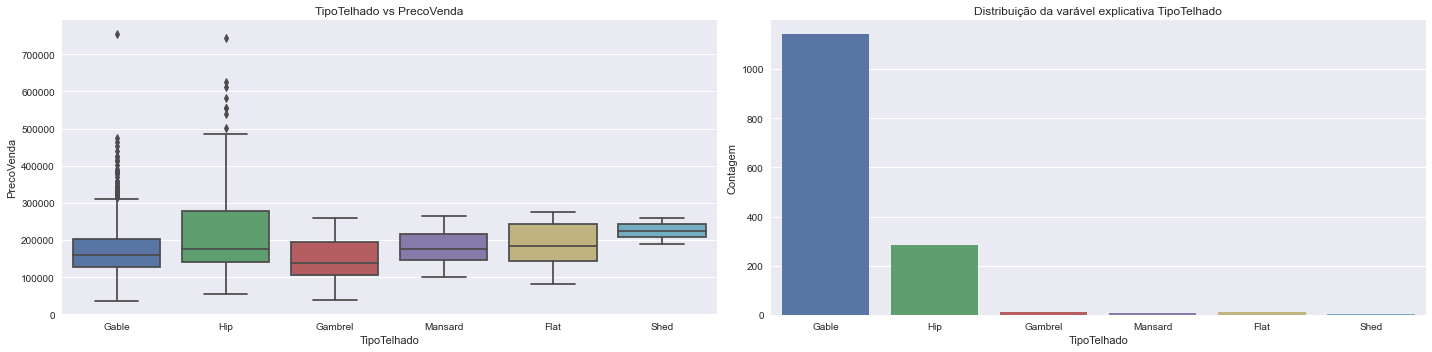

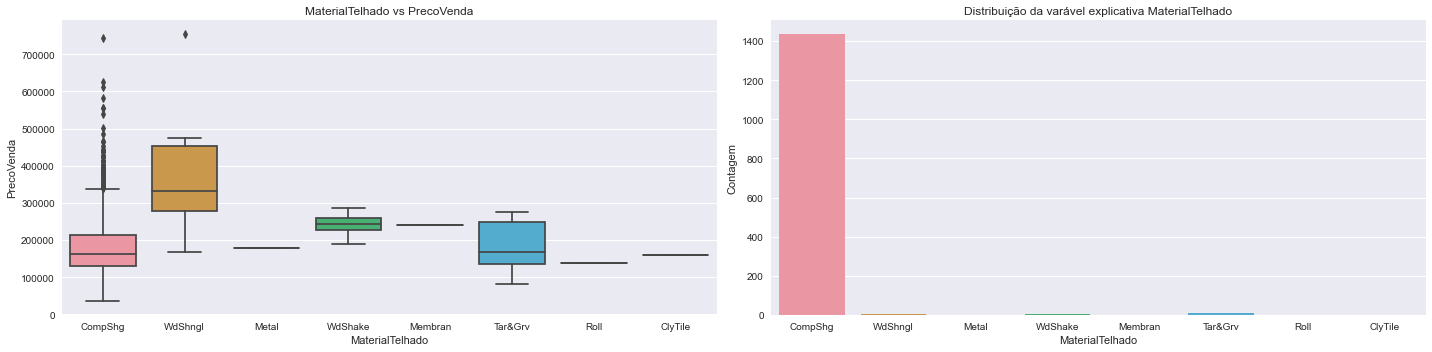

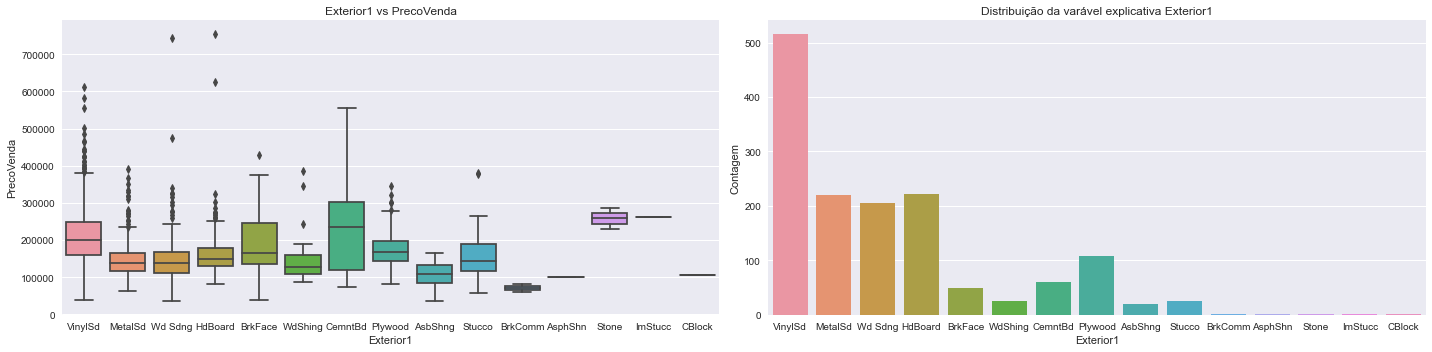

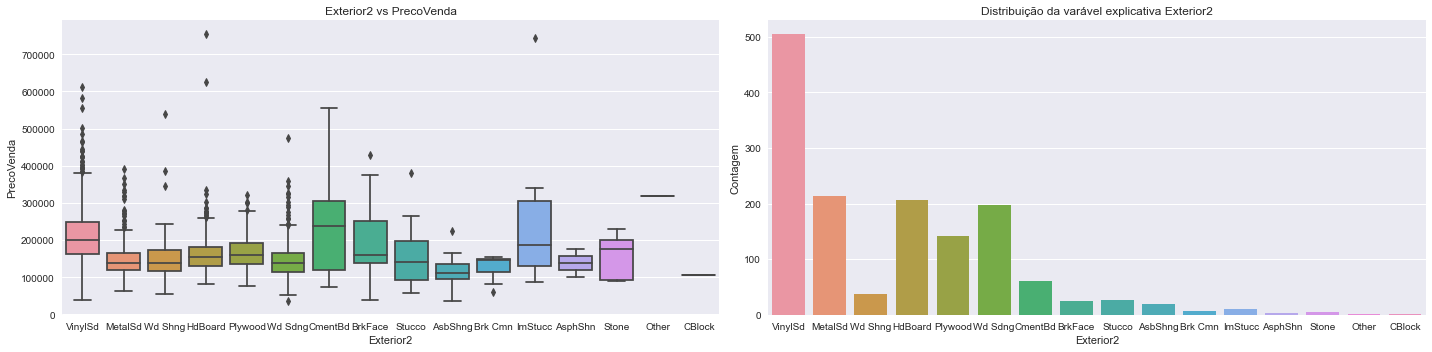

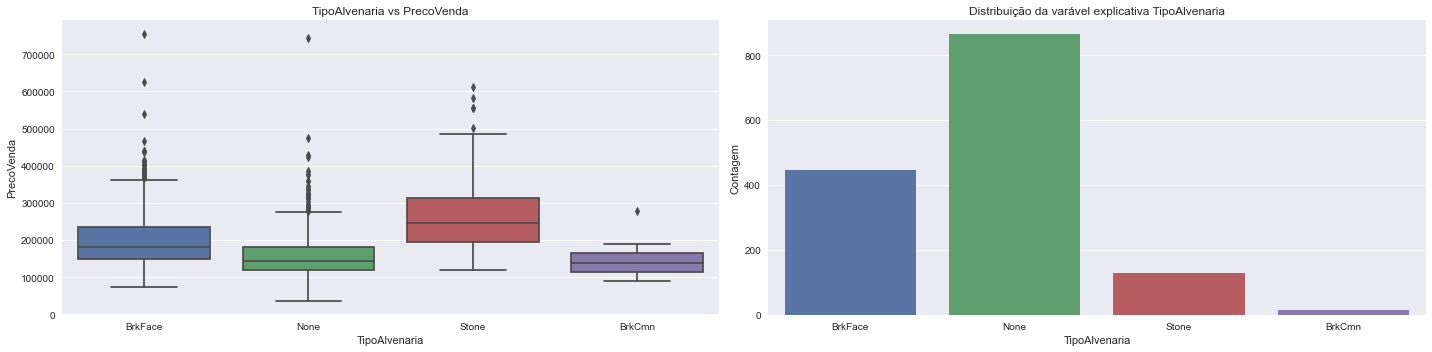

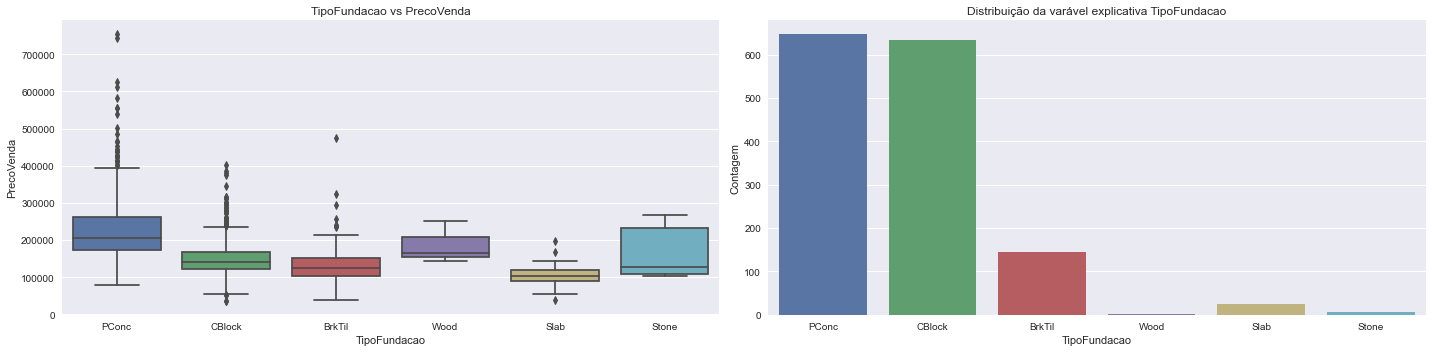

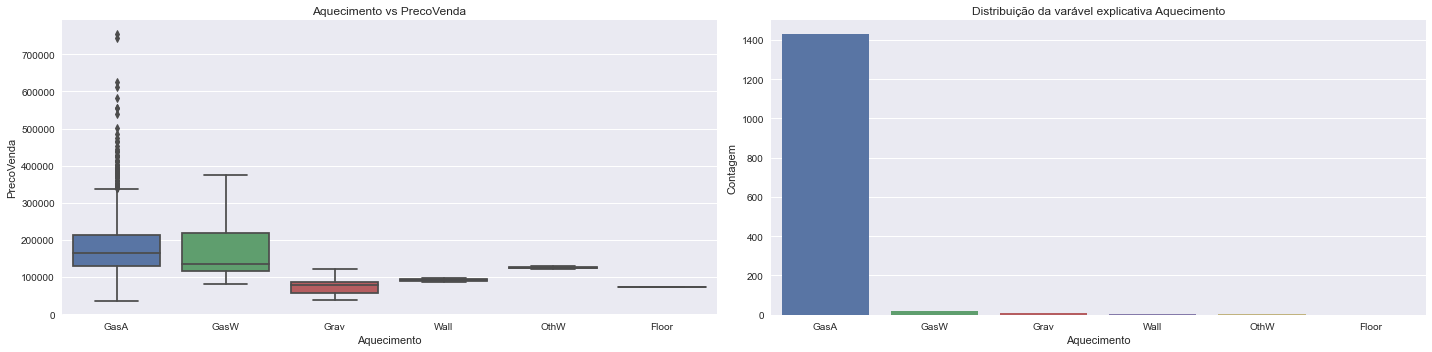

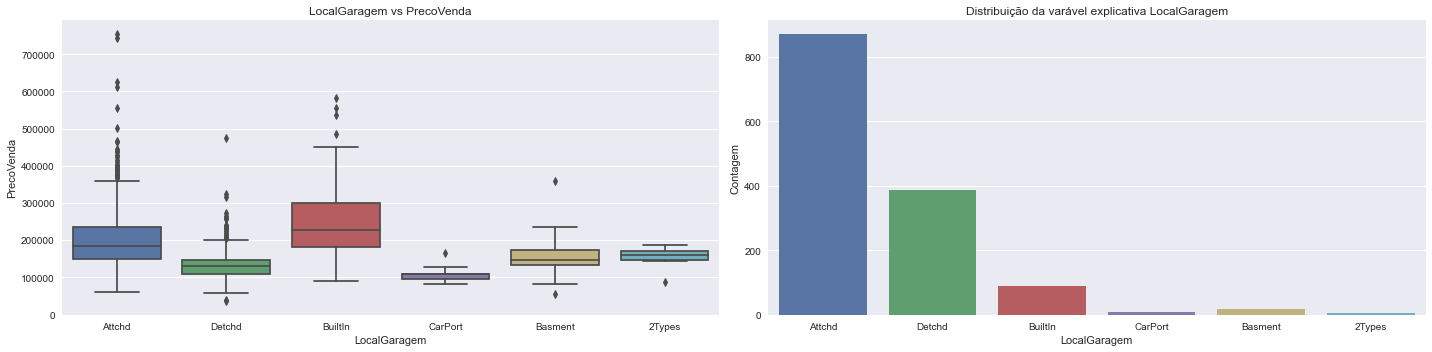

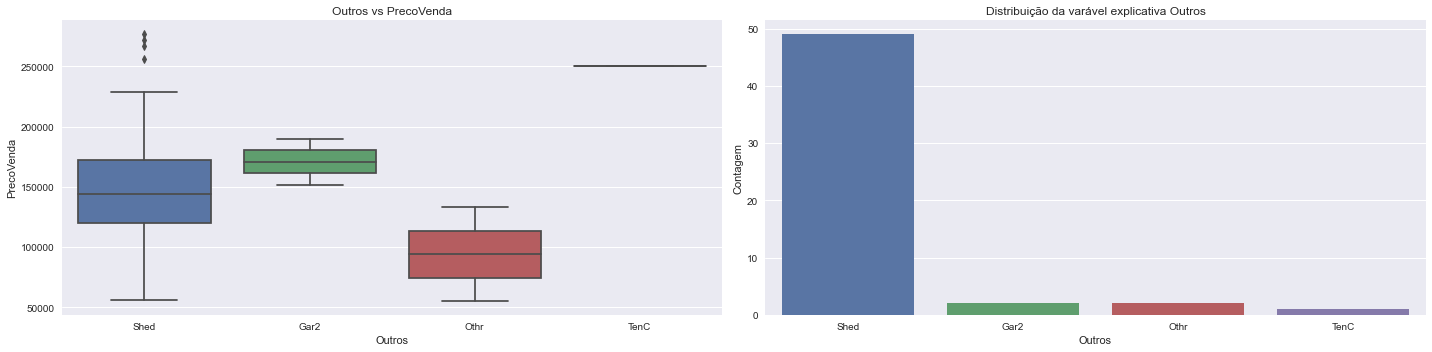

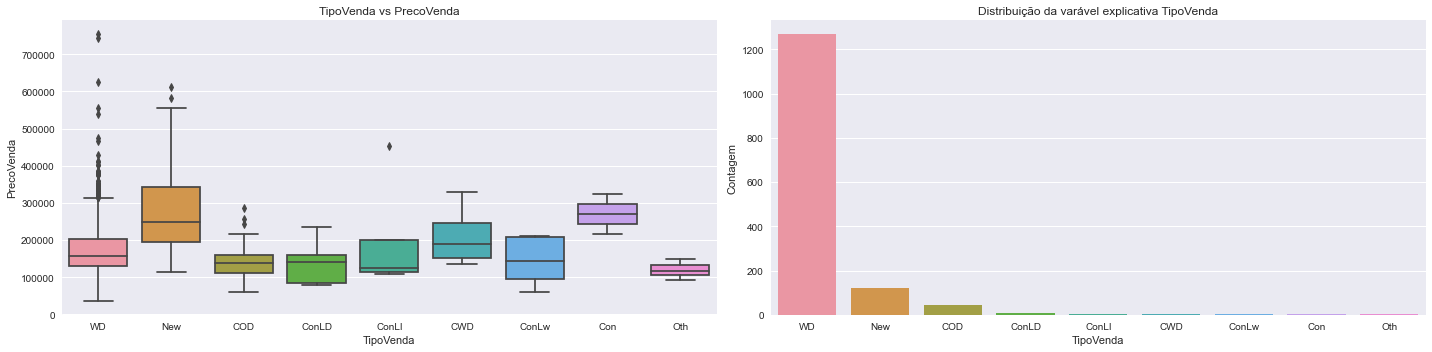

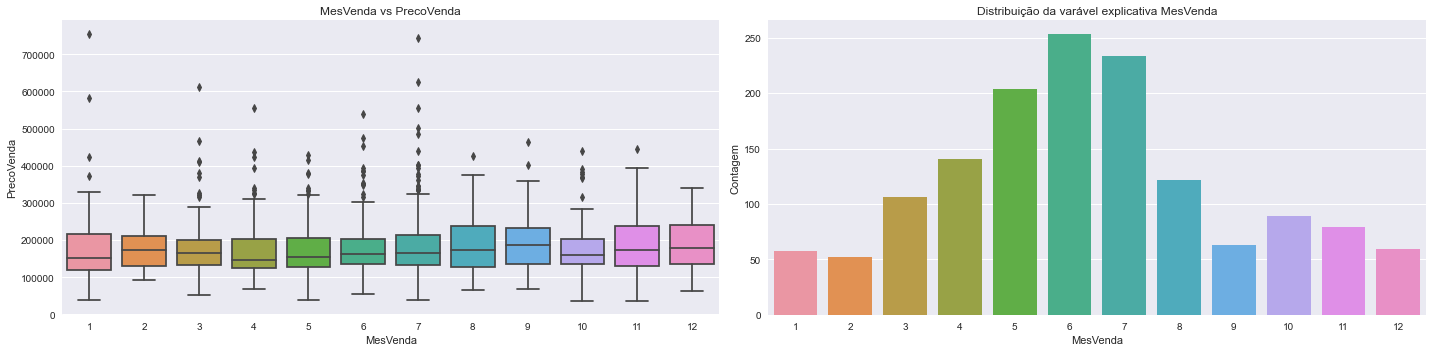

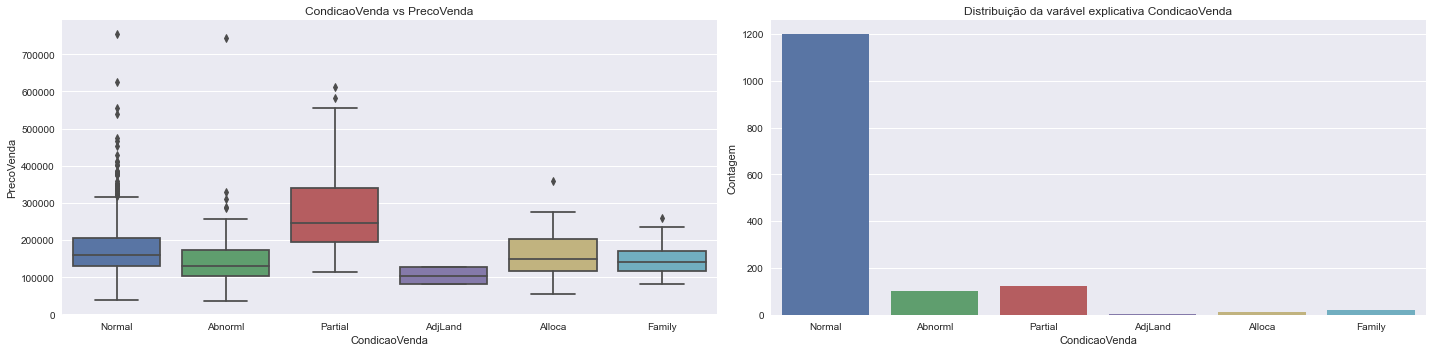

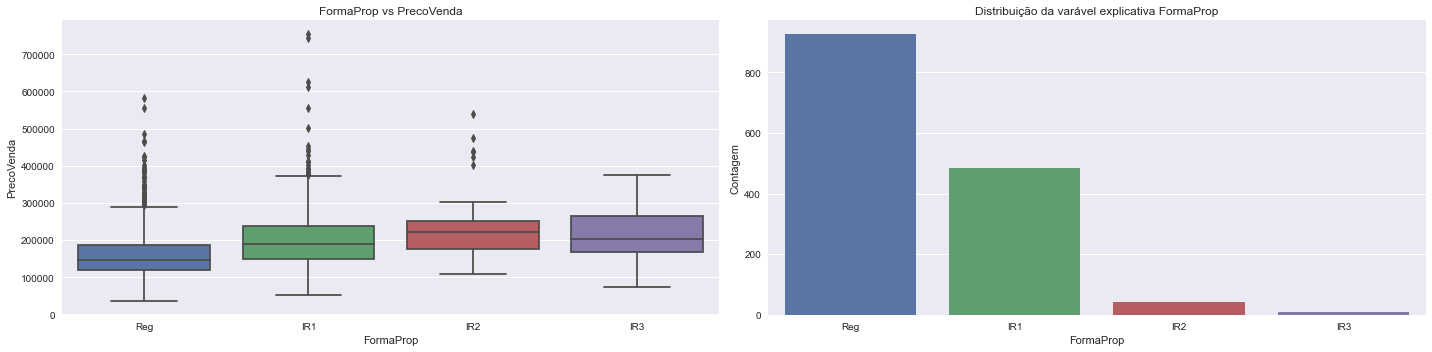

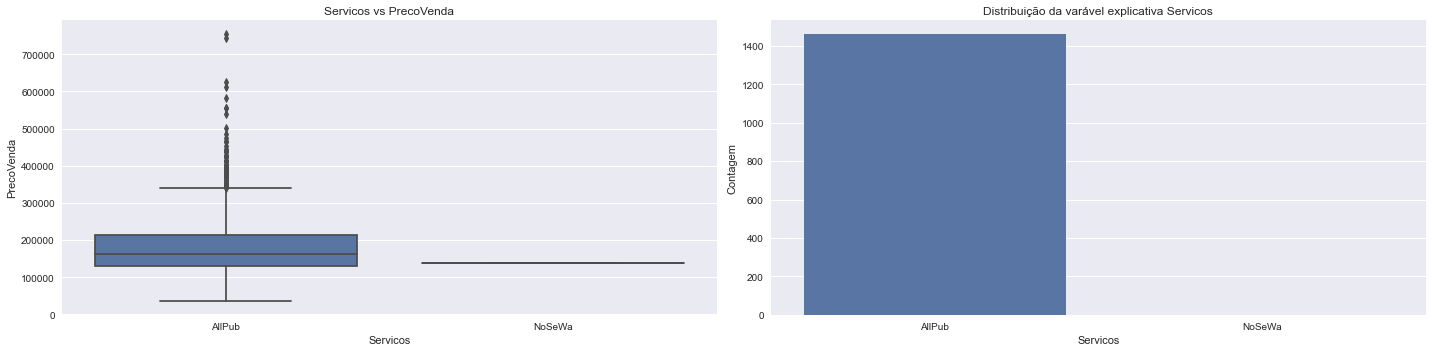

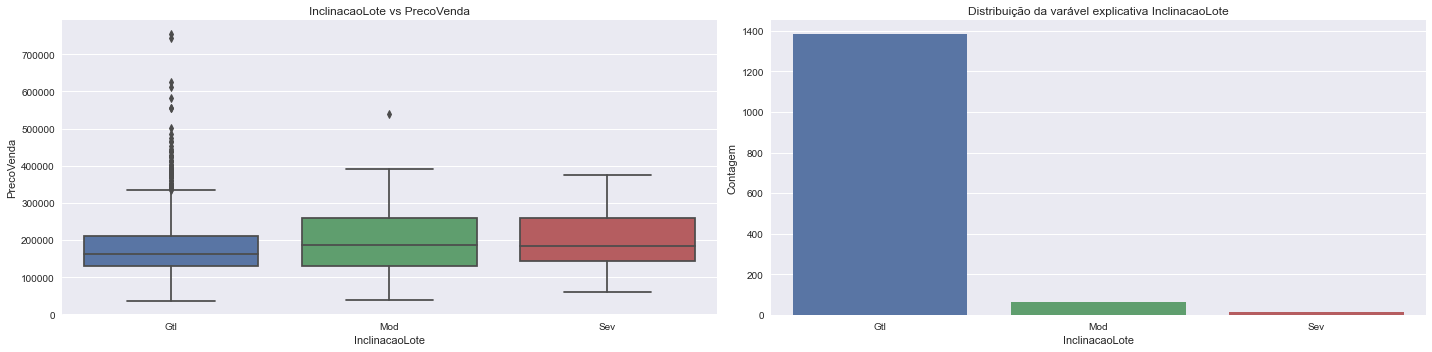

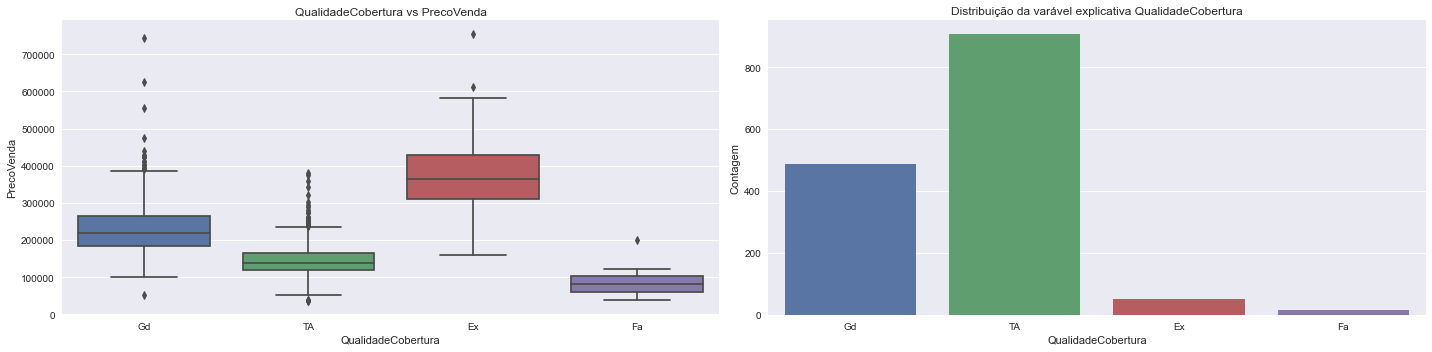

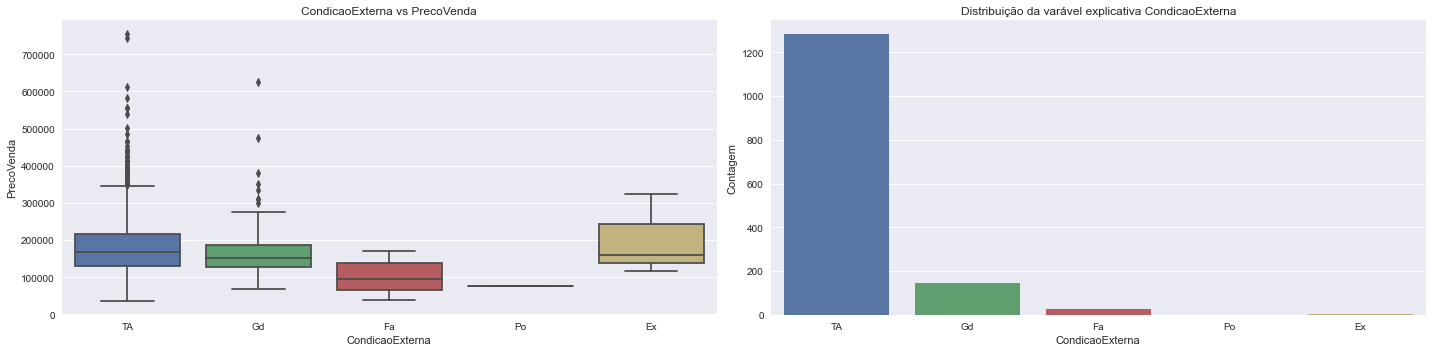

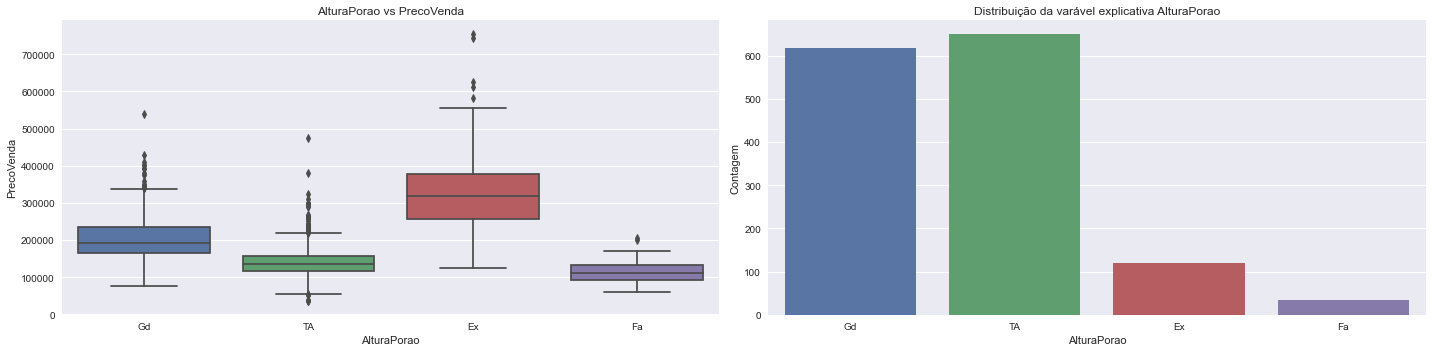

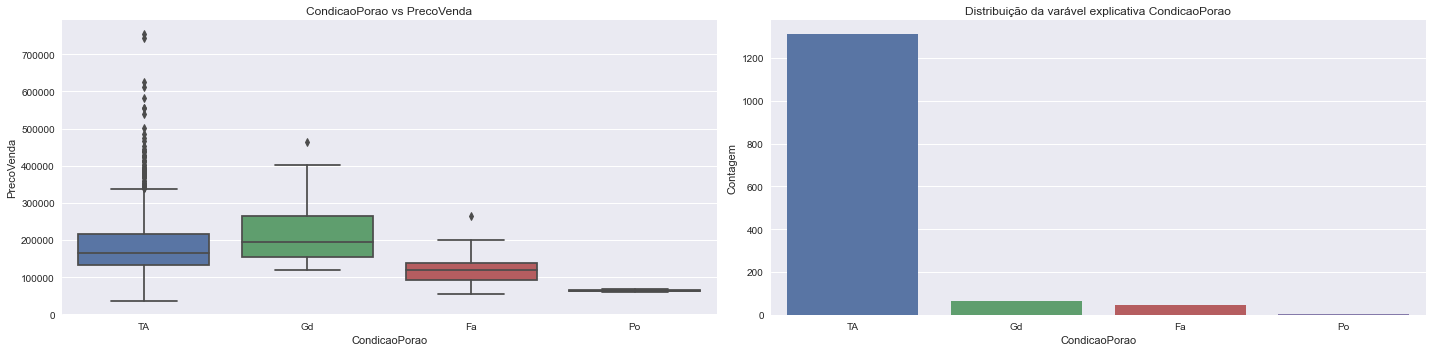

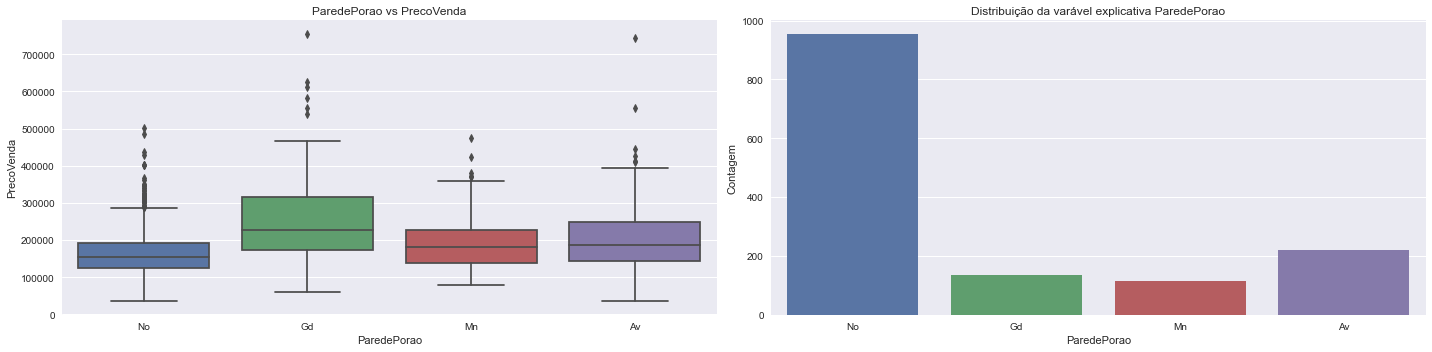

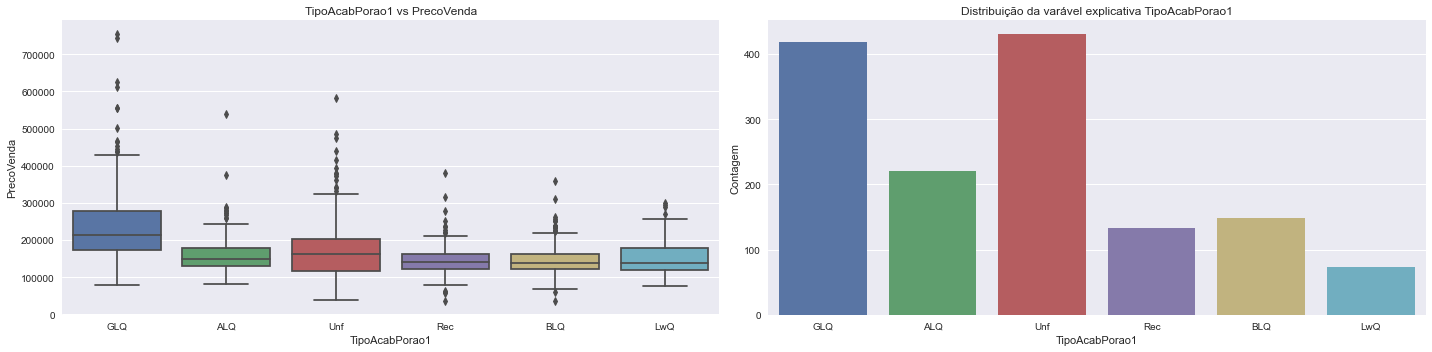

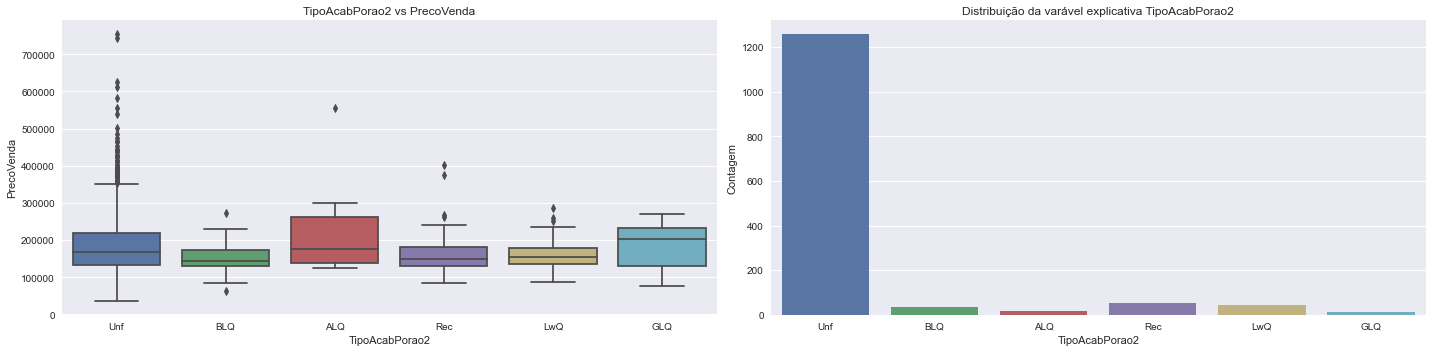

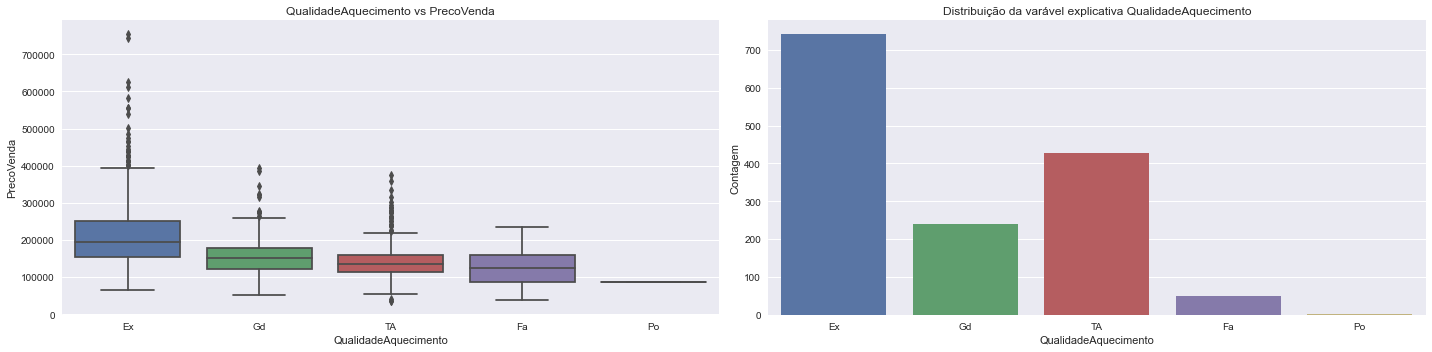

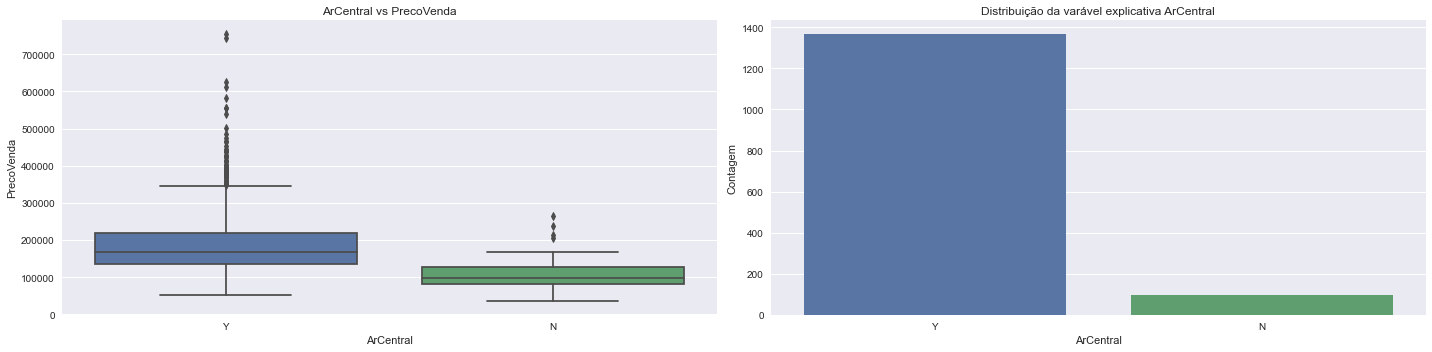

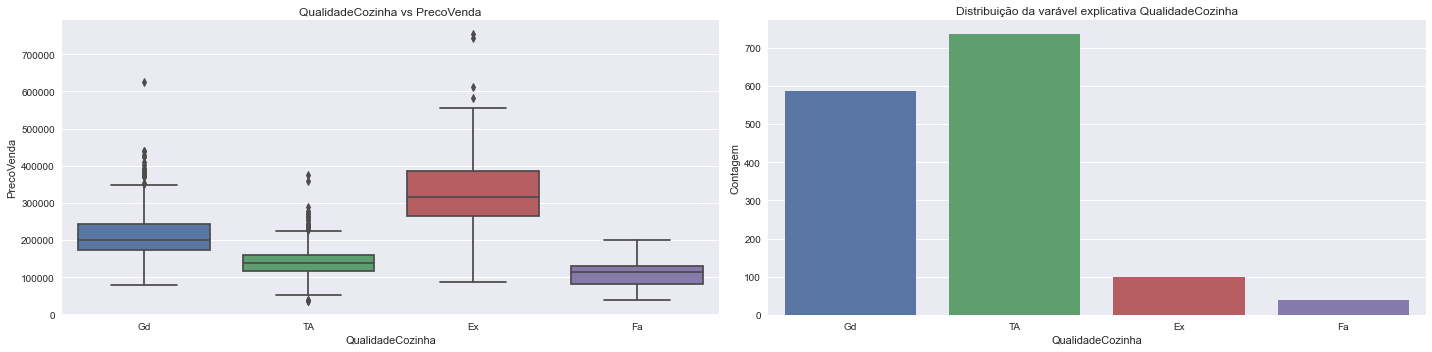

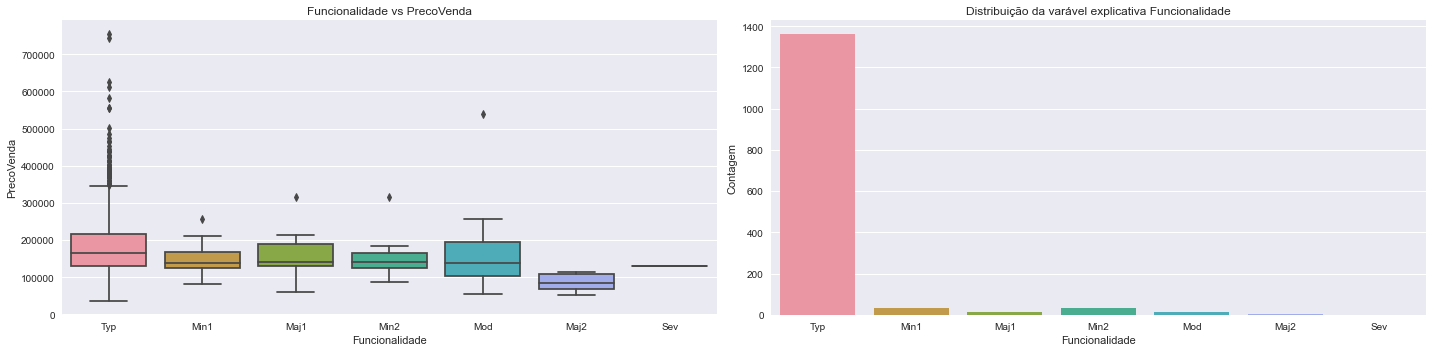

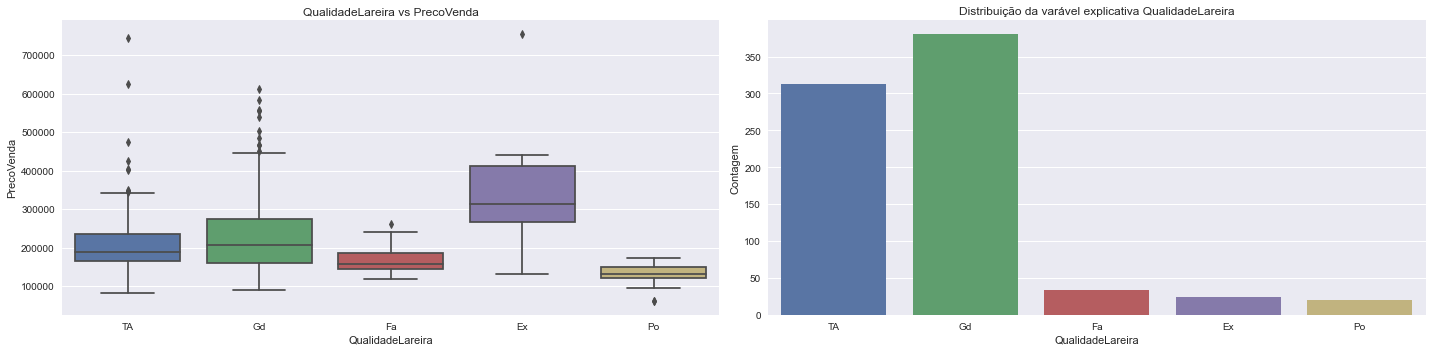

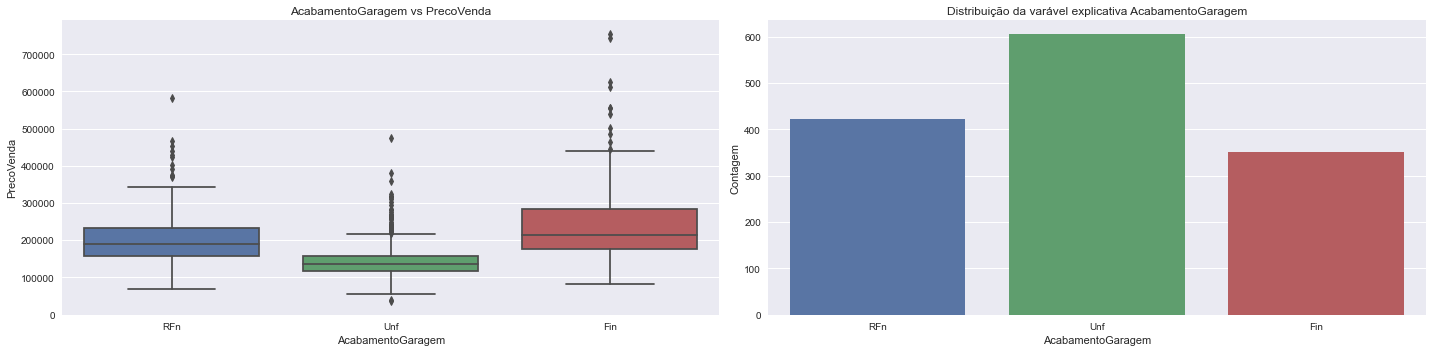

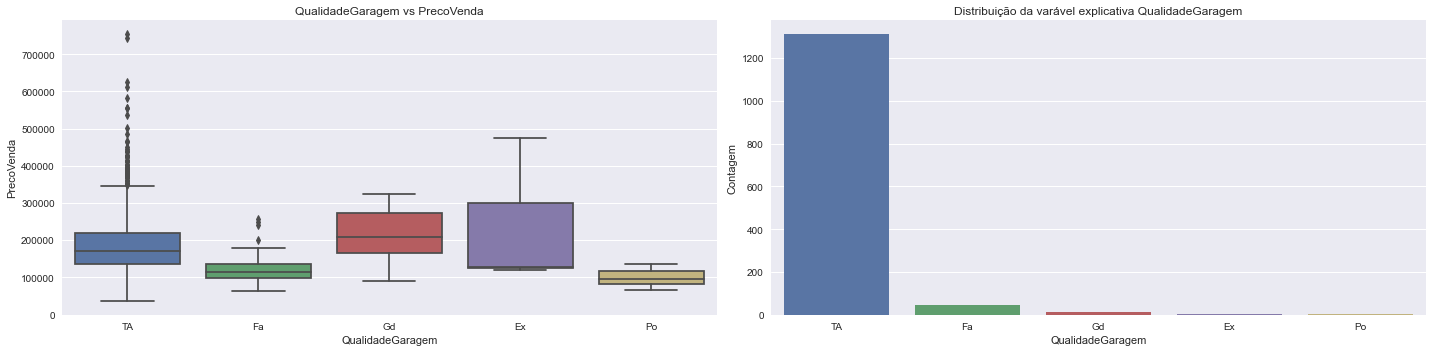

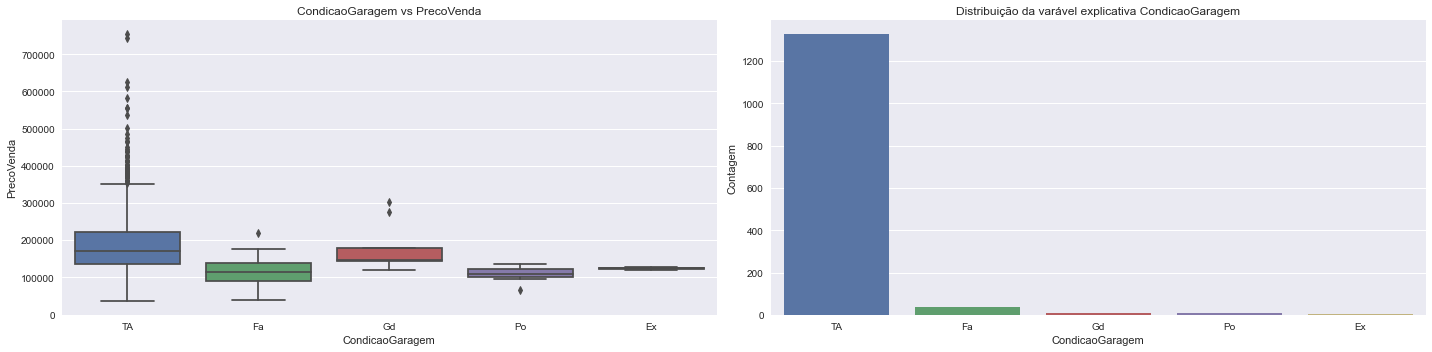

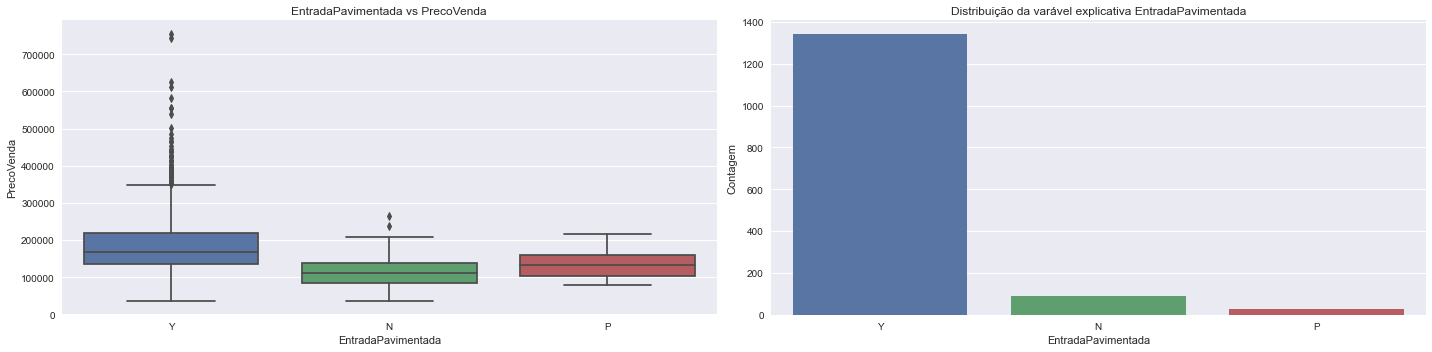

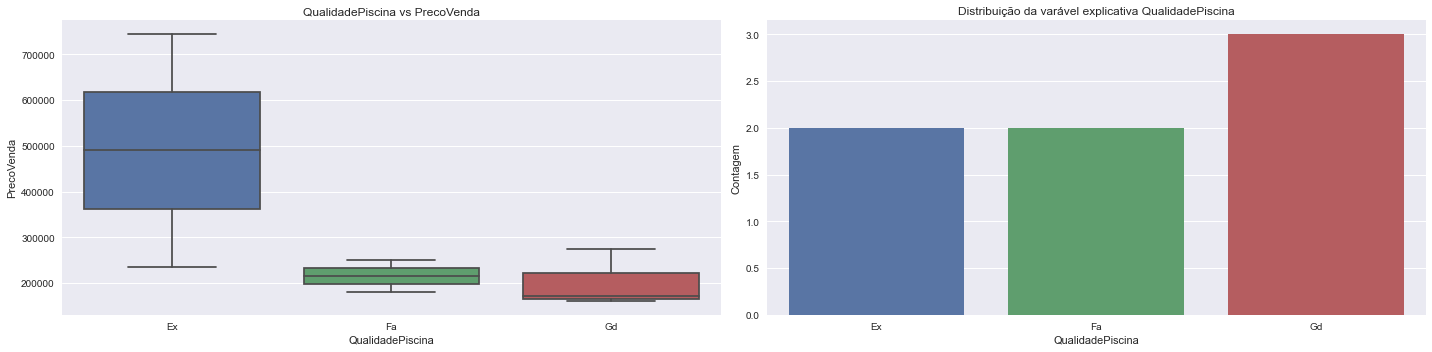

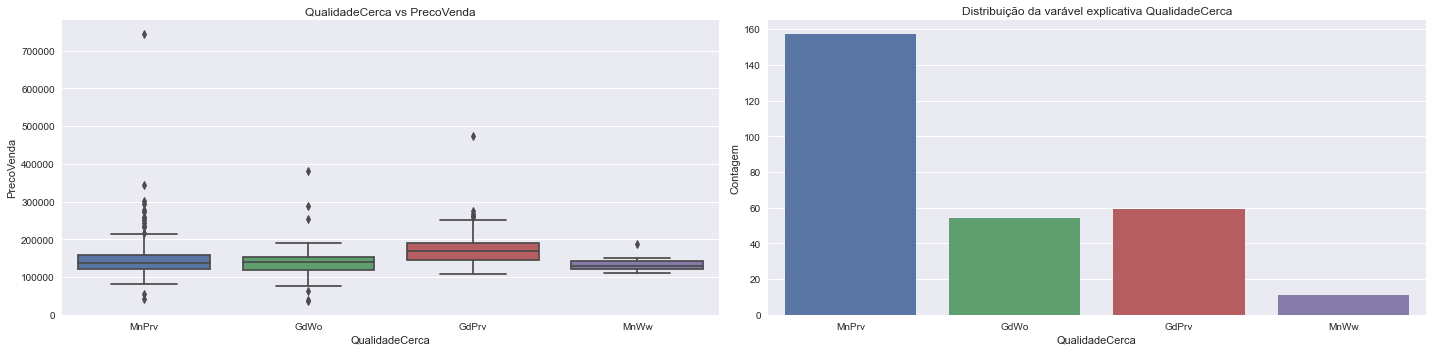

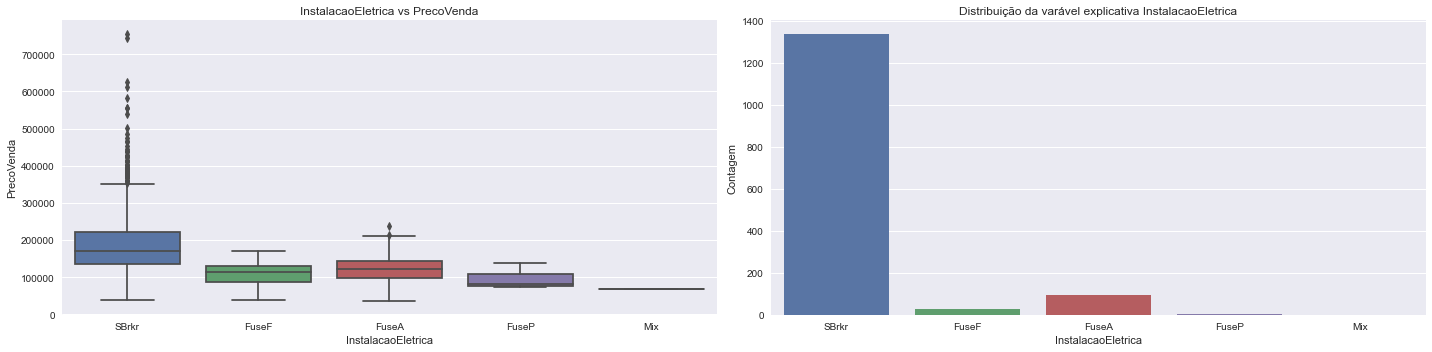

In [16]:
for variavel_explicativa in var_continua:
    reg_hist_plot(df_raw, variavel_explicativa, 'PrecoVenda')
for variavel_explicativa in var_discreta:
    box_hist_plot(df_raw, variavel_explicativa, 'PrecoVenda')
for variavel_explicativa in var_nominal:
    box_count_plot(df_raw, variavel_explicativa, 'PrecoVenda')
for variavel_explicativa in var_ordinal:
    box_count_plot(df_raw, variavel_explicativa, 'PrecoVenda')

Destes gráficos, é possível compreender a distribuição da feature explicativa e sua relação com o target, sendo possível identificar as features numéricas que tem maior correlação com o preço de venda, e também entender quais features categóricas tem uma distribuição e relação com o preço, de forma que tenha maior impacto quando se altera a categoria e também maior importância na predição, uma vez que features que sejam muito concentradas em uma única categoria não seriam boas para explicar o comportamento geral das observações.

É importante observar que existem diversas features numéricas que podem ser utilizadas para criar novas features para a regressão. Além disso, muitas aparentam ter um comportamento muito assimétrico. Ainda, na dispersão da AreaConstruida e PrecoVenda é possível notar duas observações que se comportam muito fora do padrão, com uma área superior a 4500 e um preço de venda inferior a 200000. Pode ser interessante tratá-los como outliers e removê-los dos dados de treino em etapas futuras.

## 5. Modelo com interpretabilidade <a name="interpretabilidade"></a>

Nesta etapa, temos como objetivo desenvolver um modelo de regressão linear com até 6 variáveis explicativas e explorar as suposições de um modelo linear, buscando interpretabilidade. Para isso, utilizaremos a biblioteca StatsModels, que fornece diversas informações sobre a regressão realizada em um pequeno relatório.

Iremos explorar os seguintes pontos, para verificar as suposições da regressão:
- Coeficiente de Determinação R² e R² Ajustado
- Significância estatística do modelo
- Relação linear nos parâmetros
- Significância estatística para as variáveis explicativas 
- Normalidade dos resíduos
- Variância constante (linearidade e homocedasticidade)
- Observações são independentes entre si, isto é, sem correlação serial
- Ausência de multicolinearidade ente as variáveis explicativas

Uma vez que estamos buscando um modelo que possibilite interpretabilidade nos dados, vamos seleciona apenas as observações em que a condição de venda é normal, evitando assim modelar situação em que, por exemplo, é feita uma venda parcial de uma casa, de modo que o valor de venda encontrado não será coerente com os demais atributos da mesma numa situação de venda normal.

In [17]:
df_model = df_raw[df_raw['CondicaoVenda'] == 'Normal'].copy()

#### Seleção de variáveis e processamento das mesmas

As variáveis foram selecionadas com base no EDA, tentando evitar a multicolinearidade, ao mesmo tempo de garantir um R² Ajustado mínimo de 75%. 

Será necessário um rápido pré processamento das variáveis. <br>
Iniciaremos convertendo certas variáves ordinais em valores de ordem crescente.

In [18]:
ordinal_col_dicts = {
    'QualidadeAquecimento': {'Ex': 5, 'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1},
    'QualidadeCozinha': {'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2,'Po':1},
    'QualidadeCobertura':{'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2,'Po':1},
    'FormaProp': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}
}

In [19]:
df_model = df_model.replace(ordinal_col_dicts)

Uma vez que há diferentes informações que indicam a qualidade do imóvel, criaremos uma interação entre as principais features de qualidade. A fins de interpretação, o valores serão reduzidos em base 10, de modo a obter valores entre 0 e 10. 

In [20]:
df_model['QualidadeGeral'] = (df_model['QualidadeAquecimento']*df_model['Qualidade']*
                              df_model['Condicao']*df_model['QualidadeCozinha']*df_model['QualidadeCobertura'])

In [21]:
df_model['QualidadeGeral'].max()

9000

In [22]:
df_model['QualidadeGeral'] = df_model['QualidadeGeral']/1000

No dataset está discriminado lavados e banheiros, separando-os também se estão ou não no porão. Neste caso, iremos uní-los em uma única variável e verificar a quantidade de banheiros totais existentes para cada quarto.

In [23]:
df_model['BanheiroLavabo'] = (df_model['Lavabo']+df_model['BanheiroPorao']+df_model['Banheiro'])

In [24]:
df_model['BanheirosPorQuarto'] = df_model['BanheiroLavabo']/df_model['TotalQuartos']

Por fim, criaremos uma nova feature que relaciona a área do terreo e a quantidade de cozinhas, visto que percebemos que uma grande quantidade de cozinhas pode ser prejudicial e, usualmente, elas se encontram no terreo da casa, estaremos penalizando as casas com muitas cozinhas, mesmo que tenham uma área grande.

In [25]:
df_model['AreaTerreoPorCozinha'] = (df_model['AreaTerreo'])/(df_model['Cozinha'])

Desta forma, as variáveis selecionadas foram:
- QualidadeGeral: Feature que representa a qualidade geral, unindo diferentes informações da qualidade do imóvel
- BanheirosPorQuarto: Relação entre a quantidade total de banheiros e quartos 
- AreaTerreoPorCozinha: Relação entre a área do térreo e o número de cozinhas no imóvel, penalizando aquelas com diversas cozinhas
- AreaGaragem: Área disponível na garagem
- FormaProp: Forma da propriedade
- Lareira: Quantidade de lareiras

In [26]:
variaveis = ['QualidadeGeral', 'BanheirosPorQuarto', 'AreaTerreoPorCozinha', 'AreaGaragem', 'FormaProp', 'Lareira']
target = 'np.log(PrecoVenda)'
formula = target + ' ~ ' + ' + '.join(variaveis)

In [27]:
df_model['log_PrecoVenda'] = np.log(df_model['PrecoVenda'])

Antes de iniciar, vamos verificar a correlação entre as variáveis selecionadas e nosso target, assim como a correlação entre elas, verificando possíveis multicolinearidades.

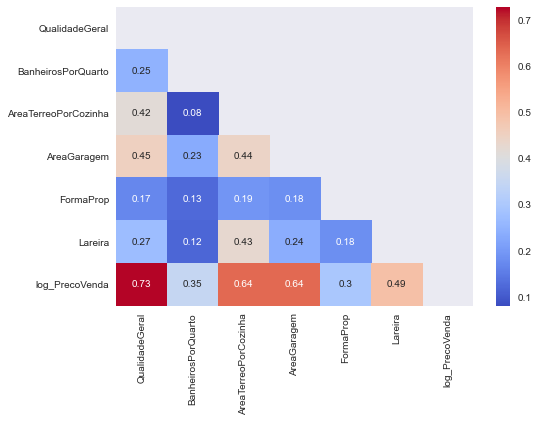

In [28]:
corr = df_model[variaveis+['log_PrecoVenda']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

Como desejado, pode-se observar que as features tem uma correlação significativa com a variável target (log do preço de venda) e uma menor correlação entre si.

#### Linearidade entre variável e target

Verificaremos também visualmente a correlaçã linear procurada entre features e target.

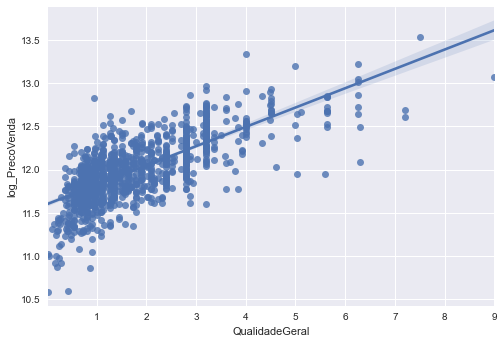

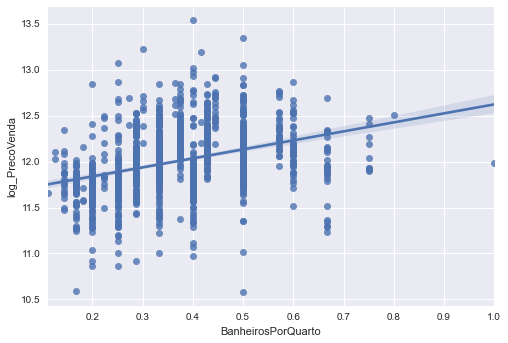

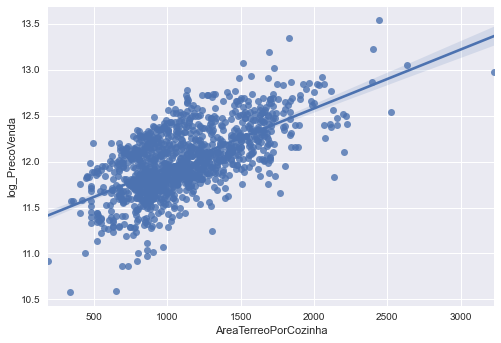

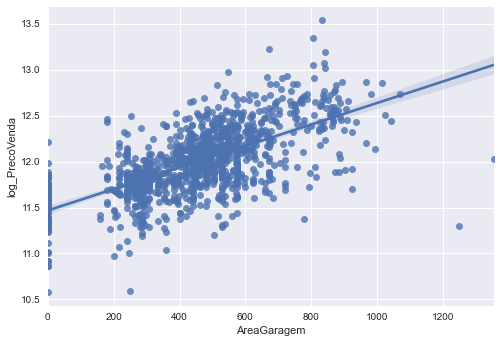

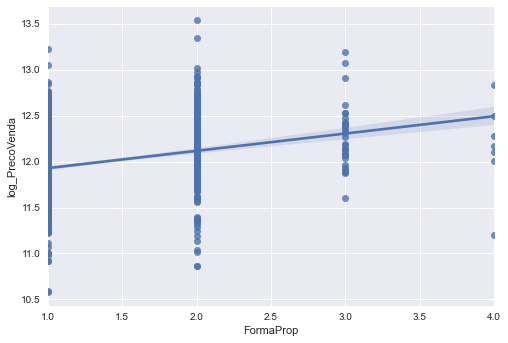

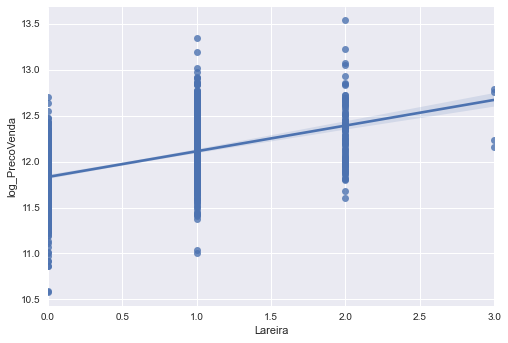

In [29]:
for variavel in variaveis:
    plt.figure()
    sns.regplot(data=df_model, y='log_PrecoVenda', x=variavel)
    plt.show()

#### Modelagem

Através da biblioteca StatsModel é possível modelar a regressão linear e realizar a investigação e diagnóstico dela.

In [30]:
print('Formula: ', formula)
modelo = smf.ols(formula = formula, data = df_model)
modelo_fit = modelo.fit()
modelo_fit.summary()

Formula:  np.log(PrecoVenda) ~ QualidadeGeral + BanheirosPorQuarto + AreaTerreoPorCozinha + AreaGaragem + FormaProp + Lareira


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(PrecoVenda)   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     703.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:35:17   Log-Likelihood:                 408.72
No. Observations:                1198   AIC:                            -803.4
Df Residuals:                    1191   BIC:                            -767.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.0096      0.023    486.382      0.000      10.965      11.054
QualidadeGeral           0.1279      0.005     25.733      0.000       0.118       0.138
BanheirosPorQuarto       0.3826      0.040      9.602      0.000       0.304       0.461
AreaTerreoPorCozinha     0.0003    1.7e-05     14.707      0.000       0.000       0.000
AreaGaragem              0.0005      3e-05     15.023      0.000       0.000       0.001
FormaProp                0.0521      0.009      5.840      0.000       0.035       0.070
Lareira                  0.1041      0.009     12.058      0.000       0.087       0.121
==============================================================================
Omnibus:                       75.598   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.451
Skew:                          -0.441   Prob(JB):                     3.17e-31
Kurtosis:                       4.427   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Relatório StatsModel

O relatório do StatsModel já fornece algumas dados a respeito das suposições.

- Coeficiente de Determinação R² e R² Ajustado
    - R²: 0.780
    - R² Ajustado: 0.779

- Modelo com significância estatística
    - F-statistic tem um p-valor de 0, rejeitando a hipótse nula de não significância, então entende-e que os coeficientes são conjuntamente significativos.
- Significância estatística para as variáveis explicativas
    - Todas as variáveis tem um p-valor de 0
- Independência das observações
    - Durbin-Watson: Próximo de 2, evidência para ausência de autocorrelação das observações, sendo assim indepedentes
- Normalidade dos resíduos
    - Omnibus: possui um p-valor 0, rejeitando a normalidade dos resíduos
    - Jarque-Bera: Assim como no Omnibus, um p-valor de 0 rejeita a normalidade
    - Skew (Assimetria): Negativo, não sendo perfeitamente simetrico
    - Kurtosis: Numa distribuição normal, o curtose é próximo de 3, e neste caso foi de 4.42
    - Assim, rejeita-se a normalidade dos resíduos. 
    - Vamos também visualizar graficamente os resíduos em um QQPLot, assim como aplicar um teste de Shapiro-Wilk de normalidade dos mesmos

#### Normalidade dos resíduos

In [31]:
residuos = modelo_fit.resid
y_pred = modelo_fit.fittedvalues

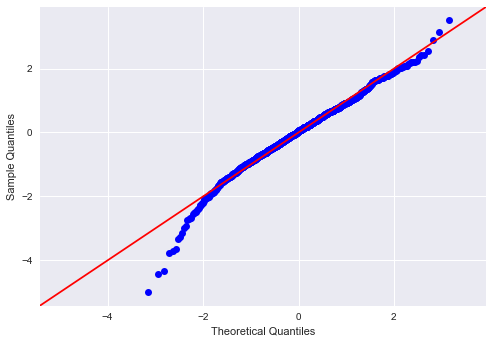

Statistics=0.985, p=0.000
A distribuição dos resíduos não parece com Gaussiana (rejeita H0)


In [32]:
sm.qqplot(residuos , line="45", fit=True, dist=stats.norm)
plt.show()

#Teste Shapiro-Wilk
stat, p = shapiro(residuos)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:print('A distribuição dos resíduos parece com Gaussiana (não rejeita H0)')
else:print('A distribuição dos resíduos não parece com Gaussiana (rejeita H0)')

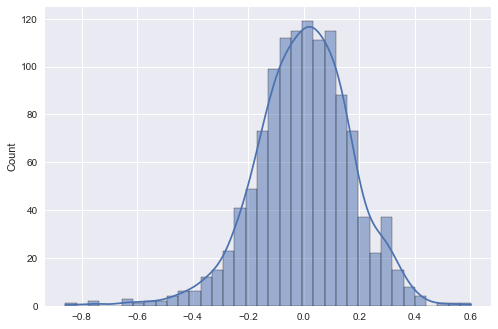

In [33]:
sns.histplot(residuos, kde=True)
plt.show()

Apesar de possuir um formato similar a um sino, ele não é uma gaussiana, tendo uma clara assimetria à esquerda.

#### Linearidade e Homocedasticidade

Aqui avaliaremos visualmente e através dos testes de Breush-Pagan, Goldfeld-Quandt e White.

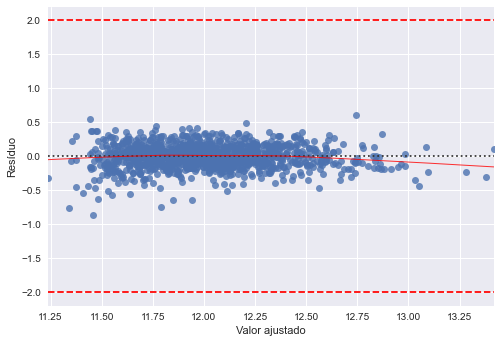

In [34]:
sns.residplot(x=y_pred, y=residuos, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, color = 'r', linestyle='--')
plt.axhline(y = -2, color = 'r', linestyle='--')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

Visualmente podemos observar que os resíduos tem uma tendência de maior variância para valores ajustados extremos (altos e baixos). Verificaremos isso através dos seguintes testes:

- Breush-Pagan
    - Testa se os erros quadrados tem relação com os regressores. Estatística F da hipótese é a de que a variância do erro não depende dos regressor. Para garantir a linearidade e homocedasticidade a hipótese nula não pode ser rejeitada.
    
- Goldfeld-Quandt
    - Testa a hipótese nula de que a variância entre duas amostras são diferentes. Assim, para a homocedasticidade é necessário rejeitar a hipótese nula.
    
- White
    - Testa a mesma hipóteses do Breusch-Pagan, logo, a homocedasticidade não rejeitaria a hipótese nula.

In [35]:
#Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()


[('Breusch pagan statistic', 21.636977125594292), ('p-value', 0.0014085822270301783)]

[('Goldfeld-Quandt - statistic', 0.9543378385297778), ('p-value', 0.7150914290858532)]

[('White’s statistic', 151.92678243185253), ('p-value', 2.294679113445638e-19)]



Com base nos resultados, os resíduos não apresentam linearidade e homocedasticidade, existindo dependência entre resíduo com a observação.

#### Multicolinearidade

Para a multicolinearidade calcula-se o Variance Inflation Factor (VIF), com a seguinte interpretação:

- VIF > 10: Fortemente correlacionadas, sendo necessário eliminar uma delas do modelo ou considerar a interação entre elas
- 5 < VIF < 10: Moderadamente correlacionadas
- 1 < VIF < 5: Não são correlacionadas ou fracamente correlacionadas

In [36]:
def calc_vif(df):
  """ 
    Variable Inflation Factors
    VIF determines the strength of the correlation between the independent variables. 
    It is predicted by taking a variable and regressing it against every other variable.
  """
  # Calculating VIF
  vif = pd.DataFrame()
  vif["Variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return(vif)

In [37]:
vif = calc_vif(df_model[variaveis])
vif

Variables        VIF
0        QualidadeGeral   4.604027
1    BanheirosPorQuarto   7.185516
2  AreaTerreoPorCozinha  11.689103
3           AreaGaragem   8.982416
4             FormaProp   6.433320
5               Lareira   2.337173

Assim, apesar de termos selecionado features que entre si não possuem uma alta correlação, a AreaTerreoPorCozinha apresentava uma correlação relevante (em torno de 0.43) com outras três features, de forma que numa análise de VIF resulte em uma feature fortemente correlacionada com as demais.

#### Detecção de Outliers

Podemos ainda verificar se existem outliers e pontos de alavancagem nos dados, através de algumas análises.

Começaremos por uma análise da Distância de Cook, onde caso exista uma distância mais de 1, podemos considerar um outlier que deveria ser eliminado da modelagem.

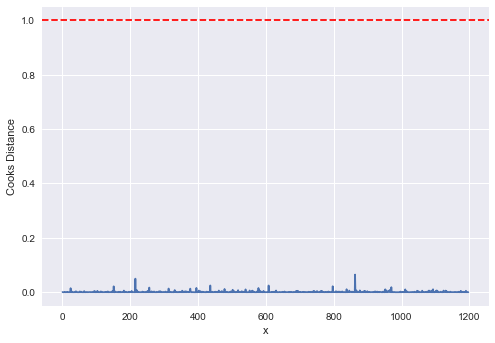

In [38]:
influence = modelo_fit.get_influence()

cooks = influence.cooks_distance

plt.plot(cooks[0])
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
list_cooks = df_model[cooks[0]>1].index.to_list()

Outra análise pode ser feita através dos Resíduos estudentizados, onde resíduos que resultem em valores maiores que 3 ou menores que -3 também deveriam ser removidos.

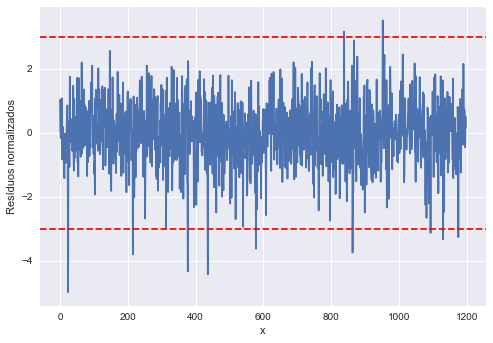

In [40]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.axhline(y = 3, color = 'r', linestyle = '--')
plt.axhline(y = -3, color = 'r', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Resíduos normalizados')
plt.show()

In [41]:
list_influence = df_model[abs(influence.resid_studentized_internal)>=3].index.to_list()

Podemos ver que existem algumas observações que são identificadas como outliers influentes, com base nessas análises. Assim, iremos removê-los do dataset e refitar o modelo para verificar se há uma melhora.

In [42]:
list_influence + list_cooks

[30, 264, 462, 533, 710, 1030, 1061, 1169, 1337, 1380, 1432]

In [43]:
df_model.drop(labels=(list_influence + list_cooks), axis=0, inplace = True)

#### Nova Modelagem

Realizando a mesma modelagem, com mesmas features, após remoção dos outliers identificados anteriormente.

In [44]:
modelo = smf.ols(formula = formula, data = df_model)
modelo_fit = modelo.fit()
modelo_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(PrecoVenda)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     756.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:35:18   Log-Likelihood:                 485.60
No. Observations:                1187   AIC:                            -957.2
Df Residuals:                    1180   BIC:                            -921.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.0296      0.021    517.187      0.000      10.988      11.071
QualidadeGeral           0.1239      0.005     26.576      0.000       0.115       0.133
BanheirosPorQuarto       0.3642      0.037      9.722      0.000       0.291       0.438
AreaTerreoPorCozinha     0.0002    1.6e-05     15.079      0.000       0.000       0.000
AreaGaragem              0.0005   2.86e-05     15.782      0.000       0.000       0.001
FormaProp                0.0590      0.008      6.983      0.000       0.042       0.076
Lareira                  0.1019      0.008     12.602      0.000       0.086       0.118
==============================================================================
Omnibus:                        4.609   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.481
Skew:                          -0.141   Prob(JB):                        0.106
Kurtosis:                       3.106   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Relatório StatsModel

- Coeficiente de Determinação R² e R² Ajustado
    - R²: 0.794
    - R² Ajustado: 0.793
    - Melhora da performance em explicar o dataset em comparação com a modelagem pré retirada de outliers

- Modelo com significância estatística
    - F-statistic tem um p-valor de 0, novamente rejeitando a hipótse nula de não significância
- Significância estatística para as variáveis explicativas
    - Todas as variáveis tem um p-valor de 0
- Independência das observações
    - Durbin-Watson: Próximo de 2, evidência para ausência de autocorrelação das observações, sendo assim indepedentes
- Normalidade dos resíduos
    - Omnibus: possui um p-valor maior que 0.05, não rejeitando a normalidade dos resíduos
    - Jarque-Bera: Assim como no Omnibus, um p-valor maior que 0.05 não rejeita a normalidade
    - Skew (Assimetria): Próximo de 0, podendo assumir simetria
    - Kurtosis: Curtose próxima de 3
    - Assim, os resíduos apresentam uma distribuição similar à normalidade após retirada de outliers
    - Novamente, vamos também visualizar graficamente os resíduos em um QQPLot, assim como aplicar um teste de Shapiro-Wilk de normalidade dos mesmos

#### Normalidade dos resíduos

In [45]:
residuos = modelo_fit.resid
y_pred = modelo_fit.fittedvalues

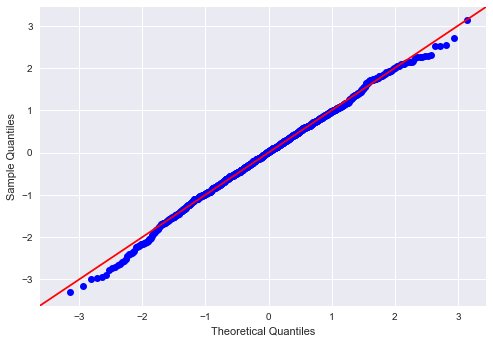

Statistics=0.997, p=0.058
A distribuição dos resíduos parece com Gaussiana (não rejeita H0)


In [46]:
sm.qqplot(residuos , line="45", fit=True, dist=stats.norm)
plt.show()

#Teste Shapiro-Wilk
stat, p = shapiro(residuos)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('A distribuição dos resíduos parece com Gaussiana (não rejeita H0)')
else:
    print('A distribuição dos resíduos não parece com Gaussiana (rejeita H0)')

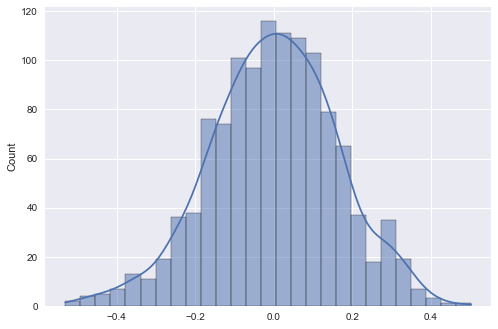

In [47]:
sns.histplot(residuos, kde=True)
plt.show()

Após a limpeza dos outliers vemos que os resíduos passaram a apresentam uma normalidade.

#### Linearidade e Homocedasticidade

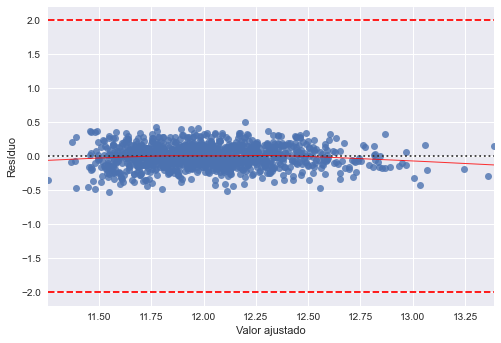

In [48]:
sns.residplot(x=y_pred, y=residuos, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, color = 'r', linestyle='--')
plt.axhline(y = -2, color = 'r', linestyle='--')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

Visualmente podemos observar que, apesar de ainda existir uma tendência de variância nos dados extremos, ela foi reduzida em relação à modelagem anterior.

In [49]:
#Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()

#White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(residuos, modelo_fit.model.exog)
print(lzip(name, test))
print()


[('Breusch pagan statistic', 13.696888752313908), ('p-value', 0.033211570193224245)]

[('Goldfeld-Quandt - statistic', 0.9740620777160512), ('p-value', 0.6247800458181262)]

[('White’s statistic', 115.14662113481938), ('p-value', 7.406885490456287e-13)]



Novamente, com base nos resultados, os resíduos não apresentam linearidade e homocedasticidade, existindo dependência entre resíduo com a observação, infringindo uma das suposição ideias da regressão linear, apesar de visualmente se aproximar desta condição. Não podemos, portanto, dizer que os Estimadores de Mínimos Quadrados são os melhores estimadores de mínima variância para este conjunto de variáveis.

#### Coeficientes

Por fim, é possível ainda interpretar os coeficiêntes da modelagem. Uma vez que para foi aplicado Log em nossa variável de interesse, a interpretação não é tão direta, sendo necessário uma transformação. 

No entanto, ainda podemos interpretar de modo a entender o impacto que terá, percetualmente, na variável resposta, no caso de um aumento de uma unidade na variável explicativa.

In [50]:
#Y ~ 0.02X1 + b2X2 + b3X3
round((np.exp(modelo_fit.params[1:]) - 1)*100, 2)

QualidadeGeral          13.19
BanheirosPorQuarto      43.94
AreaTerreoPorCozinha     0.02
AreaGaragem              0.05
FormaProp                6.08
Lareira                 10.72
dtype: float64

Um aumento de uma unidade na variável, mantendo as demais constantes, impacta:
- `QualidadeGeral`: 13.19% de aumento no preço de venda
- `BanheirosPorQuarto`: 43.94% de aumento no preço de venda (isso se dá visto que o dado varia entre 0 e 1).
- `AreaTerreoPorCozinha`: 0.02% de aumento no preço de venda (como estamos tratando dados não normalizados, um aumento de 1 unidade na área tem muito pouco impacto, visto que o valor pode passar de 3000)
- `AreaGaragem`: 0.05% de aumento no preço de venda (como estamos tratando dados não normalizados, um aumento de 1 unidade na área tem muito pouco impacto, visto que o valor pode passar de 1000)
- `FormaProp`: 6.08% de aumento no preço de venda
- `Lareira`: 10.72% de aumento no preço de venda

Modelagens desta forma permitem boa interpretabilidade, de modo que o time de negócios possa comprender e fazer uso para explicar o preço de imóveis para clientes, por exemplo, utilizando características do imóvel para embasamento.

## 6. Preprocessamento de Dados <a name="datacleaning"></a>

Esta etapa será dividia entre: 
- Remoção de outliers
- Tratamento da variável target
- Preenchimento de valores faltantes
- Criação de variáveis interessantes
- Remoção de variáveis
- Encode das variáveis categóricas ordinais

In [51]:
df_processed = df_raw.copy()

### Remoção de Outliers

Removeremos dois claros outliers identificados anteriormente, em que o preço de venda foi inferior à 300.000 para áreas construídas superiores a 4000. <br>
Uma vez que queremos generalizar e ser capaz de prever a maior parte dos casos, não limitaremos as transações às do tipo normal.

In [52]:
df_processed[(df_processed['PrecoVenda']<300000)&(df_processed['AreaConstruida']>4000)]

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco  \
523    524            60         RL    130.0        40094  Pave  NaN   
1298  1299            60         RL    313.0        63887  Pave  NaN   

     FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1  \
523        IR1       Bnk   AllPub     Inside            Gtl  Edwards     PosN   
1298       IR3       Bnk   AllPub     Corner            Gtl  Edwards    Feedr   

     Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  \
523      PosN          1Fam          2Story         10         5   
1298     Norm          1Fam          2Story         10         5   

      AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1  \
523            2007        2008         Hip         CompShg   CemntBd   
1298           2008        2008         Hip         ClyTile    Stucco   

     Exterior2 TipoAlvenaria  AreaAlvenaria QualidadeCobertura  \
523    CmentBd         Stone          762.0                 Ex   
1298    Stucco         Stone          796.0                 Ex   

     CondicaoExterna TipoFundacao AlturaPorao CondicaoPorao ParedePorao  \
523               TA        PConc          Ex            TA          Gd   
1298              TA        PConc          Ex            TA          Gd   

     TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  AreaAcabPorao2  \
523             GLQ            2260            Unf               0   
1298            GLQ            5644            Unf               0   

      AreaInacabPorao  AreaPorao Aquecimento QualidadeAquecimento ArCentral  \
523               878       3138        GasA                   Ex         Y   
1298              466       6110        GasA                   Ex         Y   

     InstalacaoEletrica  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  \
523               SBrkr        3138        1538                   0   
1298              SBrkr        4692         950                   0   

      AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  Lavabo  Quartos  \
523             4676              1            0         3       1        3   
1298            5642              2            0         2       1        3   

      Cozinha QualidadeCozinha  TotalQuartos Funcionalidade  Lareira  \
523         1               Ex            11            Typ        1   
1298        1               Ex            12            Typ        3   

     QualidadeLareira LocalGaragem  AnoGaragem AcabamentoGaragem  \
523                Gd      BuiltIn      2007.0               Fin   
1298               Gd       Attchd      2008.0               Fin   

      CarrosGaragem  AreaGaragem QualidadeGaragem CondicaoGaragem  \
523               3          884               TA              TA   
1298              2         1418               TA              TA   

     EntradaPavimentada  AreaDeck  AreaVarandaAberta  AreaVarandaFechada  \
523                   Y       208                406                   0   
1298                  Y       214                292                   0   

      AreaVaranda3Estacoes  AreaAlpendre  AreaPiscina QualidadePiscina  \
523                      0             0            0              NaN   
1298                     0             0          480               Gd   

     QualidadeCerca Outros  ValorOutros  MesVenda  AnoVenda TipoVenda  \
523             NaN    NaN            0        10      2007       New   
1298            NaN    NaN            0         1      2008       New   

     CondicaoVenda  PrecoVenda  
523        Partial      184750  
1298       Partial      160000

In [53]:
df_processed.drop(df_processed[(df_processed['PrecoVenda']<300000)&(df_processed['AreaConstruida']>4000)].index,
                  inplace=True)

### Tratamento da variável Target

Assim como na modelagem anterior, utilizaremos o log do preço de venda para a modelagem preditiva.

In [54]:
df_processed['PrecoVenda'] = np.log(df_processed['PrecoVenda'])

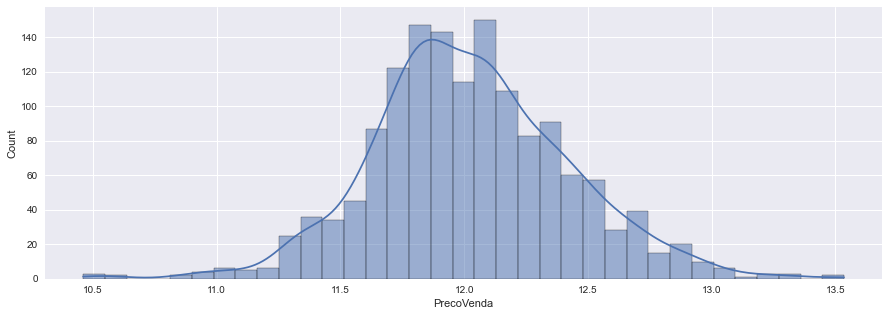

In [55]:
fig, eixo = plt.subplots(figsize=(15,5)) 
sns.histplot(df_processed['PrecoVenda'], kde=True)
plt.show()

### Valores Faltantes

In [56]:
find_missing(df_processed)

ColumnName  TotalMissing  PercentMissing
0     QualidadePiscina        1452.0           99.59
1               Outros        1404.0           96.30
2                 Beco        1367.0           93.76
3       QualidadeCerca        1177.0           80.73
4     QualidadeLareira         690.0           47.33
5              Fachada         259.0           17.76
8    AcabamentoGaragem          81.0            5.56
10        LocalGaragem          81.0            5.56
9           AnoGaragem          81.0            5.56
7      CondicaoGaragem          81.0            5.56
6     QualidadeGaragem          81.0            5.56
11      TipoAcabPorao2          38.0            2.61
12         ParedePorao          38.0            2.61
13         AlturaPorao          37.0            2.54
14       CondicaoPorao          37.0            2.54
15      TipoAcabPorao1          37.0            2.54
16       TipoAlvenaria           8.0            0.55
17       AreaAlvenaria           8.0            0.55
18  InstalacaoEletrica           1.0            0.07

De acordo com o dicionário de variáveis, temos que alguns dos missing values são, na realidade, a informação de que esta variável não é aplicável, isso é, não existe piscina, beco, cerca, lareira, porão, etc, na propriedade. Assim, pare estes casos, preencheremos com 'None'. Além disso, em outras, quando o dado estiver faltando a informação numérica associada seria 0. O AnoGaragem será definido como 0 para as propriedades sem garagem.

Neste caso, para simplificar, criarei uma função apenas para as variáveis que sabemos possuírem valores faltando. Numa situação real seria necessário desenvolver uma solução robusta para qualquer variável faltante possível, que poderia existir nos dados desconhecidos.

Como há apenas um dado faltando na nossa variável InstalacaoEletrica, irei imputar a moda desta coluna para preenchê-lo. Num caso real, isso seria feito apenas utilizando as informações do dataset de treino, no entanto, uma vez que temos uma enorme disparidade entre o dado mais comum e o restante, indepentende da divisão a moda será "SBrkr".

In [57]:
df_processed['InstalacaoEletrica'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: InstalacaoEletrica, dtype: int64

Como temos 259 valores faltantes no dataset para a variável Fachada, iremos fazer o imput após a divisão entre treino e teste, utilizando a mediana do dado do dataset de treino.

In [58]:
def mediana_fachada(df):
    return df['Fachada'].median()

In [59]:
def filling_missing(df, mediana_fachada):
    Cat_columns_fill = ['QualidadeCerca', 'QualidadeLareira', 'LocalGaragem', 
                       'AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem', 'ParedePorao', 'TipoAcabPorao2', 
                       'TipoAcabPorao1', 'CondicaoPorao', 'AlturaPorao', 'TipoAlvenaria']
    Num_columns_fill = ['AreaAlvenaria', 'AnoGaragem']
    
    df[Cat_columns_fill] = df[Cat_columns_fill].fillna('None')
    df[Num_columns_fill] = df[Num_columns_fill].fillna(0)
    
    df['InstalacaoEletrica'] = df['InstalacaoEletrica'].fillna('SBrkr')
    
    df['Fachada'] = df['Fachada'].fillna(mediana_fachada)
    
    return df

### Criação de variáveis interessantes

Nesta etapa criaremos também outras features que podem ser interessantes para aprimorar o poder preditivo:
- Log das features que tem alta assimetria
- Converter variáveis relacionadas ao ano (de construção, reforma e de construção da garagem) em idade
- Quadrado das features de área
- Fração entre as features 'Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira' e 'CarrosGaragem' e a feature 'AreaConstruida'

In [60]:
skew_features = df_processed[var_continua+var_discreta].apply(lambda x: skew(x)).sort_values(ascending=False)

In [61]:
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index.tolist()

In [62]:
skew_index

['ValorOutros',
 'AreaPiscina',
 'TamanhoLote',
 'AreaVaranda3Estacoes',
 'BaixaQualiAreaAcab',
 'Cozinha',
 'AreaAcabPorao2',
 'AreaAlpendre',
 'LavaboPorao',
 'AreaVarandaFechada',
 'AreaVarandaAberta',
 'AreaDeck',
 'AreaConstruida',
 'AreaInacabPorao',
 'AreaTerreo',
 'Area2Andar',
 'AreaAcabPorao1',
 'Condicao',
 'Lavabo',
 'TotalQuartos',
 'Lareira',
 'BanheiroPorao',
 'AreaPorao']

In [63]:
area_features = [var for var in var_continua if 'area' in var.lower()]
area_squared =[var + '_squared' for var in area_features]

In [64]:
area_features

['AreaAlvenaria',
 'AreaAcabPorao1',
 'AreaAcabPorao2',
 'AreaInacabPorao',
 'AreaPorao',
 'AreaTerreo',
 'Area2Andar',
 'BaixaQualiAreaAcab',
 'AreaConstruida',
 'AreaGaragem',
 'AreaDeck',
 'AreaVarandaAberta',
 'AreaVarandaFechada',
 'AreaVaranda3Estacoes',
 'AreaAlpendre',
 'AreaPiscina']

In [65]:
area_squared

['AreaAlvenaria_squared',
 'AreaAcabPorao1_squared',
 'AreaAcabPorao2_squared',
 'AreaInacabPorao_squared',
 'AreaPorao_squared',
 'AreaTerreo_squared',
 'Area2Andar_squared',
 'BaixaQualiAreaAcab_squared',
 'AreaConstruida_squared',
 'AreaGaragem_squared',
 'AreaDeck_squared',
 'AreaVarandaAberta_squared',
 'AreaVarandaFechada_squared',
 'AreaVaranda3Estacoes_squared',
 'AreaAlpendre_squared',
 'AreaPiscina_squared']

In [66]:
log_features = [var + '_log' for var in skew_index]

In [67]:
log_features

['ValorOutros_log',
 'AreaPiscina_log',
 'TamanhoLote_log',
 'AreaVaranda3Estacoes_log',
 'BaixaQualiAreaAcab_log',
 'Cozinha_log',
 'AreaAcabPorao2_log',
 'AreaAlpendre_log',
 'LavaboPorao_log',
 'AreaVarandaFechada_log',
 'AreaVarandaAberta_log',
 'AreaDeck_log',
 'AreaConstruida_log',
 'AreaInacabPorao_log',
 'AreaTerreo_log',
 'Area2Andar_log',
 'AreaAcabPorao1_log',
 'Condicao_log',
 'Lavabo_log',
 'TotalQuartos_log',
 'Lareira_log',
 'BanheiroPorao_log',
 'AreaPorao_log']

In [68]:
itens = ['Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira', 'CarrosGaragem']
var_sobreArea = []
for iten in itens:
    var_sobreArea.append(iten+'_sobreArea')

In [69]:
var_sobreArea

['Banheiro_sobreArea',
 'Lavabo_sobreArea',
 'TotalQuartos_sobreArea',
 'Lareira_sobreArea',
 'CarrosGaragem_sobreArea']

In [70]:
def new_features(df):
    df['AnosDesdeReforma'] = df['AnoVenda'].astype(int) - df['AnoReforma'].astype(int)
    df['IdadeConstrucao'] = df['AnoVenda'].astype(int) - df['AnoConstrucao'].astype(int)
    df['IdadeGaragem'] = df['AnoVenda'].astype(int) - df['AnoGaragem'].astype(int)
    
    
    area_features = [var for var in var_continua if 'area' in var.lower()]
    df_area_squared = df[area_features].pow(2)
    df_area_squared.columns=[var + '_squared' for var in area_features]
    df = pd.concat([df, df_area_squared], axis=1)

    df_log = np.log1p(df[skew_index])
    df_log.columns=[var + '_log' for var in skew_index]
    df = pd.concat([df, df_log], axis=1)    
    
    itens = ['Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira', 'CarrosGaragem']
    df_itens_over_area = pd.DataFrame()
    for iten in itens:
        df_itens_over_area[iten+'_sobreArea'] = (df[iten])/(df['AreaConstruida'])
    df = pd.concat([df, df_itens_over_area], axis=1)
    
    return df

### Remoção de variáveis

Iremos remover do datasets as variáveis 'QualidadePiscina', 'Outros' e 'Beco', por possuirem mais de 90% dos dados faltantes. Mesmo que possamos assumir que os dados faltantes indicam a ausência de uma piscina ou de um beco, a concentração de dados é grande demais no caso da ausência, sem uma forte correlação que justifique mantê-los. Da mesma forma, removeremos a variável 'ValorOutros' e 'AreaPiscina', com variáveis numéricas associadas às variáveis que removemos.

Removeremos também as variáveis 'Id', assim como 'AnoVenda', uma vez que não queremos avaliar dados especificamente dos anos anteriores, mas entender a previsão dos dados futuros.

Como criamos variáveis com a idade da casa e anos desde a reforma, iremos dropar o ano em que foram feitos.

In [71]:
def drop_features(df):
    drop_cols = ['Id', 'AnoVenda', 'AnoReforma', 'AnoConstrucao', 'AnoGaragem', 'Outros', 'ValorOutros', 
                 'QualidadePiscina', 'AreaPiscina', 'Beco']
    
    return df.drop(columns=drop_cols)

Removeremos também das nossas listas auxiliares as features que não serão utilizadas.

In [72]:
var_nominal.remove('Outros')
var_nominal.remove('Beco')
var_ordinal.remove('QualidadePiscina')
var_continua.remove('AreaPiscina')
var_continua.remove('AnoConstrucao')
var_continua.remove('AnoReforma')
var_continua.remove('AnoGaragem')
var_discreta.remove('AnoVenda')
var_discreta.remove('ValorOutros')
skew_index.remove('AreaPiscina')
skew_index.remove('ValorOutros')
area_squared.remove('AreaPiscina_squared')
log_features.remove('AreaPiscina_log')
log_features.remove('ValorOutros_log')

In [73]:
numerical_features = var_continua + var_discreta + area_squared + var_sobreArea + log_features + \
['AnosDesdeReforma', 'IdadeConstrucao', 'IdadeGaragem']

Finalmente, teremos as seguintes features numéricas:

In [74]:
numerical_features

['Fachada',
 'TamanhoLote',
 'AreaAlvenaria',
 'AreaAcabPorao1',
 'AreaAcabPorao2',
 'AreaInacabPorao',
 'AreaPorao',
 'AreaTerreo',
 'Area2Andar',
 'BaixaQualiAreaAcab',
 'AreaConstruida',
 'AreaGaragem',
 'AreaDeck',
 'AreaVarandaAberta',
 'AreaVarandaFechada',
 'AreaVaranda3Estacoes',
 'AreaAlpendre',
 'Qualidade',
 'Condicao',
 'BanheiroPorao',
 'LavaboPorao',
 'Banheiro',
 'Lavabo',
 'Quartos',
 'Cozinha',
 'TotalQuartos',
 'Lareira',
 'CarrosGaragem',
 'AreaAlvenaria_squared',
 'AreaAcabPorao1_squared',
 'AreaAcabPorao2_squared',
 'AreaInacabPorao_squared',
 'AreaPorao_squared',
 'AreaTerreo_squared',
 'Area2Andar_squared',
 'BaixaQualiAreaAcab_squared',
 'AreaConstruida_squared',
 'AreaGaragem_squared',
 'AreaDeck_squared',
 'AreaVarandaAberta_squared',
 'AreaVarandaFechada_squared',
 'AreaVaranda3Estacoes_squared',
 'AreaAlpendre_squared',
 'Banheiro_sobreArea',
 'Lavabo_sobreArea',
 'TotalQuartos_sobreArea',
 'Lareira_sobreArea',
 'CarrosGaragem_sobreArea',
 'TamanhoLote_log',

### Encode das variáveis categóricas ordinais

As variáveis categóricas ordinais serão transformadas em números.

In [75]:
ordinal_col_dicts = {
    'QualidadeCobertura':{'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'CondicaoExterna': {'TA': 3, 'Gd': 2, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'AlturaPorao' : {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5, 'None':6},
    'CondicaoPorao': {'Fa': 4, 'Gd': 2, 'Po': 5, 'TA': 3,'Ex':1, 'None':6},
    'ParedePorao': {'No': 4, 'Av': 2, 'Gd': 1, 'Mn': 3,'None': 5},
    'TipoAcabPorao1': {'Unf': 6, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'None':7},
    'TipoAcabPorao2': {'Unf': 6, 'Rec': 4, 'LwQ': 5, 'BLQ': 3, 'ALQ': 2, 'GLQ': 1, 'None':7},
    'QualidadeAquecimento': {'Ex': 1, 'TA': 3, 'Gd': 2, 'Fa': 4, 'Po': 5},
    'ArCentral': {'Y': 1, 'N': 2},
    'InstalacaoEletrica': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'QualidadeCozinha': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'Funcionalidade': {'Typ': 1, 'Min2': 3, 'Min1': 2, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8},
    'QualidadeLareira': {'Gd': 2, 'TA': 3, 'Fa': 4, 'Ex': 1, 'Po': 5, 'None': 6},
    'AcabamentoGaragem': {'Unf': 3, 'RFn': 2, 'Fin': 1, 'None':4},
    'QualidadeGaragem': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Ex': 1, 'Po': 5, 'None': 6},
    'CondicaoGaragem': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Po': 5, 'Ex': 1, 'None': 6},
    'EntradaPavimentada': {'Y': 1, 'N': 3, 'P': 2},
    'FormaProp': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Servicos': {'AllPub': 1, 'NoSeWa': 3, 'NoSewr':2, 'ELO':4},
    'InclinacaoLote': {'Gtl': 1, 'Mod': 2, 'Sev': 3}, 
    'QualidadeCerca': {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'None': 5}
}

### Função final para pré-processamento

Além do que foi abordado anteriormente, iremos também modificar os dados de ClasseImovel e de MesVenda para 'str', de modo que sejam tratados como categóricos e não numéricos.

In [76]:
def preprocess(df, treino_teste, mediana):
    df2 = df.copy()
    
    df2['ClasseImovel'] = df2['ClasseImovel'].astype('str')
    df2['MesVenda'] = df2['MesVenda'].astype('str')
    
    if treino_teste =='Treino':
        mediana = mediana_fachada(df2)
        print('A mediana da Fachada o dataset de treino é {}'.format(mediana))
        df2 = filling_missing(df2, mediana)
    else:
        df2 = filling_missing(df2, mediana) 
    
    df2 = new_features(df2)
    
    df2 = drop_features(df2)
    
    df2 = df2.replace(ordinal_col_dicts)
    
    return df2

In [77]:
df_processed.shape

(1458, 81)

### Testando função de pré-processamento

In [78]:
teste = X_train_preprocess = preprocess(df_processed, 'Treino', 0)

A mediana da Fachada o dataset de treino é 69.0


In [79]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 115 entries, ClasseImovel to CarrosGaragem_sobreArea
dtypes: float64(30), int32(3), int64(61), object(21)
memory usage: 1.3+ MB


In [80]:
teste

ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua  FormaProp PlanoProp  \
0              60         RL     65.0         8450  Pave          1       Lvl   
1              20         RL     80.0         9600  Pave          1       Lvl   
2              60         RL     68.0        11250  Pave          2       Lvl   
3              70         RL     60.0         9550  Pave          2       Lvl   
4              60         RL     84.0        14260  Pave          2       Lvl   
...           ...        ...      ...          ...   ...        ...       ...   
1455           60         RL     62.0         7917  Pave          1       Lvl   
1456           20         RL     85.0        13175  Pave          1       Lvl   
1457           70         RL     66.0         9042  Pave          1       Lvl   
1458           20         RL     68.0         9717  Pave          1       Lvl   
1459           20         RL     75.0         9937  Pave          1       Lvl   

      Servicos ConfigLote  InclinacaoLote   Bairro Estrada1 Estrada2  \
0            1     Inside               1  CollgCr     Norm     Norm   
1            1        FR2               1  Veenker    Feedr     Norm   
2            1     Inside               1  CollgCr     Norm     Norm   
3            1     Corner               1  Crawfor     Norm     Norm   
4            1        FR2               1  NoRidge     Norm     Norm   
...        ...        ...             ...      ...      ...      ...   
1455         1     Inside               1  Gilbert     Norm     Norm   
1456         1     Inside               1   NWAmes     Norm     Norm   
1457         1     Inside               1  Crawfor     Norm     Norm   
1458         1     Inside               1    NAmes     Norm     Norm   
1459         1     Inside               1  Edwards     Norm     Norm   

     TipoHabitacao EstiloHabitacao  Qualidade  Condicao TipoTelhado  \
0             1Fam          2Story          7         5       Gable   
1             1Fam          1Story          6         8       Gable   
2             1Fam          2Story          7         5       Gable   
3             1Fam          2Story          7         5       Gable   
4             1Fam          2Story          8         5       Gable   
...            ...             ...        ...       ...         ...   
1455          1Fam          2Story          6         5       Gable   
1456          1Fam          1Story          6         6       Gable   
1457          1Fam          2Story          7         9       Gable   
1458          1Fam          1Story          5         6         Hip   
1459          1Fam          1Story          5         6       Gable   

     MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  AreaAlvenaria  \
0            CompShg   VinylSd   VinylSd       BrkFace          196.0   
1            CompShg   MetalSd   MetalSd          None            0.0   
2            CompShg   VinylSd   VinylSd       BrkFace          162.0   
3            CompShg   Wd Sdng   Wd Shng          None            0.0   
4            CompShg   VinylSd   VinylSd       BrkFace          350.0   
...              ...       ...       ...           ...            ...   
1455         CompShg   VinylSd   VinylSd          None            0.0   
1456         CompShg   Plywood   Plywood         Stone          119.0   
1457         CompShg   CemntBd   CmentBd          None            0.0   
1458         CompShg   MetalSd   MetalSd          None            0.0   
1459         CompShg   HdBoard   HdBoard          None            0.0   

      QualidadeCobertura  CondicaoExterna TipoFundacao  AlturaPorao  \
0                      2                3        PConc            2   
1                      3                3       CBlock            2   
2                      2                3        PConc            2   
3                      3                3       BrkTil            3   
4                      2                3        PConc            2   
...        

A função se mostrou eficiente, logo, passaremos para a modelagem.

## 7. Modelo preditivo <a name="preditivo"></a>

Após processamento das variáveis, definiremos um baseline de performance e avaliaremos diferentes modelos visando minimizar a Raiz do Erro Quadrado Médio (RMSE), assim como faremos uma seleção das variáveis baseado em sua importância.

### Data preparation

In [81]:
df_predict = df_processed.copy()

In [82]:
df_predict.head()

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1            60         RL     65.0         8450  Pave  NaN       Reg   
1   2            20         RL     80.0         9600  Pave  NaN       Reg   
2   3            60         RL     68.0        11250  Pave  NaN       IR1   
3   4            70         RL     60.0         9550  Pave  NaN       IR1   
4   5            60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  \
0          1Fam          2Story          7         5           2003   
1          1Fam          1Story          6         8           1976   
2          1Fam          2Story          7         5           2001   
3          1Fam          2Story          7         5           1915   
4          1Fam          2Story          8         5           2000   

   AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0        2003       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1        1976       Gable         CompShg   MetalSd   MetalSd          None   
2        2002       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3        1970       Gable         CompShg   Wd Sdng   Wd Shng          None   
4        2000       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0        

In [83]:
X = df_predict.drop(['PrecoVenda'], axis=1)
y = df_predict['PrecoVenda']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [85]:
print('X Train shape', X_train.shape)
print('X Test shape', X_test.shape)
print('X Val shape', X_val.shape)

X Train shape (1020, 80)
X Test shape (219, 80)
X Val shape (219, 80)


In [86]:
y_train_real = np.exp(y_train)
y_test_real = np.exp(y_test)
y_val_real = np.exp(y_val)

In [87]:
find_missing(X_train)

ColumnName  TotalMissing  PercentMissing
0     QualidadePiscina        1016.0           99.61
1               Outros         974.0           95.49
2                 Beco         956.0           93.73
3       QualidadeCerca         820.0           80.39
4     QualidadeLareira         467.0           45.78
5              Fachada         179.0           17.55
8     QualidadeGaragem          49.0            4.80
10     CondicaoGaragem          49.0            4.80
9    AcabamentoGaragem          49.0            4.80
7           AnoGaragem          49.0            4.80
6         LocalGaragem          49.0            4.80
11      TipoAcabPorao2          24.0            2.35
12         ParedePorao          24.0            2.35
13         AlturaPorao          23.0            2.25
14       CondicaoPorao          23.0            2.25
15      TipoAcabPorao1          23.0            2.25
16       TipoAlvenaria           6.0            0.59
17       AreaAlvenaria           6.0            0.59
18  InstalacaoEletrica           1.0            0.10

In [88]:
X_train_preprocess = preprocess(X_train, 'Treino', 0)

A mediana da Fachada o dataset de treino é 70.0


In [89]:
X_test_preprocess = preprocess(X_test, 'Teste', 70.0)
X_val_preprocess = preprocess(X_val, 'Teste', 70.0)

In [90]:
find_missing(X_train_preprocess)

Empty DataFrame
Columns: [ColumnName, TotalMissing, PercentMissing]
Index: []

### Encoding das variáveis nominais e scaling das numéricas

Uma vez que queremos avaliar a importância de cada feature no nosso modelo, optamos pelo uso de target encoding, evitando a criação de múltiplas colunas para cada dado categórico. 

In [91]:
scaller = StandardScaler()
target_enc_transformer = TargetEncoder()

In [92]:
X_train_preprocess[var_nominal] = target_enc_transformer.fit_transform(X_train_preprocess[var_nominal], y_train)
X_test_preprocess[var_nominal] = target_enc_transformer.transform(X_test_preprocess[var_nominal])
X_val_preprocess[var_nominal] = target_enc_transformer.transform(X_val_preprocess[var_nominal])

In [93]:
X_train_preprocess[numerical_features] = scaller.fit_transform(X_train_preprocess[numerical_features])
X_test_preprocess[numerical_features] = scaller.transform(X_test_preprocess[numerical_features])
X_val_preprocess[numerical_features] = scaller.transform(X_val_preprocess[numerical_features])

In [94]:
print('X Train shape', X_train_preprocess.shape)
print('X Test shape', X_test_preprocess.shape)
print('X Val shape', X_val_preprocess.shape)
print('X Train shape', y_train.shape)
print('X Test shape', y_test.shape)
print('X Val shape', y_val.shape)

X Train shape (1020, 114)
X Test shape (219, 114)
X Val shape (219, 114)
X Train shape (1020,)
X Test shape (219,)
X Val shape (219,)


### Baseline

Como baseline será utilizado um Random Forest sem otimização de hiperparâmetros.

In [95]:
scores = []

In [96]:
models = []

In [97]:
rf_baseline = RandomForestRegressor(random_state=42)

In [98]:
score_baseline = -np.mean(cross_val_score(rf_baseline, X_train_preprocess, y_train, 
                                          scoring="neg_root_mean_squared_error", cv=10))
score_baseline

0.14246569216606836

In [99]:
scores.append(score_baseline)
models.append('Baseline')

In [100]:
rf_baseline.fit(X_train_preprocess, y_train)

RandomForestRegressor(random_state=42)

### Modelos de Regressão com Hyperparameter tuning

Nesta etapa, diferentes modelos de regressão serão treinados utilizando GridSearch com CV=10. 

Para rodar o código com mais rapidez após a definição dos melhores parâmetros, irei deixar apenas os parâmetros selecionados disponíveis, e as faixas em um comentário no código.

#### Regressão Linear com Regularização

In [101]:
lr = ElasticNet()
param_lr = {'alpha' : [0.0005],
            'l1_ratio' : [1]}

'''{'alpha' : [0.00025, 0.0005, 0.00075, 0.001, 0.00125],
    'l1_ratio' : [0.85, 0.9, 0.95, 0.975, 1]}'''

gs_lr = GridSearchCV(lr, param_lr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_lr.fit(X_train_preprocess, y_train)
print(gs_lr.best_params_)
print(-gs_lr.best_score_)

{'alpha': 0.0005, 'l1_ratio': 1}
0.11363874091445363


In [102]:
scores.append(-gs_lr.best_score_)
models.append('LR')

In [103]:
permutation_result_lr = permutation_importance(gs_lr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_lr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_LR': permutation_result_lr.importances_mean})
importances_lr.set_index('Feature', inplace=True)

#### Support Vector Regression (SVR)

In [104]:
svr = SVR()
param_svr = {'C' : [125],
    'epsilon' : [0.03], 
    'gamma' : [0.0002]}


'''{'C' : [50, 60, 70, 80, 90, 100, 110, 120, 125, 130],
    'epsilon' : [0.01, 0.015, 0.0175, 0.02, 0.03, 0.04], 
    'gamma' : [0.0001, 0.0002, 0.0003, 0.0004]}'''

gs_svr = GridSearchCV(svr, param_svr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_svr.fit(X_train_preprocess, y_train)
print(gs_svr.best_params_)
print(-gs_svr.best_score_)

{'C': 125, 'epsilon': 0.03, 'gamma': 0.0002}
0.11099634058275461


In [105]:
scores.append(-gs_svr.best_score_)
models.append('SVR')

In [106]:
permutation_result_svr = permutation_importance(gs_svr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_svr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_SVR': permutation_result_svr.importances_mean})
importances_svr.set_index('Feature', inplace=True)

#### Decision Tree

In [107]:
dtr = DecisionTreeRegressor(random_state=42)
param_dtr = {'min_samples_leaf' : [12], 
    'max_features' : [0.3]}

'''{'min_samples_leaf' : [3, 5, 7, 9, 10, 12, 14], 
    'max_features' : ['sqrt',0.2, 0.3, 0.4, 0.5, 0.6]}'''

gs_dtr = GridSearchCV(dtr, param_dtr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_dtr.fit(X_train_preprocess, y_train)
print(gs_dtr.best_params_)
print(-gs_dtr.best_score_)

{'max_features': 0.3, 'min_samples_leaf': 12}
0.18999750923315534


In [108]:
scores.append(-gs_dtr.best_score_)
models.append('DTR')

In [109]:
permutation_result_dtr = permutation_importance(gs_dtr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_dtr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_DTR': permutation_result_dtr.importances_mean})
importances_dtr.set_index('Feature', inplace=True)

#### Random Forest

In [110]:
rfr = RandomForestRegressor(random_state=42)
param_rfr = {'n_estimators' : [100],
             'max_depth': [20],
             'min_samples_leaf' : [2], 
             'min_samples_split':[5],
             'max_features' : [0.3], 
             'oob_score': [True]}

'''{'n_estimators' : [50, 100, 500],
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf' : [2, 5, 7], 
    'min_samples_split':[2, 5, 10],
    'max_features' : ['sqrt', 0.3, 0.4, 0.5], 
    'oob_score': [True]}'''

gs_rfr = GridSearchCV(rfr, param_rfr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_rfr.fit(X_train_preprocess, y_train)
print(gs_rfr.best_params_)
print(-gs_rfr.best_score_)

{'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'oob_score': True}
0.13547032533654096


In [111]:
scores.append(-gs_rfr.best_score_)
models.append('RFR')

In [112]:
permutation_result_rfr = permutation_importance(gs_rfr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_rfr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_RFR': permutation_result_rfr.importances_mean})
importances_rfr.set_index('Feature', inplace=True)

#### Gradient Boosting

In [113]:
gbr = GradientBoostingRegressor(random_state=42)
param_gbr = {'n_estimators':[6000], 
             'learning_rate':[0.01], 
             'max_depth':[2], 
             'max_features':['sqrt'], 
             'min_samples_leaf':[15], 
             'min_samples_split':[5], 
             'loss':['huber']}

'''{'n_estimators':[3000, 6000], 
    'learning_rate':[0.01, 0.05], 
    'max_depth':[2, 4, 6], 
    'max_features':['sqrt', 0.4], 
    'min_samples_leaf':[5, 10, 15], 
    'min_samples_split':[5, 8, 10], 
    'loss':['huber']}'''

gs_gbr = GridSearchCV(gbr, param_gbr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_gbr.fit(X_train_preprocess, y_train)
print(gs_gbr.best_params_)
print(-gs_gbr.best_score_)

{'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 6000}
0.11622692841195068


In [114]:
scores.append(-gs_gbr.best_score_)
models.append('GBR')

In [115]:
permutation_result_gbr = permutation_importance(gs_gbr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_gbr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_GBR': permutation_result_gbr.importances_mean})
importances_gbr.set_index('Feature', inplace=True)

#### Ada Boost

In [116]:
abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

param_abr = {'n_estimators':[1000], 
             'learning_rate':[0.1], 
             'base_estimator__max_depth':[15], 
             'base_estimator__max_features':[0.4], 
             'base_estimator__min_samples_leaf':[10], 
             'base_estimator__min_samples_split':[5]}

'''{'n_estimators':[500, 1000], 
    'learning_rate':[0.01, 0.1], 
    'base_estimator__max_depth':[6, 8, 15], 
    'base_estimator__max_features':['sqrt', 0.4], 
    'base_estimator__min_samples_leaf':[5, 10, 15], 
    'base_estimator__min_samples_split':[5, 8, 10]}'''

gs_abr = GridSearchCV(abr, param_abr, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_abr.fit(X_train_preprocess, y_train)
print(gs_abr.best_params_)
print(-gs_abr.best_score_)

{'base_estimator__max_depth': 15, 'base_estimator__max_features': 0.4, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 5, 'learning_rate': 0.1, 'n_estimators': 1000}
0.13561754227107856


In [117]:
scores.append(-gs_abr.best_score_)
models.append('ABR')

In [118]:
permutation_result_abr = permutation_importance(gs_abr, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_abr = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_ABR': permutation_result_abr.importances_mean})
importances_abr.set_index('Feature', inplace=True)

#### Bagging

In [119]:
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
param_bag = {'n_estimators':[500], 
             'max_samples':[0.5], 
             'base_estimator__max_depth':[20], 
             'base_estimator__max_features':[0.4], 
             'base_estimator__min_samples_leaf':[2], 
             'base_estimator__min_samples_split':[2]}

'''{'n_estimators':[500, 1000],
    'max_samples':[0.1, 0.5, 1], 
    'base_estimator__max_depth':[5, 10, 15, 20], 
    'base_estimator__max_features':['sqrt', 0.2, 0.3, 0.4], 
    'base_estimator__min_samples_leaf':[2, 4, 8], 
    'base_estimator__min_samples_split':[2, 4, 8]}'''

gs_bag = GridSearchCV(bag, param_bag, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_bag.fit(X_train_preprocess, y_train)
print(gs_bag.best_params_)
print(-gs_bag.best_score_)

{'base_estimator__max_depth': 20, 'base_estimator__max_features': 0.4, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'max_samples': 0.5, 'n_estimators': 500}
0.13872986066013457


In [120]:
scores.append(-gs_bag.best_score_)
models.append('BAG')

In [121]:
permutation_result_bag = permutation_importance(gs_bag, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_bag = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_BAG': permutation_result_bag.importances_mean})
importances_bag.set_index('Feature', inplace=True)

#### Light Gradient Boosting

In [122]:
lgb = LGBMRegressor(objective='regression', random_state=42)
param_lgb = {'n_estimators': [2500],
             'learning_rate':[0.01],
             'num_leaves':[6],
             'max_bin':[200],
             'bagging_fraction':[0.8],
             'bagging_freq':[4],
             'bagging_seed':[8],
             'feature_fraction':[0.2],
             'feature_fraction_seed':[8],
             'min_sum_hessian_in_leaf':[11]}

'''{'n_estimators': [500, 1000, 2500, 5000, 7000],
    'learning_rate':[0.01, 0.1],
    'num_leaves':[6, 15],
    'max_bin':[50, 100, 200],
    'bagging_fraction':[0.7, 0.8, 0.9],
    'bagging_freq':[2, 4, 6],
    'bagging_seed':[6, 8, 10],
    'feature_fraction':[0.1, 0.2, 0.3],
    'feature_fraction_seed':[6, 8, 10],
    'min_sum_hessian_in_leaf':[8, 11, 15]}'''

gs_lgb = GridSearchCV(lgb, param_lgb, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_lgb.fit(X_train_preprocess, y_train)
print(gs_lgb.best_params_)
print(-gs_lgb.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
{'bagging_fraction': 0.8, 'bagging_freq': 4, 'bagging_seed': 8, 'feature_fraction': 0.2, 'feature_fraction_seed': 8, 'learning_rate': 0.01, 'max_bin': 200, 'min_sum_hessian_in_leaf': 11, 'n_estimators': 2500, 'num_leaves': 6}
0.11859666331016758


In [123]:
scores.append(-gs_lgb.best_score_)
models.append('LGB')

In [124]:
permutation_result_lgb = permutation_importance(gs_lgb, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_lgb = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_LGB': permutation_result_lgb.importances_mean})
importances_lgb.set_index('Feature', inplace=True)

#### XGBoost

In [125]:
xgb = XGBRegressor(objective='reg:squarederror')
param_xgb = {'n_estimators': [6000],
             'learning_rate':[0.01],
             'max_depth':[5],
             'gamma' : [0.04],
             'min_child_weight':[0],
             'subsample':[0.3],
             'colsample_bytree':[0.3], 
             'nthread':[-1],
             'reg_alpha':[0.1],
             'reg_lambda':[0.5]}

'''{'n_estimators': [2000, 4000, 6000],
    'learning_rate':[0.01, 0.1],
    'max_depth':[3, 4, 6, 8],
    'gamma' : [0.04, 0.05, 0.06],
    'min_child_weight':[0, 1],
    'subsample':[0.2, 0.3, 0.5, 0.7],
    'colsample_bytree':[0.2, 0.3, 0.4, 0.7],
    'nthread':[-1],
    'reg_alpha':[0.5, 0.1],
    'reg_lambda':[0.5, 0.1]'''
    
gs_xgb = GridSearchCV(xgb, param_xgb, cv=10, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score =True)
gs_xgb.fit(X_train_preprocess, y_train)
print(gs_xgb.best_params_)
print(-gs_xgb.best_score_)

{'colsample_bytree': 0.3, 'gamma': 0.04, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 6000, 'nthread': -1, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.3}
0.11531956634073723


In [126]:
scores.append(-gs_xgb.best_score_)
models.append('XGB')

In [127]:
permutation_result_xgb = permutation_importance(gs_xgb, X_test_preprocess, y_test, n_repeats=10, random_state=42)

importances_xgb = pd.DataFrame({'Feature' : X_train_preprocess.columns, 'Importance_XGB': permutation_result_xgb.importances_mean})
importances_xgb.set_index('Feature', inplace=True)

### Seleção de Features e retreinando modelos

Uma vez que criamos diversas novas features, tentaremos selecionar de modo a voltar à quantidade original de 80 features e verificar se a performance se mantem, melhora ou piora, removendo as menos relevantes para a regressão. Para isso, usaremos as Feature Importances obtidas através de Permutation Importance. 

In [128]:
total_scores = pd.DataFrame({'Model' : models, 'Score': scores})

In [129]:
total_scores.sort_values('Score')

Model     Score
2       SVR  0.110996
1        LR  0.113639
9       XGB  0.115320
5       GBR  0.116227
8       LGB  0.118597
4       RFR  0.135470
6       ABR  0.135618
7       BAG  0.138730
0  Baseline  0.142466
3       DTR  0.189998

In [130]:
importances = [importances_lr,importances_svr, importances_dtr, importances_rfr, importances_gbr, 
               importances_abr, importances_bag, importances_lgb, importances_xgb]

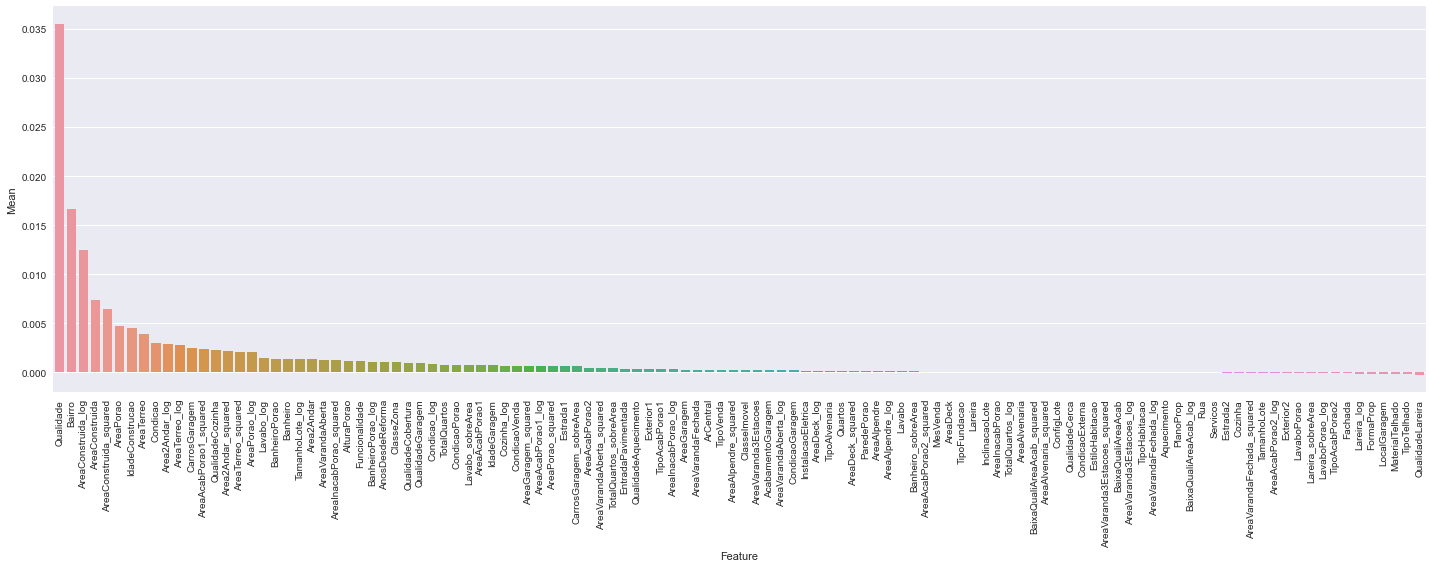

In [131]:
total_importances = pd.concat(importances, axis=1)
total_importances['Mean'] = total_importances.mean(axis=1)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='Feature', y="Mean", data=total_importances.reset_index().sort_values('Mean', ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

Das features acima, selecionaremos as 80 mais significativas para retreinar os modelos que apresentaram melhor performance, isto é, Regressão Linear com regularização, SVM, Gradient Boosting, LightGBM e XGBoost.

In [132]:
selected_features = total_importances.sort_values('Mean', ascending=False).iloc[:80].T.columns.to_list()

In [133]:
drop_columns = []
for column in X_train_preprocess.columns.to_list():
    if column not in selected_features:
        drop_columns.append(column)

In [134]:
X_train_preprocess_selected = X_train_preprocess.drop(drop_columns, axis=1)
X_test_preprocess_selected = X_test_preprocess.drop(drop_columns, axis=1)
X_val_preprocess_selected = X_val_preprocess.drop(drop_columns, axis=1)

#### Regressão Linear com Regularização

In [135]:
lr_sel = ElasticNet(alpha = 0.0005, 
                    l1_ratio = 1)
lr_sel.fit(X_train_preprocess_selected, y_train)
score_lr_sel = (cross_val_score(lr_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_lr_sel)
score_lr_sel = -np.mean(score_lr_sel)
print(score_lr_sel)

[-0.11654197 -0.1447046  -0.10719419 -0.13400374 -0.10162663 -0.09217538
 -0.13728127 -0.10804805 -0.0906876  -0.09599728]
0.11282607150650821


In [136]:
scores.append(score_lr_sel)
models.append('LR_Sel')

#### SVR

In [137]:
svr_sel = SVR(C = 125, 
              epsilon = 0.03, 
              gamma =  0.0002)
svr_sel.fit(X_train_preprocess_selected, y_train)
score_svr_sel = (cross_val_score(svr_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_svr_sel)
score_svr_sel = -np.mean(score_svr_sel)
print(score_svr_sel)

[-0.109966   -0.14421131 -0.10460974 -0.12972225 -0.09382958 -0.08629679
 -0.1297823  -0.10559939 -0.0925937  -0.09546924]
0.1092080287960602


In [138]:
scores.append(score_svr_sel)
models.append('SVR_Sel')

#### Gradient Boosting

In [139]:
gbr_sel = GradientBoostingRegressor(random_state=42, 
                                n_estimators=6000, 
                                learning_rate=0.01, 
                                max_depth = 2, 
                                max_features = 'sqrt', 
                                min_samples_leaf = 15, 
                                min_samples_split = 5,
                                loss= 'huber')
gbr_sel.fit(X_train_preprocess_selected, y_train)
score_gbr_sel = (cross_val_score(gbr_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_gbr_sel)
score_gbr_sel = -np.mean(score_gbr_sel)
print(score_gbr_sel)

[-0.12026373 -0.15250433 -0.11186441 -0.13396623 -0.10049997 -0.11240558
 -0.1343621  -0.10389125 -0.09382287 -0.09273472]
0.11563151975613047


In [140]:
scores.append(score_gbr_sel)
models.append('GBR_Sel')

#### Light Gradient Boosting

In [141]:
lgb_sel = LGBMRegressor(objective='regression',
                        random_state=42, 
                        n_estimators=2500, 
                        learning_rate=0.01, 
                        num_leaves = 6, 
                        max_bin = 200, 
                        bagging_fraction = 0.8, 
                        bagging_freq = 4, 
                        bagging_seed = 8, 
                        feature_fraction = 0.2, 
                        feature_fraction_seed = 8,
                        min_sum_hessian_in_leaf = 11)
lgb_sel.fit(X_train_preprocess_selected, y_train)
score_lgb_sel = (cross_val_score(lgb_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_lgb_sel)
score_lgb_sel = -np.mean(score_lgb_sel)
print(score_lgb_sel)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [142]:
scores.append(score_lgb_sel)
models.append('LGB_Sel')

#### XGBoost

In [143]:
xgb_sel = XGBRegressor(objective='reg:squarederror', 
                       random_state=42, 
                       n_estimators=6000, 
                       learning_rate = 0.01, 
                       max_depth = 5, 
                       gamma = 0.04, 
                       min_child_weight=0, 
                       subsample=0.3, 
                       colsample_bytree=0.3, 
                       nthread=-1, 
                       reg_alpha=0.1, 
                       reg_lambda=0.5)
xgb_sel.fit(X_train_preprocess_selected, y_train)
score_xgb_sel = (cross_val_score(xgb_sel, X_train_preprocess_selected, y_train, 
                                        scoring="neg_root_mean_squared_error", cv=10))
print(score_xgb_sel)
score_xgb_sel = -np.mean(score_xgb_sel)
print(score_xgb_sel)

[-0.12090666 -0.15357796 -0.10312187 -0.12773375 -0.11373885 -0.11596866
 -0.13806547 -0.10755866 -0.08447443 -0.08974201]
0.11548883208422793


In [144]:
scores.append(score_xgb_sel)
models.append('XGB_Sel')

### Metricas

Verificaremos a performance obtida dos modelos retreinados.

In [145]:
total_scores = pd.DataFrame({'Model' : models, 'Score': scores})

In [146]:
total_scores.sort_values('Score')

Model     Score
11   SVR_Sel  0.109208
2        SVR  0.110996
10    LR_Sel  0.112826
1         LR  0.113639
9        XGB  0.115320
14   XGB_Sel  0.115489
12   GBR_Sel  0.115632
5        GBR  0.116227
13   LGB_Sel  0.117762
8        LGB  0.118597
4        RFR  0.135470
6        ABR  0.135618
7        BAG  0.138730
0   Baseline  0.142466
3        DTR  0.189998

Houve um ganho de performance em todos os modelos, exceto XGBoost, com o SVR apresentando a melhor performance nas análises de CV. 

### Stacked Regression Model

Os modelos SVR, Linear Regression, XGBoost, Gradient Boosting e LightGBM apresentaram bons resultados, assim, iremos avaliar se uma combinação dos mesmos pode ter uma performance ainda melhor em dados desconhecidos, assim, realizaremos 3 tipos de ensembles:
- Média das predições
- StackingRegressor utilizando o modelo de melhor performance, SVR, como meta regressor
- Blend das predições do stacking regressor com os demais modelos

In [147]:
selected_models = [lr_sel, svr_sel, gbr_sel, lgb_sel, xgb_sel]

#### Média das prredições

In [148]:
def mean_stacked(X):
    return ((lr_sel.predict(X) + \
             svr_sel.predict(X) + \
             gbr_sel.predict(X) + \
             lgb_sel.predict(X) + \
             xgb_sel.predict(X))/len(selected_models))

#### Stacking Regressor

In [149]:
stc = StackingCVRegressor(regressors=(selected_models),
                          meta_regressor=svr_sel,
                          use_features_in_secondary=True, 
                          random_state=0)

In [150]:
stc.fit(X_train_preprocess_selected, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

StackingCVRegressor(meta_regressor=SVR(C=125, epsilon=0.03, gamma=0.0002),
                    random_state=0,
                    regressors=[ElasticNet(alpha=0.0005, l1_ratio=1),
                                SVR(C=125, epsilon=0.03, gamma=0.0002),
                                GradientBoostingRegressor(learning_rate=0.01,
                                                          loss='huber',
                                                          max_depth=2,
                                                          max_features='sqrt',
                                                          min_samples_leaf=15,
                                                          min_samples_split=5,
                                                          n_estimators=6000,
                                                          random_state=42),
                                LGBMRegressor...
                                             interaction_constraints='',
              

#### Blend do StackingRegressor e demais Modelos

In [151]:
def blended_predictions(X):
    return ((0.15 * lr_sel.predict(X)) + \
            (0.2 * svr_sel.predict(X)) + \
            (0.1 * gbr_sel.predict(X)) + \
            (0.1 * lgb_sel.predict(X)) + \
            (0.1 * xgb_sel.predict(X)) + \
            (0.35 * stc.predict(X)))

### Métricas no Dataset de Teste

O dataset de teste será utilizado para realizar previsão do preço de venda dos imóveis nos modelos isolados e nas três abordagens de ensemble definidas acima, verificando a Raiz do Erro Médio Absoluto na escala logaritmica e em dólares.

In [152]:
mean_stacked_test = mean_stacked(X_test_preprocess_selected)

print('Média das predições\nRMSE (log): {:.5f}\nRMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_test,
                                                                                       mean_stacked_test)),
                                                         np.sqrt(mean_squared_error(np.exp(y_test),
                                                                                    np.exp(mean_stacked_test)))))

Média das predições
RMSE (log): 0.11887
RMSE: 23893.71092


In [153]:
y_test_stc = (stc.predict(X_test_preprocess_selected))

print('StackingRegressor\nRMSE (log): {:.5f}\nRMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_test,
                                                                                      y_test_stc)),
                                                         np.sqrt(mean_squared_error(y_test_real,
                                                                                    np.exp(y_test_stc)))))

StackingRegressor
RMSE (log): 0.11762
RMSE: 23791.96590


In [154]:
y_test_blend = blended_predictions(X_test_preprocess_selected)

print('StackingRegressor\nRMSE (log): {:.5f}\nRMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_test,
                                                                                      y_test_blend)),
                                                         np.sqrt(mean_squared_error(y_test_real,
                                                                                    np.exp(y_test_blend)))))

StackingRegressor
RMSE (log): 0.11670
RMSE: 23548.31667


In [155]:
for model in selected_models:
    pred = model.predict(X_test_preprocess_selected)
    print('{}\nRMSE (log): {:.5f}\nRMSE: {:.5f}\n'.format(model,
                                                        np.sqrt(mean_squared_error(y_test,
                                                                                   pred)),
                                                        np.sqrt(mean_squared_error(y_test_real,
                                                                                   np.exp(pred)))))

ElasticNet(alpha=0.0005, l1_ratio=1)
RMSE (log): 0.11733
RMSE: 24162.77697

SVR(C=125, epsilon=0.03, gamma=0.0002)
RMSE (log): 0.11640
RMSE: 23784.20762

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=2,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=5, n_estimators=6000,
                          random_state=42)
RMSE (log): 0.12239
RMSE: 24682.66306

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=2500,
              num_leaves=6, objective='regression', random_state=42)
RMSE (log): 0.13287
RMSE: 25783.54014

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.04, gpu_id=-1, importance_type=None,
             intera

O melhor resultado obtido foi para o SVR, seguido pelo blend do valor obtido no Stacking e nos modelos individuais. <br>
Podemos verificar o R² e R² ajustado para a previsão do blend, assim como visualizar graficamente a relação entre os dados previstos e reais.

In [156]:
R2 = r2_score(y_test_real, np.exp(y_test_blend))
print('R2 Score: {}'.format(R2))
n = X_test_preprocess_selected.shape[0]
p = X_test_preprocess_selected.shape[1]
adj_R2 = 1-((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R2 Score Ajustado: {}'.format(adj_R2))

R2 Score: 0.9209221950970168
R2 Score Ajustado: 0.8750799893561569


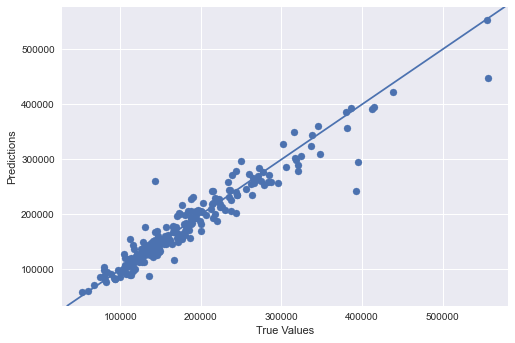

In [157]:
plt.scatter(y_test_real, np.exp(y_test_blend))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axline([100000, 100000], [500000, 500000])
plt.show()

### Métricas no Dataset de Validação

Por fim, realizaremos a previsão também no dado de validação, para confrontar os resultados obtidos.

In [158]:
mean_stacked_val = mean_stacked(X_val_preprocess_selected)

print('Mean of predictons\nRMSE (log): {:.5f}\nRMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_val,
                                                                                       mean_stacked_val)),
                                                         np.sqrt(mean_squared_error(np.exp(y_val),
                                                                                    np.exp(mean_stacked_val)))))

Mean of predictons
RMSE (log): 0.09488
RMSE: 17544.78697


In [159]:
y_val_stc = (stc.predict(X_val_preprocess_selected))

print('StackingRegressor\nRMSE (log): {:.5f}\nRMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_val,
                                                                                      y_val_stc)),
                                                         np.sqrt(mean_squared_error(np.exp(y_val),
                                                                                    np.exp(y_val_stc)))))

StackingRegressor
RMSE (log): 0.09896
RMSE: 18123.25368


In [160]:
y_val_blend = blended_predictions(X_val_preprocess_selected)

print('StackingRegressor\nRMSE (log): {:.5f}\nRMSE: {:.5f}'.format(np.sqrt(mean_squared_error(y_val,
                                                                                      y_val_blend)),
                                                         np.sqrt(mean_squared_error(np.exp(y_val),
                                                                                    np.exp(y_val_blend)))))

StackingRegressor
RMSE (log): 0.09590
RMSE: 17656.80800


In [161]:
for model in selected_models:
    pred = model.predict(X_val_preprocess_selected)
    print('{}\nRMSE (log): {:.5f}\nRMSE: {:.5f}\n'.format(model,
                                                        np.sqrt(mean_squared_error(y_val,
                                                                                   pred)),
                                                        np.sqrt(mean_squared_error(np.exp(y_val),
                                                                                   np.exp(pred)))))

ElasticNet(alpha=0.0005, l1_ratio=1)
RMSE (log): 0.10341
RMSE: 20173.27101

SVR(C=125, epsilon=0.03, gamma=0.0002)
RMSE (log): 0.10191
RMSE: 18872.46093

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=2,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=5, n_estimators=6000,
                          random_state=42)
RMSE (log): 0.10011
RMSE: 18560.46933

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=2500,
              num_leaves=6, objective='regression', random_state=42)
RMSE (log): 0.09888
RMSE: 17585.85223

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.04, gpu_id=-1, importance_type=None,
             intera

É interessante observar que, diferentemente do dado de teste, para o dado de validação os modelos individuais que tiveram melhor desempenho não foram SVR e Regressão Linear, mas o LightGBM e XGBoost. O resultado obtido no bleng, no entanto, se manteve entre as melhores performances, demonstrando a capacidade de previsão que é impulsionada pelos ensembles, se tornando mais robusto para diferentes dados. 

In [162]:
R2 = r2_score(y_val_real, np.exp(y_val_blend))
print('R2 Score: {}'.format(R2))
n = X_val_preprocess_selected.shape[0]
p = X_val_preprocess_selected.shape[1]
adj_R2 = 1-((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R2 Score Ajustado: {}'.format(adj_R2))

R2 Score: 0.9525605372955868
R2 Score Ajustado: 0.9250593994959269


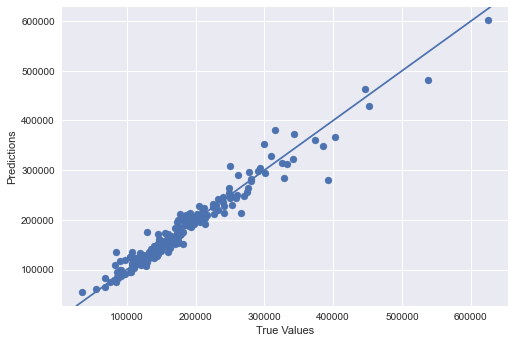

In [163]:
plt.scatter(y_val_real, np.exp(blended_predictions(X_val_preprocess_selected)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axline([100000, 100000], [500000, 500000])
plt.show()

## 8. Conclusão <a name="conclusão"></a>

Este desafio proposto pelo QuintoAndar envolveu o desenvolvimento de duas modelagens. <br>
A primeira modelagem teve como objetivo  possibilitar uma boa interpretabiliade, onde com poucas features do respeito do imóvel se seria possível precificá-lo. A partir desta modelagem foi realizado um diagnóstico e verificação das suposições fundamentais da regressão linear. <br>
A segunda modelagem, por sua vez, teve como objetivo maximar o poder preditivo, onde diferentes modelos foram explorados, utilizando um total de 114 features e obtendo um R2 acima de 92%. 